# Анализ рынка автомобилей Казахстана за 2019 год

Цель работы - провести исследовательский анализ данных рынка автомобилей Казахстана. В данном анализе подготовим данные для дальнейшего анализа, затем изучим их и проанализируем компанию Меркур Авто и ее конкурентов.

1. [Загрузка данных и ознакомление с ними](#start)
2. [Предобработка данных](#preprocessing)
    * [Изменение названий столбцов](#names)
    * [Проверка данных на наличие дубликатов](#duplicates)
    * [Удаление столбцов](#drop)
    * [Анализ пропущенных значений](#null)
    * [Изменение типов данных](#type) 
    * [Анализ аномальных значений](#anomal)
    
3. [Исследовательский анализ данных](#analiz)
    * [Определение временного периода для дальнейшего анализа](#time)
    * [Изучение продаж](#sale)
    * [Изучение продаж по категориям](#cat)
        * [Вид топлива](#fuel)
        * [Сегмент](#seg)
        * [Класс](#class)
        * [Коробка передач](#transmis)
        * [Тип привода](#drive)
        * [Страна производитель](#country)  
    * [Топ 10 марок авто](#top)
    * [Анализ продаж всех марок](#brand)
    * [Анализ продаж по регионам](#region)
    * [Анализ продаж по автоцентрам](#company)
    
4. [Анализ Меркур Авто](#mercur)
    * [Анализ прибыли](#income)
        * [Анализ прибыли по каждому месяцу](#income_month)    
    * [Анализ автомобильного рынка](#market)
    * [Анализ доли рынка](#share)
    * [Анализ конкурентов](#com)
        * [Ближайшие конкуренты Меркур авто по региону](#regi)
        * [Ближайшие конкуренты Меркур авто по классу автомобиля](#cl)
    
5. [Вывод](#all)

## 1 Загрузка данных и ознакомление с ними
<a id="start"></a> 

In [176]:
#импорт библиотек
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [177]:
import warnings 
warnings.filterwarnings("ignore") #убрать красные текстовые предупреждения

In [178]:
#открытие файла
df=pd.read_csv('kz_2019_final_all_dirt.csv',index_col=0)
df.head(10)

,Год,Месяц,Компания,Бренд,Модель,Модификация,Год выпуска,Страна-производитель,Вид топлива,"Объём двиг, л,",...,Тип клиента,Форма расчета,Количество,"Цена, USD","Продажа, USD",Область,Сегментация 2013,Класс 2013,Сегментация Eng,Локализация производства
0,2019,Март,Mercur Auto,Audi,A3,Audi A3 TFSI,2017,Германия,Бензин,1.4,...,Физ. Лицо,безналичный,1.0,31250.000000,31250.000000,г.Алматы,Легковые автомобили,C класс,C,Импорт
1,2019,Май,Mercur Auto,Audi,A3,TFSI,2018,Германия,Бензин,1.4,...,Физ. Лицо,наличный,1.0,30581.000000,30581.000000,г.Алматы,Легковые автомобили,C класс,C,Импорт
2,2019,Июнь,Mercur Auto,Audi,A3,TFSI,2018,Германия,Бензин,1.4,...,Физ. Лицо,наличный,1.0,35087.719000,35087.719000,г.Алматы,Легковые автомобили,C класс,C,Импорт
3,2019,Июль,Mercur Auto,Audi,A3,TFSI,2017,Германия,Бензин,1.4,...,Физ. Лицо,наличный,1.0,26608.232900,26608.232900,г.Алматы,Легковые автомобили,C класс,C,Импорт
4,2019,Июль,Mercur Auto,Audi,A4,A4 Allroad TFSI,2017,Германия,Бензин,2,...,Юр. Лицо,безналичный,1.0,48343.982648,48343.982648,г.Алматы,Легковые автомобили,D класс,D,Импорт
5,2019,Июнь,Mercur Auto,Audi,A5,TFSI,2017,Германия,Бензин,2,...,Юр. Лицо,безналичный,1.0,52760.736196,52760.736196,г.Алматы,Легковые автомобили,Спортивные автомобили,G1,Импорт
6,2019,Январь,Mercur Auto,Audi,A6,TFSI,2017,Германия,Бензин,2,...,Физ. Лицо,NaN,1.0,54288.366337,54288.366337,Костанайская область,Легковые автомобили,E класс,E,Импорт
7,2019,Январь,Mercur Auto,Audi,A6,TFSI,2017,Германия,Бензин,2,...,Юр. Лицо,NaN,1.0,54109.229963,54109.229963,г.Алматы,Легковые автомобили,E класс,E,Импорт
8,2019,Январь,Mercur Auto,Audi,A6,TFSI,2017,Германия,Бензин,2,...,Физ. Лицо,NaN,1.0,53143.930216,53143.930216,г.Алматы,Легковые автомобили,E класс,E,Импорт
9,2019,Январь,Mercur Auto,Audi,A6,TFSI,2017,Германия,Бензин,2,...,Физ. Лицо,NaN,1.0,44245.049505,44245.049505,Атырауская область,Легковые автомобили,E класс,E,Импорт


In [179]:
#вывод общей информации о таблице
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32854 entries, 0 to 32853
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Год                             32854 non-null  int64  
 1   Месяц                           32854 non-null  object 
 2   Компания                        32854 non-null  object 
 3   Бренд                           32854 non-null  object 
 4   Модель                          32854 non-null  object 
 5   Модификация                     29729 non-null  object 
 6   Год выпуска                     32700 non-null  object 
 7   Страна-производитель            32854 non-null  object 
 8   Вид топлива                     31942 non-null  object 
 9   Объём двиг, л,                  30968 non-null  object 
 10  Коробка передач                 31662 non-null  object 
 11  Тип привода                     30589 non-null  object 
 12  Сегмент                         

In [180]:
#подсчет количества данных до обработки
shape=df.shape[0]
shape

32854

Мы ознакомились с полученными данными. В предобработке мы изменим тип данных в некоторых столбцах , удалим ненужные столбцы , а так же проверим оставшиеся данные на наличие дубликатов,проанализируем пропуски в столбцах.

## 2 Предобработка данных
<a id="preprocessing"></a> 

### 2.1 Изменение названий столбцов
<a id="names"></a> 

Для начала переведем названия столбцов на английский язык и изменим регистр. Неизменными останутся столбцы, которые мы позже удалим из таблицы.

In [181]:
#переименование столбцов
df.columns=['year','month','company','brand','model','Модификация','year_manufact','country_manufact',
            'type_fuel','engine_capacity_l','transmis','type_drive','Сегмент','region','Наименование дилерского центра',
           'Тип клиента','Форма расчета','count','price_usd','sale_usd','Область','segment_2013','class_2013',
           'Сегментация Eng','Локализация производства']
#проверка изменения названия столбцов
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32854 entries, 0 to 32853
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   year                            32854 non-null  int64  
 1   month                           32854 non-null  object 
 2   company                         32854 non-null  object 
 3   brand                           32854 non-null  object 
 4   model                           32854 non-null  object 
 5   Модификация                     29729 non-null  object 
 6   year_manufact                   32700 non-null  object 
 7   country_manufact                32854 non-null  object 
 8   type_fuel                       31942 non-null  object 
 9   engine_capacity_l               30968 non-null  object 
 10  transmis                        31662 non-null  object 
 11  type_drive                      30589 non-null  object 
 12  Сегмент                         

### 2.2 Проверка данных на наличие дубликатов
<a id="duplicates"></a> 

Для начала проверим данные на наличие явных дубликатов.

In [182]:
#вывод количества явных дубликатов
df.duplicated().sum()

13356

В данных 13 356 явных дубликатов, что возможно, так как у нас нет данных о дате продажи и времени, поэтому нельзя точно сказать, что эти дубликаты считаются одной и той же продажей, поэтому их мы оставим для дальнейшего анализа.  

Теперь можно проверить данные на неявные дубликаты.

In [183]:
#проверка данных на наличие дубликатов
df['company'].sort_values().unique()

array(['Allur Auto', 'Astana Motors', 'Autokapital', 'Caspian Motors',
       'Daewoo Bus Kazakhstan', 'Eurasia Motor Premium',
       'Hino Motors Kazakhstan', 'Hyundai Com Trans Kazakhstan ',
       'Jaguar Land Rover', 'MAN Truck & Bus Kazakhstan', 'MMC RUS',
       'Mercur Auto', 'Nissan Manufacturing RUS', 'Renault Россия', 'SMC',
       'Scandinavian Motors', 'Scania Central Asia',
       'Sivi Finance Consulting', 'Subaru Kazakhstan',
       'Toyota Motor Kazakhstan', 'Автомир ГК', 'Автоцентр-Бавария',
       'Алматы АТО', 'БИПЭК АВТО', 'Вираж', 'Каспиан Моторс',
       'Лифан Моторс Рус', 'ММС Рус', 'СВС', 'СВС-ТРАНС', 'СемАЗ',
       'ТК КАМАЗ', 'ТК Рос-Авто', 'УзАвто-Казахстан',
       'Хино Моторс Казахстан'], dtype=object)

In [184]:
#убираем неявные дубликаты
df['company']=df['company'].replace({'СВС-ТРАНС':'СВС','ММС Рус':'MMC RUS','Caspian Motors':'Каспиан Моторс'})

В столбце company дубликаты были убраны.

In [185]:
#проверка данных на наличие дубликатов
df['brand'].sort_values().unique()

array(['ANKAI', 'Audi', 'BMW', 'Cadillac', 'Chevrolet', 'Daewoo', 'Ford',
       'Foton', 'GAZ', 'Hino', 'Hyundai', 'Hyundai Truck & Bus',
       'Infiniti', 'Isuzu', 'Iveco', 'Jac', 'Jaguar', 'KAMAZ', 'Kia',
       'Lada', 'Land Rover', 'Lexus', 'Lifan', 'MAN', 'Mazda',
       'Mercedes-Benz', 'Mercedes-Benz Trucks', 'Mini', 'Mitsubishi',
       'Nissan', 'Peugeot', 'Porsche', 'Ravon', 'Renault', 'Rolls Royce',
       'Scania', 'Shacman', 'Skoda', 'SsangYong', 'Subaru', 'Suzuki',
       'Toyota', 'UAZ', 'Volkswagen', 'Volvo', 'МАЗ', 'Урал'],
      dtype=object)

В столбце brand дубликаты не были нейдены.

In [186]:
#проверка данных на наличие дубликатов
df['country_manufact'].sort_values().unique()

array(['UK', 'Австрия', 'Белоруссия', 'Венгрия', 'Вьетнам', 'Германия',
       'Корея', 'Нидерланды', 'Республика Казахстан',
       'Российская Федерация', 'США', 'Таиланд', 'Турция', 'Узбекистан',
       'Швеция', 'Япония'], dtype=object)

В столбце country_manufact дубликаты не были найдены, но закодируем эти страны

In [187]:
#создание копии таблицы
df2=df.copy(deep=True)

In [188]:
type(pd.read_html('https://www.artlebedev.ru/country-list/',encoding='utf8')[0])

pandas.core.frame.DataFrame

In [189]:
#открываем сссылку и изменяем названия столбцов
countries_codes=(pd.read_html('https://www.artlebedev.ru/country-list/',encoding='utf8')[0]
                 [['Наименование','Полное наименование','Alpha3']].rename(columns={'Наименование':'name',
                                                                                   'Полное наименование':'full_name'}))

In [190]:
#делаем цикл для изменения названия стран
countries_codes_dict={}
for i in range(len(countries_codes)):
    if countries_codes.loc[i]['name'] not in countries_codes_dict:
        countries_codes_dict[countries_codes.loc[i]['name']]=countries_codes.loc[i]['Alpha3']
    if countries_codes.loc[i]['full_name'] not in countries_codes_dict:
        countries_codes_dict[countries_codes.loc[i]['full_name']]=countries_codes.loc[i]['Alpha3']

In [191]:
#проверяем изменения названия стран в тестовой таблице
df2['country_manufact']=df['country_manufact'].apply(lambda cell: countries_codes_dict.get(cell,cell))
df2['country_manufact'].unique()

array(['DEU', 'США', 'KAZ', 'RUS', 'Белоруссия', 'TUR', 'JPN', 'Корея',
       'VNM', 'UK', 'THA', 'UZB', 'HUN', 'AUT', 'NLD', 'SWE'],
      dtype=object)

In [192]:
#изменяем значения
codes_dict=countries_codes_dict
codes_dict['Белоруссия']=codes_dict.pop('Беларусь')
codes_dict['США']=codes_dict.pop('Соединенные Штаты')
codes_dict['Корея']=codes_dict.pop('Корея, Республика')

In [193]:
#изменяем названия стран в нашей таблице
df['country_manufact']=df['country_manufact'].apply(lambda cell: codes_dict.get(cell,cell))
df['country_manufact'].unique()

array(['DEU', 'USA', 'KAZ', 'RUS', 'BLR', 'TUR', 'JPN', 'KOR', 'VNM',
       'UK', 'THA', 'UZB', 'HUN', 'AUT', 'NLD', 'SWE'], dtype=object)

Теперь проверим на наличие дубликатов другие столбцы.

In [194]:
#проверка данных на наличие дубликатов
df['region'].sort_values().unique()

array(['Аксай', 'Актау', 'Актобе', 'Алматы', 'Астана', 'Атырау',
       'Караганда', 'Кокшетау', 'Костанай', 'Кызылорда', 'Павлодар',
       'Петропавловск', 'Риддер', 'Рудный', 'Семей', 'Талдыкорган',
       'Тараз', 'Уральск', 'Усть-Каменогорск', 'Шемонаиха', 'Шымкент',
       'Щучинск', 'ЭКСПОРТ', 'Экибастуз'], dtype=object)

В столбце region дубликаты не были найдены

In [195]:
#проверка данных на наличие дубликатов
df['type_drive'].sort_values().unique()

array([' -', '-', '0', '2 WD', '2WD', '2WD/4WD', '2х4', '4 WD', '4Motion',
       '4WD', '4x2', '4x4', '4х2', '4х2.2', '4х4', 'AWD', 'CVT', 'FF',
       'FR', 'FWD', 'P/TIME', 'Quattro', 'RWD', 'quattro', 'Задний',
       'Передний', 'Полный', 'Полный ', 'задний', 'передний', 'передний ',
       'полный', nan], dtype=object)

В столбце type_drive были найдены дубликаты, поэтому приведем эти данные к одному виду:
- 4WD (полный привод)
- FWD (передний привод)
- RWD (задний привод)
- 2WD (остальное)

Сначала приведем данные к нижнему регистру и уберем все пробелы

In [196]:
#приводим данные к нижнему регистру
df['type_drive']=df['type_drive'].str.lower()
#убираем пробелы из данных
df['type_drive']=df['type_drive'].str.replace(' ','')

In [197]:
#проверяем какие остались уникальные значения
df['type_drive'].sort_values().unique()

array(['-', '0', '2wd', '2wd/4wd', '2х4', '4motion', '4wd', '4x2', '4x4',
       '4х2', '4х2.2', '4х4', 'awd', 'cvt', 'ff', 'fr', 'fwd', 'p/time',
       'quattro', 'rwd', 'задний', 'передний', 'полный', nan],
      dtype=object)

In [198]:
#пишем цикл, который будет заменять определенные значения на нужный на тип привода. делаем так с каждым типом привода
for i in ['2wd', '2wd/4wd', '2х4','4x2', '4х2', '4х2.2','p/time']:
    df.loc[df['type_drive'] ==i, 'type_drive'] = '2WD'

for i in ['ff','передний', 'fwd']:
    df.loc[df['type_drive'] ==i, 'type_drive'] = 'FWD'
    
for i in ['задний','fr','rwd']:
    df.loc[df['type_drive'] ==i, 'type_drive'] = 'RWD'    
    
for i in ['4wd', '4motion','4x4','awd','cvt', 'quattro', 'полный', '4wd', '4х4']:
    df.loc[df['type_drive'] ==i, 'type_drive'] = '4WD'   

In [199]:
#проверка данных на наличие дубликатов
df['type_drive'].sort_values().unique()

array(['-', '0', '2WD', '4WD', 'FWD', 'RWD', nan], dtype=object)

У нас остались значения, которые мы переведем в NaN

In [200]:
#перевод значений в NaN
for i in ['-', '0']:
    df.loc[df['type_drive'] ==i, 'type_drive'] = np.nan  

Мы убрали дубликаты в столбце type_drive, теперь проверим столбец transmis.

In [201]:
#проверка данных на наличие дубликатов
df['transmis'].sort_values().unique()

array([' -', '-', '0', '12AT', '4 АТ', '4AT', '4АТ', '5 МТ', '5-ступМТ',
       '5AT', '5M', '5MT', '5MТ', '5АТ', '5М', '5МТ', '6 AT', '6 DSG',
       '6 MT', '6 АТ', '6 МТ', '6-ступАКПП', '6A', '6AT', '6AT/MT',
       '6Aатомат', '6Aвтомат', '6DSG', '6M/T', '6M/Т', '6MT', '6MТ', '6А',
       '6АT', '6АТ', '6М/Т', '6МТ', '7 DCT', '7 DSG', '7AT', '7DCT',
       '7DCТ', '7DSG', '7DSG4МoТion', '7АT', '7АТ', '8', '8 AT 4Motion',
       '8 АТ', '8-ступ АКПП', '8AT', '8АКПП', '8АТ', '8АТ4МoТion', '9AT',
       '9АТ', 'A/T', 'AMT', 'AT', 'AT (автомат)', 'CVT', 'CVT (вариатор)',
       'CVT(вариATор)', 'CVT(вариатор)', 'CVТ', 'CVТ(вАриАтор)',
       'CVТ(вариатор)', 'MT', 'MТ', 'N', 'PDK', 'Powershift S6',
       'PowershiftS6', 'PowershifТS6', 'S-troic', 'S-tronic', 'S-Тroic',
       'S-Тronic', 'Steptronic', 'SТepТronic', 'Tiptronic', 'АT', 'АКПП',
       'АКПП4', 'АКПП6', 'АКПП8', 'АТ', 'АТ (автомат)', 'Автомат', 'МКПП',
       'МКПП4', 'МКПП5', 'МТ', 'МТ (механика)', 'Мех.', 'Механическая'

Переведем данные к нижнему регистру, уберем пробелы.

In [202]:
#приводим данные к нижнему регистру
df['transmis']=df['transmis'].str.lower()
#убираем пробелы из данных
df['transmis']=df['transmis'].str.replace(' ','')

In [203]:
df['transmis'].sort_values().unique()

array(['-', '0', '12at', '4at', '4ат', '5-ступмт', '5at', '5m', '5mt',
       '5mт', '5ат', '5м', '5мт', '6-ступакпп', '6a', '6at', '6at/mt',
       '6aатомат', '6aвтомат', '6dsg', '6m/t', '6m/т', '6mt', '6mт', '6а',
       '6аt', '6ат', '6м/т', '6мт', '7at', '7dct', '7dcт', '7dsg',
       '7dsg4мoтion', '7аt', '7ат', '8', '8-ступакпп', '8at',
       '8at4motion', '8акпп', '8ат', '8ат4мoтion', '9at', '9ат', 'a/t',
       'amt', 'at', 'at(автомат)', 'cvt', 'cvt(вариatор)',
       'cvt(вариатор)', 'cvт', 'cvт(вариатор)', 'mt', 'mт', 'n', 'pdk',
       'powershifts6', 'powershifтs6', 's-troic', 's-tronic', 's-тroic',
       's-тronic', 'steptronic', 'sтepтronic', 'tiptronic', 'аt',
       'автомат', 'акпп', 'акпп4', 'акпп6', 'акпп8', 'ат', 'ат(автомат)',
       'мех.', 'механическая', 'мкпп', 'мкпп4', 'мкпп5', 'мт',
       'мт(механика)', 'тipтronic', nan], dtype=object)

In [204]:
#перевод значений в NaN
for i in ['-', '0']:
    df.loc[df['transmis'] ==i, 'transmis'] = np.nan  

In [205]:
#пишем цикл, который будет заменять определенные значения на нужный на тип коробки передач
for i in ['12at', '4at', '4ат', '5at','5ат','6-ступакпп', '6a', '6at','6aатомат', '6aвтомат','6а',
       '6аt', '6ат','7at','7аt', '7ат', '8', '8-ступакпп', '8at','8at4motion', '8акпп', '8ат', '8ат4мoтion', '9at', '9ат',
        'a/t','amt', 'at', 'at(автомат)', 'cvt', 'cvt(вариatор)','cvt(вариатор)', 'cvт', 'cvт(вариатор)','аt',
       'автомат', 'акпп', 'акпп4', 'акпп6', 'акпп8', 'ат', 'ат(автомат)']:
    df.loc[df['transmis'] ==i, 'transmis'] = 'automatic'
    
for i in ['5-ступмт','5m', '5mt','5м', '5мт','6m/t', '6m/т', '6mt', '6mт','6м/т', '6мт','mt', 'mт',
       '5mт','мех.', 'механическая', 'мкпп', 'мкпп4', 'мкпп5', 'мт','мт(механика)']:
    df.loc[df['transmis'] ==i, 'transmis'] = 'mechanic'
    
for i in ['6at/mt','6dsg','7dct', '7dcт', '7dsg','7dsg4мoтion','n', 'pdk','powershifts6', 'powershifтs6', 's-troic', 
          's-tronic', 's-тroic','s-тronic', 'steptronic', 'sтepтronic', 'tiptronic','тipтronic']:
    df.loc[df['transmis'] ==i, 'transmis'] = 'robot'

In [206]:
#проверка изменения данных
df['transmis'].sort_values().unique()

array(['automatic', 'mechanic', 'robot', nan], dtype=object)

В столбце transmis убрали все неявные дубликаты. Теперь изучим следующий столбец

In [207]:
#проверка на наличие неявных дубликатов
df['type_fuel'].sort_values().unique()

array(['0', 'Бензин', 'Газовый', 'Дизель', 'Электрический', 'гибрид',
       'дизель ', nan], dtype=object)

В этом столбце мы приведем слова к нижнему регистру, уберем все пробелы и заменим 0 на NaN.

In [208]:
#приводим данные к нижнему регистру
df['type_fuel']=df['type_fuel'].str.lower()
#убираем пробелы из данных
df['type_fuel']=df['type_fuel'].str.replace(' ','')

In [209]:
#перевод значений в NaN
df.loc[df['type_fuel'] =='0', 'type_fuel'] = np.nan  

In [210]:
#проверка изменения данных
df['type_fuel'].sort_values().unique()

array(['бензин', 'газовый', 'гибрид', 'дизель', 'электрический', nan],
      dtype=object)

Проверим наличие дубликатов в столбце с классами .

In [211]:
#проверка наличия дубликатов
df['class_2013'].sort_values().unique()

array(['A класс ', 'B класс ', 'C класс ', 'D класс ', 'E класс ',
       'F класс ', 'Pick-ups', 'Большие автобусы ', 'Компактвэн',
       'Компактные SUV ', 'Крупнотоннажные грузовики ',
       'Малотоннажные грузовики ', 'Микроавтобусы ',
       'Полноразмерные SUV ', 'Полноразмерный Минивэн ',
       'Развозные автомобили ', 'Спортивные автомобили ',
       'Среднеразмерные SUV ', 'Среднетоннажные грузовики ',
       'Средние автобусы ', 'Стандартные SUV ', 'Субкомпактные SUV '],
      dtype=object)

Дубикатов в данном столбце нет, но для дальнейшего анализа сделаем правильное разделение на классы.

In [212]:
#убираем лишние значения и приводим названия к нижнему регистру
df['class_2013']=df['class_2013'].replace(to_replace=[' ','класс'], value='', regex=True)
df['class_2013']=df['class_2013'].str.lower()
df['class_2013'].sort_values().unique()

array(['a', 'b', 'c', 'd', 'e', 'f', 'pick-ups', 'большиеавтобусы',
       'компактвэн', 'компактныеsuv', 'крупнотоннажныегрузовики',
       'малотоннажныегрузовики', 'микроавтобусы', 'полноразмерныеsuv',
       'полноразмерныйминивэн', 'развозныеавтомобили',
       'спортивныеавтомобили', 'среднеразмерныеsuv',
       'среднетоннажныегрузовики', 'средниеавтобусы', 'стандартныеsuv',
       'субкомпактныеsuv'], dtype=object)

In [213]:
#написание цикла, который будет проходиться по названиям и относить их в правильный класс 
for i in df['class_2013'].unique():
    if 'порт' in i:
        df.loc[df['class_2013'] ==i, 'class_2013'] = 's'
    if 'suv' in i:
        df.loc[df['class_2013'] ==i, 'class_2013'] = 'j'
    if 'вэн' in i or 'микро' in i:
        df.loc[df['class_2013'] ==i, 'class_2013'] = 'm'
    if 'груз' in i or 'развоз' in i:
        df.loc[df['class_2013'] ==i, 'class_2013'] = 'грузовики'
    if 'автоб' in i:
        df.loc[df['class_2013'] ==i, 'class_2013'] = 'автобусы'

In [214]:
df['class_2013'].sort_values().unique()

array(['a', 'b', 'c', 'd', 'e', 'f', 'j', 'm', 'pick-ups', 's',
       'автобусы', 'грузовики'], dtype=object)

Мы убрали явные и неявные дубликаты из данных, теперь можно переходить к дальнейшей предобработке.

### 2.3 Удаление столбцов
<a id="drop"></a> 

Уберем из таблицы столбцы, которые не понадобятся нам в дальнейшем анализе и те, в которых большое количество пропущенных значений.

In [215]:
#удаление столбцов
df=df.drop(columns=['Модификация', 'Сегмент','Наименование дилерского центра','Тип клиента',
                     'Форма расчета','Область','Сегментация Eng','Локализация производства'])
df.head()

,year,month,company,brand,model,year_manufact,country_manufact,type_fuel,engine_capacity_l,transmis,type_drive,region,count,price_usd,sale_usd,segment_2013,class_2013
0,2019,Март,Mercur Auto,Audi,A3,2017,DEU,бензин,1.4,robot,NaN,Алматы,1.0,31250.000000,31250.000000,Легковые автомобили,c
1,2019,Май,Mercur Auto,Audi,A3,2018,DEU,бензин,1.4,robot,FWD,Алматы,1.0,30581.000000,30581.000000,Легковые автомобили,c
2,2019,Июнь,Mercur Auto,Audi,A3,2018,DEU,бензин,1.4,robot,FWD,Алматы,1.0,35087.719000,35087.719000,Легковые автомобили,c
3,2019,Июль,Mercur Auto,Audi,A3,2017,DEU,бензин,1.4,robot,FWD,Алматы,1.0,26608.232900,26608.232900,Легковые автомобили,c
4,2019,Июль,Mercur Auto,Audi,A4,2017,DEU,бензин,2,robot,4WD,Алматы,1.0,48343.982648,48343.982648,Легковые автомобили,d


In [216]:
#вывод общей информации о таблице
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32854 entries, 0 to 32853
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               32854 non-null  int64  
 1   month              32854 non-null  object 
 2   company            32854 non-null  object 
 3   brand              32854 non-null  object 
 4   model              32854 non-null  object 
 5   year_manufact      32700 non-null  object 
 6   country_manufact   32854 non-null  object 
 7   type_fuel          31938 non-null  object 
 8   engine_capacity_l  30968 non-null  object 
 9   transmis           31553 non-null  object 
 10  type_drive         30467 non-null  object 
 11  region             32854 non-null  object 
 12  count              32849 non-null  float64
 13  price_usd          32854 non-null  float64
 14  sale_usd           32854 non-null  float64
 15  segment_2013       32854 non-null  object 
 16  class_2013         328

###  2.4 Анализ пропущенных значений
<a id="null"></a> 

In [217]:
#подсчет пропущенных значений
df.isna().sum()

year                    0
month                   0
company                 0
brand                   0
model                   0
year_manufact         154
country_manufact        0
type_fuel             916
engine_capacity_l    1886
transmis             1301
type_drive           2387
region                  0
count                   5
price_usd               0
sale_usd                0
segment_2013            0
class_2013              0
dtype: int64

В столбце 'Количество' 5 пропущенных значений, это очень мало по сравнению со всеми данными, поэтому их можно удалить.

In [218]:
#удаление пропусков в столбце
df=df.dropna(subset=['count']).reset_index(drop=True)

#проверка удаления пропусков 
df.isna().sum()

year                    0
month                   0
company                 0
brand                   0
model                   0
year_manufact         154
country_manufact        0
type_fuel             915
engine_capacity_l    1886
transmis             1301
type_drive           2387
region                  0
count                   0
price_usd               0
sale_usd                0
segment_2013            0
class_2013              0
dtype: int64

Теперь проверим какие есть уникальные значения в столбце с годом выпуска.

In [219]:
#вывод уникальных значений
df['year_manufact'].unique()

array(['2017', '2018', '2016', '2011', '2015', nan, '2014', '2013',
       '2012', '2\xa0018', '2\xa0017', '2\xa0016', 2018, 2017, 2015, 2016],
      dtype=object)

В датах мы видим странные вставки, которые нужно убрать, чтоб в дальнейшем изменить тип данных и убрать пропуски.

In [220]:
#убираем лишние символы в годах
df['year_manufact']=df['year_manufact'].str.replace('\xa0','')
df['year_manufact'].unique()

array(['2017', '2018', '2016', '2011', '2015', nan, '2014', '2013',
       '2012'], dtype=object)

In [221]:
#меняем тип данных на дату
df['year_manufact']=pd.to_datetime(df['year_manufact'], format='%Y')

Теперь мы можем заменить пропущенные значения на основе модели авто.

In [222]:
#замена пропущенных значений на основе модели авто.
for ind in df['model'].unique():
    df.loc[(df['model']==ind)&(df['year_manufact'].isna()),'year_manufact']=\
    df.loc[(df['model']==ind),'year_manufact'].median()

In [223]:
#проверка удаления пропусков и изменения типа данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32849 entries, 0 to 32848
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   year               32849 non-null  int64         
 1   month              32849 non-null  object        
 2   company            32849 non-null  object        
 3   brand              32849 non-null  object        
 4   model              32849 non-null  object        
 5   year_manufact      32794 non-null  datetime64[ns]
 6   country_manufact   32849 non-null  object        
 7   type_fuel          31934 non-null  object        
 8   engine_capacity_l  30963 non-null  object        
 9   transmis           31548 non-null  object        
 10  type_drive         30462 non-null  object        
 11  region             32849 non-null  object        
 12  count              32849 non-null  float64       
 13  price_usd          32849 non-null  float64       
 14  sale_u

Оставшиеся пропущенные значения в столбце с годом выпуска можно удалить.

In [224]:
#удаление пропусков в столбце
df=df.dropna(subset=['year_manufact']).reset_index(drop=True)

In [225]:
df.isna().sum()

year                    0
month                   0
company                 0
brand                   0
model                   0
year_manufact           0
country_manufact        0
type_fuel             915
engine_capacity_l    1874
transmis             1299
type_drive           2381
region                  0
count                   0
price_usd               0
sale_usd                0
segment_2013            0
class_2013              0
dtype: int64

Теперь посмотрим в каких моделях авто есть пропуски в виде топлива

In [226]:
#построение таблицы с данными, где есть пропуск в столбце "Вид топлива"
fuel_nan=df.loc[df['type_fuel'].isna()]

#вывод уникальных значений
fuel_nan['model'].unique()

array(['BJ1032V3JB3-S', 'BJ3143DKPGA-1', 'BJ3253DMPKB-AD',
       'BJ5032V3BB3-S', 'BJ5163VKCHN-1', 'Universe', 'Q30', 'QX50',
       'D-MAX', 'NMR', 'NPR', 'NQR71', 'F-Pace', 'XE', 'XF', '4x4 Pickup',
       'Discovery', 'Discovery Sport', 'Range Rover',
       'Range Rover Evoque', 'Range Rover Sport', 'LS', 'RX', '3', '6',
       'CX-5', 'Duster', 'Kaptur', 'Koleos', 'Logan', 'Sandero',
       'SX3256DR384', 'SX5256GJBDR384', '3741', 'Cargo', 'Caravelle',
       'Jetta', 'Passat B8', 'Polo', 'Tiguan', 'Touareg', '4320',
       '4320-1951-60', '43206-0551', '5557', 'Q60', 'CX-9',
       'Range Rover Velar', 'E-PACE', 'Dokker', 'LC', 'SX3258DR384',
       'ЕА-17У'], dtype=object)

Моделей немного, поэтому был проведен анализ их вида топлива и было отобрано 2 группы, где только бензин или дизель. В остальных моделях авто может быть разный вид топлива.

In [227]:
#замена пропущенных значений на основе модели авто.
for ind in ['Touareg','SX3256DR384','5557','4320-1951-60', '43206-0551','4320','SX5256GJBDR384','SX3258DR384',
            'NQR71','NMR','D-MAX','Universe','BJ5163VKCHN-1','BJ1032V3JB3-S','BJ3143DKPGA-1','BJ5032V3BB3-S','NPR']:
    df.loc[(df['model']==ind)&(df['type_fuel'].isna()),'type_fuel']='дизель'

In [228]:
#замена пропущенных значений на основе модели авто.
for ind in ['CX-9', 'Q60','Tiguan','Passat B8', 'Polo','3741','Kaptur','CX-5','RX','4x4 Pickup','LS','6']:
    df.loc[(df['model']==ind)&(df['type_fuel'].isna()),'type_fuel']='бензин'

In [229]:
#количество пропущенных значений
df.isna().sum()

year                    0
month                   0
company                 0
brand                   0
model                   0
year_manufact           0
country_manufact        0
type_fuel             461
engine_capacity_l    1874
transmis             1299
type_drive           2381
region                  0
count                   0
price_usd               0
sale_usd                0
segment_2013            0
class_2013              0
dtype: int64

Осталось 461 пропущенных значений, которые мы никак не можем заменить на какое-либо значение, поэтому удалим данные пропуски. 

In [230]:
#удаление пропусков в столбцах
df=df.dropna(subset=['type_fuel']).reset_index(drop=True)

In [231]:
#вывод уникальных значений
df['engine_capacity_l'].unique()

array(['1.4', '2', '3', '1.5', '4.4', '6.6', nan, '0', '1.8', '1.596',
       '1596', '2.4', '3000', '2400', '1.7', '6.2', '1800', '1400 turbo',
       '1,4 Turbo', '2.5', '1.6', '3.5', '2.2', '2.7', '2.8', '4.2', '5',
       '3.9', '7.5', '11', '3.933', '12.3', '1,6 T-GDI', '3.7', '5.6',
       '7.8', '2.9', '5.2', '10.3', '8.7', '1600', '1.998', '1.598',
       '1.248', '2.359', '2359', '1999', '3.8', '3800', '1.591', '1.368',
       '3.342', '3.47', '3470', '2000', '1.999', '1.69', '1690', '1.774',
       '1598', '1774', '4.9', '4.6', '3,5', '5.7', '10.5', '6.7', '2/2,5',
       '4', '5.5', '12', '1.2', '3.6', '6.5', '4.5', '1.25', '1.3',
       '0.002', '0.0016', '1998', '13', '16', '1400', '2.3', '1.33',
       '2,4G', '2.693', '2693', '2.235', '2235', '2.0', '14860', '14.8',
       '17.5', '1,2T', '4.88', 4.88], dtype=object)

In [232]:
#убираем лишние значения
df['engine_capacity_l']= df['engine_capacity_l'].replace(to_replace = ',', value='.', regex=True)
dupl=['turbo','T-GDI','Turbo',' ','G','T','2/']
df['engine_capacity_l']= df['engine_capacity_l'].replace(to_replace = dupl, value='', regex=True)

In [233]:
#проверка замены значений
df['engine_capacity_l'].unique()

array(['1.4', '2', '3', '1.5', '4.4', '6.6', nan, '0', '1.8', '1.596',
       '1596', '2.4', '3000', '2400', '1.7', '6.2', '1800', '1400', '2.5',
       '1.6', '3.5', '2.2', '2.7', '2.8', '4.2', '5', '3.9', '7.5', '11',
       '3.933', '12.3', '3.7', '5.6', '7.8', '2.9', '5.2', '10.3', '8.7',
       '1600', '1.998', '1.598', '1.248', '2.359', '2359', '1999', '3.8',
       '3800', '1.591', '1.368', '3.342', '3.47', '3470', '2000', '1.999',
       '1.69', '1690', '1.774', '1598', '1774', '4.9', '4.6', '5.7',
       '10.5', '6.7', '4', '5.5', '12', '1.2', '3.6', '6.5', '4.5',
       '1.25', '1.3', '0.002', '0.0016', '1998', '13', '16', '2.3',
       '1.33', '2.693', '2693', '2.235', '2235', '2.0', '14860', '14.8',
       '17.5', '4.88', 4.88], dtype=object)

In [234]:
#меняем тип данных 
df['engine_capacity_l']=df['engine_capacity_l'].astype('float')

В данных мы видим, что есть странные значения (слишком маленькие или слишком большие), поэтому проанализируем их и заменим значение 0 на NaN

In [235]:
#перевод значений в NaN
df.loc[df['engine_capacity_l'] =='0', 'engine_capacity_l'] = np.nan  

In [236]:
#делаем срез данных
anomal=df.query('engine_capacity_l<1').reset_index(drop=True)
anomal

,year,month,company,brand,model,year_manufact,country_manufact,type_fuel,engine_capacity_l,transmis,type_drive,region,count,price_usd,sale_usd,segment_2013,class_2013
0,2019,Июнь,Автоцентр-Бавария,BMW,i3,2018-01-01,DEU,электрический,0.0000,robot,RWD,Алматы,1.0,47131.635325,47131.635325,Легковые автомобили,b
1,2019,Июнь,Renault Россия,Renault,Duster,2018-01-01,RUS,бензин,0.0020,automatic,4WD,Уральск,1.0,12901.690074,12901.690074,Внедорожники,j
2,2019,Июнь,Renault Россия,Renault,Duster,2018-01-01,RUS,бензин,0.0020,automatic,4WD,Уральск,1.0,12901.690074,12901.690074,Внедорожники,j
3,2019,Июнь,Renault Россия,Renault,Duster,2018-01-01,RUS,бензин,0.0020,automatic,4WD,Уральск,1.0,12901.690074,12901.690074,Внедорожники,j
4,2019,Июнь,Renault Россия,Renault,Duster,2018-01-01,RUS,бензин,0.0020,automatic,4WD,Уральск,1.0,12901.690074,12901.690074,Внедорожники,j
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,2019,Июнь,Renault Россия,Renault,Sandero,2018-01-01,RUS,бензин,0.0016,NaN,NaN,Алматы,1.0,13208.164723,13208.164723,Легковые автомобили,b
134,2019,Июнь,Renault Россия,Renault,Sandero,2018-01-01,RUS,бензин,0.0016,NaN,NaN,Петропавловск,1.0,13208.164723,13208.164723,Легковые автомобили,b
135,2019,Июнь,Renault Россия,Renault,Sandero,2018-01-01,RUS,бензин,0.0016,NaN,NaN,Астана,1.0,13208.164723,13208.164723,Легковые автомобили,b
136,2019,Июнь,Renault Россия,Renault,Sandero,2018-01-01,RUS,бензин,0.0016,mechanic,FWD,Астана,1.0,13208.164723,13208.164723,Легковые автомобили,b


Проанализировав данные авто, можно сказать, что люди сделали ошибку при вводе данных. Чтоб это исправить, умножим эти значения на 1000.

In [237]:
#делаем срез данных и изменяем значения
df['engine_capacity_l']= df['engine_capacity_l'].where(df['engine_capacity_l']>1, df['engine_capacity_l']*1000).round(1)

In [238]:
#вывод моделей авто, где большой литраж объема двигателя указан
anomal_1=df.query('engine_capacity_l>10').reset_index(drop=True)
anomal_1

,year,month,company,brand,model,year_manufact,country_manufact,type_fuel,engine_capacity_l,transmis,type_drive,region,count,price_usd,sale_usd,segment_2013,class_2013
0,2019,Июль,БИПЭК АВТО,Chevrolet,Aveo,2018-01-01,KAZ,бензин,1596.0,automatic,FWD,Уральск,1.0,12100.000000,12100.000000,Легковые автомобили,b
1,2019,Июль,БИПЭК АВТО,Chevrolet,Aveo,2018-01-01,KAZ,бензин,1596.0,automatic,FWD,Павлодар,1.0,12100.000000,12100.000000,Легковые автомобили,b
2,2019,Июль,БИПЭК АВТО,Chevrolet,Aveo,2018-01-01,KAZ,бензин,1596.0,automatic,FWD,Атырау,2.0,12100.000000,24200.000000,Легковые автомобили,b
3,2019,Июль,БИПЭК АВТО,Chevrolet,Aveo,2018-01-01,KAZ,бензин,1596.0,automatic,FWD,Астана,3.0,12100.000000,36300.000000,Легковые автомобили,b
4,2019,Июль,БИПЭК АВТО,Chevrolet,Aveo,2018-01-01,KAZ,бензин,1596.0,automatic,FWD,Алматы,3.0,12100.000000,36300.000000,Легковые автомобили,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,2019,Февраль,Astana Motors,МАЗ,5516Х5,2017-01-01,KAZ,дизель,14860.0,mechanic,RWD,Алматы,5.0,54914.285714,274571.428571,Коммерческие автомобили,грузовики
499,2019,Июнь,Astana Motors,МАЗ,5516Х5,2017-01-01,KAZ,дизель,14.8,mechanic,2WD,Алматы,1.0,52286.870473,52286.870473,Коммерческие автомобили,грузовики
500,2019,Июль,Astana Motors,МАЗ,5516Х5,2017-01-01,KAZ,дизель,17.5,mechanic,NaN,Алматы,1.0,51046.198289,51046.198289,Коммерческие автомобили,грузовики
501,2019,Август,Astana Motors,МАЗ,5516Х5,2017-01-01,KAZ,дизель,17.5,mechanic,NaN,Алматы,1.0,49219.197827,49219.197827,Коммерческие автомобили,грузовики


In [239]:
#вывод уникальных значенений моделей
anomal_1['model'].unique()

array(['Aveo', 'Captiva', 'Tracker', 'HD 260', 'Universe', 'Stralis',
       'Cerato', 'Optima', 'Quoris', 'Rio', 'Sorento', 'Soul', 'Sportage',
       '4x4', 'Granta', 'Kalina', 'Largus', 'Vesta', 'XRAY', 'TG',
       'Actros', 'Tourismo', 'Duster', 'Kaptur', 'Logan', 'Sandero',
       'G-Series', 'P-Series', 'R-Series', 'Octavia', 'Rapid',
       'Superb B6', '2206', '2360', '3151', '3303', '3741', '3909',
       '3962', 'Patriot', 'Patriot Pickup', 'Kodiaq', '5516Х5',
       'S-Series'], dtype=object)

После анализа моделей авто и их объема двигателя, было выявлено, что были неправильно написаны значения( в мл.). Поэтому приведем их в реальное значение.

In [240]:
#изменения мл на л
df['engine_capacity_l']= df['engine_capacity_l'].where(df['engine_capacity_l']<15, df['engine_capacity_l']/1000).round(1)
df.head()

,year,month,company,brand,model,year_manufact,country_manufact,type_fuel,engine_capacity_l,transmis,type_drive,region,count,price_usd,sale_usd,segment_2013,class_2013
0,2019,Март,Mercur Auto,Audi,A3,2017-01-01,DEU,бензин,1.4,robot,NaN,Алматы,1.0,31250.000000,31250.000000,Легковые автомобили,c
1,2019,Май,Mercur Auto,Audi,A3,2018-01-01,DEU,бензин,1.4,robot,FWD,Алматы,1.0,30581.000000,30581.000000,Легковые автомобили,c
2,2019,Июнь,Mercur Auto,Audi,A3,2018-01-01,DEU,бензин,1.4,robot,FWD,Алматы,1.0,35087.719000,35087.719000,Легковые автомобили,c
3,2019,Июль,Mercur Auto,Audi,A3,2017-01-01,DEU,бензин,1.4,robot,FWD,Алматы,1.0,26608.232900,26608.232900,Легковые автомобили,c
4,2019,Июль,Mercur Auto,Audi,A4,2017-01-01,DEU,бензин,2.0,robot,4WD,Алматы,1.0,48343.982648,48343.982648,Легковые автомобили,d


Теперь мы можем произвести замену пропусков на среднее значение объема двигателя

In [241]:
#замена пропущенных значений на основе модели авто.
for ind in df['model'].unique():
    df.loc[(df['model']==ind)&(df['engine_capacity_l'].isna()),'engine_capacity_l']=\
    df.loc[(df['model']==ind),'engine_capacity_l'].median()

In [242]:
#количество пропущенных значений
df.isna().sum()

year                    0
month                   0
company                 0
brand                   0
model                   0
year_manufact           0
country_manufact        0
type_fuel               0
engine_capacity_l     983
transmis              863
type_drive           1932
region                  0
count                   0
price_usd               0
sale_usd                0
segment_2013            0
class_2013              0
dtype: int64

In [243]:
#построение таблицы с данными, где есть пропуск в столбце с объемом двигателя
engine_capacity_nan=df.loc[df['engine_capacity_l'].isna()]

#вывод уникальных значений
engine_capacity_nan['model'].unique()

array(['BJ1032V3JB3-S', 'BJ3143DKPGA-1', 'BJ5032V3BB3-S', 'BJ5163VKCHN-1',
       'NQR71', '4308', '43114', '43118', '43253', '43502', '44108',
       '45142', '45143', '53215', '5350', '53504', '53605', '5490',
       '5814', '6460', '65111', '65115', '65116', '65117', '6520',
       '65206', '65225', '65806', '66052', '66062', '66065', 'КО 829Б ',
       'КО-505А', 'SX3256DR384', 'SX5256GJBDR384', '4320', '4320-1951-60',
       '43206-0551', '5557', 'CX-9', 'R 61', 'SX3258DR384', 'iev'],
      dtype=object)

In [244]:
#замена пропущенных значений на основе модели авто.
df.loc[(df['model']=='CX-9')&(df['type_fuel'].isna()),'type_fuel']=2.5
df.loc[(df['model']=='NQR71')&(df['type_fuel'].isna()),'type_fuel']=4.6

for ind in ['4308', '43502','53605','65115']:
    df.loc[(df['model']==ind)&(df['type_fuel'].isna()),'type_fuel']=6.7

for ind in ['43114', '53215']:
    df.loc[(df['model']==ind)&(df['type_fuel'].isna()),'type_fuel']=10.8
    
for ind in ['43118', '53504','5490','6520','66062','6460','65225']:
    df.loc[(df['model']==ind)&(df['type_fuel'].isna()),'type_fuel']=11.8
    
for ind in ['65206', '65806']:
    df.loc[(df['model']==ind)&(df['type_fuel'].isna()),'type_fuel']=12.0

Оставшиеся пропуски в объеме двигателя не получится заменить, поэтому удалим их.

In [245]:
#удаление пропусков в столбцах
df=df.dropna(subset=['engine_capacity_l']).reset_index(drop=True)

Теперь проверим в каких моделях есть пропущенные значения в столбце 'Тип привода' и заменим их на нужный.

In [246]:
#построение таблицы с данными, где есть пропуск в столбце тип привода
drive_nan=df.loc[df['type_drive'].isna()]

#вывод уникальных значений
drive_nan['model'].unique()

array(['A3', 'Universe', 'Q50', 'D-MAX', 'NMR', 'NPR', 'F-Pace', 'XF',
       '4x4 Pickup', 'Discovery', 'Range Rover', 'ES', 'TG', '6', 'CX-5',
       'Duster', 'Kaptur', 'Logan', 'Sandero', 'G-Series', 'P-Series',
       'R-Series', 'Amarok', 'Crafter Kasten', 'Jetta', 'Passat B8',
       'Polo', 'Tiguan', 'Touareg', 'Transporter', 'Transporter Kasten',
       'Q60', 'Range Rover Velar', '5516Х5', 'E-PACE', 'S-Series'],
      dtype=object)

Моделей немного, поэтому они были проанализированы и разбиты на группы 4WD, FWD), RWD и 2WD. Остальные модели могу иметь разный тип привода ,в зависимости от комплектации, поэтому они остаются с пропущенными значениями, которые позже удалим.

In [247]:
#замена пропущенных значений на основе модели авто.
for ind in ['Range Rover', 'TG','Touareg','Range Rover Velar','F-Pace','4x4 Pickup','Discovery','G-Series',
            'P-Series','R-Series','Q60','E-PACE']:
    df.loc[(df['model']==ind)&(df['type_drive'].isna()),'type_drive']='4WD'

for ind in ['Logan', 'Sandero','Passat B8','Polo','ES','Transporter Kasten']:
    df.loc[(df['model']==ind)&(df['type_drive'].isna()),'type_drive']='FWD'
    
for ind in ['S-Series','5516Х5']:
    df.loc[(df['model']==ind)&(df['type_drive'].isna()),'type_drive']='RWD'
    
for ind in ['D-MAX','NPR']:
    df.loc[(df['model']==ind)&(df['type_drive'].isna()),'type_drive']='2WD'

In [248]:
#удаление пропущенных значений
df=df.dropna(subset=['type_drive']).reset_index(drop=True)

In [249]:
#количество пропущенных значений
df.isna().sum()

year                   0
month                  0
company                0
brand                  0
model                  0
year_manufact          0
country_manufact       0
type_fuel              0
engine_capacity_l      0
transmis             511
type_drive             0
region                 0
count                  0
price_usd              0
sale_usd               0
segment_2013           0
class_2013             0
dtype: int64

Пропущенных значений в столбце transmis небольшое количество, но для начала мы их проанализируем и заменим, если это возможно.

In [250]:
#построение таблицы с данными, где есть пропуск в столбце transmis
transmis_nan=df.loc[df['transmis'].isna()]

#вывод уникальных значений
transmis_nan['model'].unique()

array(['HD 78', 'D-MAX', 'FVR34', 'NMR', 'NPR', 'S3', 'F-Pace',
       'Discovery', 'Range Rover', 'Range Rover Evoque',
       'Range Rover Sport', 'ES', 'TG', '6', 'A-Class', 'C-Class',
       'CLA-Class', 'E-Class', 'G-Class', 'GLC-Class', 'GLE-Class',
       'GLS-Class', 'Maybach S500', 'S-Class', 'Terrano', '301', 'Logan',
       'Sandero', 'G-Series', 'P-Series', 'R-Series', 'New Actyon',
       'Amarok', 'Passat B8', 'Polo', 'Touareg', 'Q60',
       'Range Rover Velar', 'GLC Coupe', 'E-PACE', 'S-Series'],
      dtype=object)

In [251]:
#замена пропущенных значений на основе модели авто.
for ind in ['FVR34', 'NMR','NPR',]:
    df.loc[(df['model']==ind)&(df['transmis'].isna()),'transmis']='mechanic'
    
for ind in ['F-Pace','Range Rover Sport','A-Class','C-Class','E-Class','G-Class','GLC-Class','GLE-Class','GLS-Class',
           'Maybach S500','Amarok','Touareg','Q60','Range Rover Velar','GLC Coupe','E-PACE']:
    df.loc[(df['model']==ind)&(df['transmis'].isna()),'transmis']='automatic'
    
for ind in ['S3','Passat B8']:
    df.loc[(df['model']==ind)&(df['transmis'].isna()),'transmis']='robot'

In [252]:
#удаление пропущенных значений
df=df.dropna(subset=['transmis']).reset_index(drop=True)

In [253]:
#вывод общей информации 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30563 entries, 0 to 30562
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   year               30563 non-null  int64         
 1   month              30563 non-null  object        
 2   company            30563 non-null  object        
 3   brand              30563 non-null  object        
 4   model              30563 non-null  object        
 5   year_manufact      30563 non-null  datetime64[ns]
 6   country_manufact   30563 non-null  object        
 7   type_fuel          30563 non-null  object        
 8   engine_capacity_l  30563 non-null  float64       
 9   transmis           30563 non-null  object        
 10  type_drive         30563 non-null  object        
 11  region             30563 non-null  object        
 12  count              30563 non-null  float64       
 13  price_usd          30563 non-null  float64       
 14  sale_u

Были убраны и заменены на определенные значения пропуски в столбцах, теперь перейдем к изменению типа данных и после анализа 

### 2.5 Изменение типов данных
<a id="type"></a> 

In [254]:
#изменение типа данных
df['count']=df['count'].astype('int')
df['type_fuel']=df['type_fuel'].astype('category')
df['type_drive']=df['type_drive'].astype('category')
df['transmis']=df['transmis'].astype('category')
df['country_manufact']=df['country_manufact'].astype('category')
df['segment_2013']=df['segment_2013'].astype('category')
df['class_2013']=df['class_2013'].astype('category')

Теперь создадим новый столбец в котором будет показана полностью дата и будет правильный тип данных.

In [255]:
#создание словаря
month_dict = {
    'Январь': '01', 'Февраль': '02', 'Март': '03', 'Апрель': '04',
    'Май': '05', 'Июнь': '06', 'Июль': '07', 'Август': '08',
    'Сентябрь': '09', 'Октябрь': '10', 'Ноябрь': '11', 'Декабрь': '12'}

#меняем тип данных в столбце с месяцем заменяем значения
df['month'] = df['month'].map(month_dict).astype(str)

#делаем новый столбец с датой
df['date'] = pd.to_datetime(df['year'].astype(str)+'-'+df['month']+'-01')
df.head()

,year,month,company,brand,model,year_manufact,country_manufact,type_fuel,engine_capacity_l,transmis,type_drive,region,count,price_usd,sale_usd,segment_2013,class_2013,date
0,2019,05,Mercur Auto,Audi,A3,2018-01-01,DEU,бензин,1.4,robot,FWD,Алматы,1,30581.000000,30581.000000,Легковые автомобили,c,2019-05-01
1,2019,06,Mercur Auto,Audi,A3,2018-01-01,DEU,бензин,1.4,robot,FWD,Алматы,1,35087.719000,35087.719000,Легковые автомобили,c,2019-06-01
2,2019,07,Mercur Auto,Audi,A3,2017-01-01,DEU,бензин,1.4,robot,FWD,Алматы,1,26608.232900,26608.232900,Легковые автомобили,c,2019-07-01
3,2019,07,Mercur Auto,Audi,A4,2017-01-01,DEU,бензин,2.0,robot,4WD,Алматы,1,48343.982648,48343.982648,Легковые автомобили,d,2019-07-01
4,2019,06,Mercur Auto,Audi,A5,2017-01-01,DEU,бензин,2.0,robot,4WD,Алматы,1,52760.736196,52760.736196,Легковые автомобили,s,2019-06-01


Теперь отдельный столбец с месяцем и отдельно годом нам не нужены,поэтому удалим их. 

In [256]:
#удаление ненужных столбцов
df=df.drop(columns=['month','year'])
df.head()

,company,brand,model,year_manufact,country_manufact,type_fuel,engine_capacity_l,transmis,type_drive,region,count,price_usd,sale_usd,segment_2013,class_2013,date
0,Mercur Auto,Audi,A3,2018-01-01,DEU,бензин,1.4,robot,FWD,Алматы,1,30581.000000,30581.000000,Легковые автомобили,c,2019-05-01
1,Mercur Auto,Audi,A3,2018-01-01,DEU,бензин,1.4,robot,FWD,Алматы,1,35087.719000,35087.719000,Легковые автомобили,c,2019-06-01
2,Mercur Auto,Audi,A3,2017-01-01,DEU,бензин,1.4,robot,FWD,Алматы,1,26608.232900,26608.232900,Легковые автомобили,c,2019-07-01
3,Mercur Auto,Audi,A4,2017-01-01,DEU,бензин,2.0,robot,4WD,Алматы,1,48343.982648,48343.982648,Легковые автомобили,d,2019-07-01
4,Mercur Auto,Audi,A5,2017-01-01,DEU,бензин,2.0,robot,4WD,Алматы,1,52760.736196,52760.736196,Легковые автомобили,s,2019-06-01


Где нужно мы изменили тип данных и создали новый столбец.

### 2.6 Анализ аномальных значений
<a id="anomal"></a> 

Проанализируем столбцы на наличие выбросов.

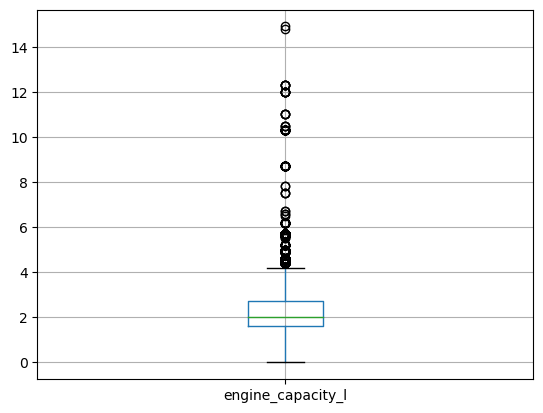

In [257]:
#построение ящика с усами
df.boxplot(column='engine_capacity_l') 
plt.show()

По ящику с усами мы видим, что единичные значения идут после 5л. Поэтому их можно удалить.

In [258]:
#делаем срез данных
df=df.query('engine_capacity_l<5').reset_index(drop=True)
df.head()

,company,brand,model,year_manufact,country_manufact,type_fuel,engine_capacity_l,transmis,type_drive,region,count,price_usd,sale_usd,segment_2013,class_2013,date
0,Mercur Auto,Audi,A3,2018-01-01,DEU,бензин,1.4,robot,FWD,Алматы,1,30581.000000,30581.000000,Легковые автомобили,c,2019-05-01
1,Mercur Auto,Audi,A3,2018-01-01,DEU,бензин,1.4,robot,FWD,Алматы,1,35087.719000,35087.719000,Легковые автомобили,c,2019-06-01
2,Mercur Auto,Audi,A3,2017-01-01,DEU,бензин,1.4,robot,FWD,Алматы,1,26608.232900,26608.232900,Легковые автомобили,c,2019-07-01
3,Mercur Auto,Audi,A4,2017-01-01,DEU,бензин,2.0,robot,4WD,Алматы,1,48343.982648,48343.982648,Легковые автомобили,d,2019-07-01
4,Mercur Auto,Audi,A5,2017-01-01,DEU,бензин,2.0,robot,4WD,Алматы,1,52760.736196,52760.736196,Легковые автомобили,s,2019-06-01


Теперь проверим есть ли аномальные значения в столбце с количеством.

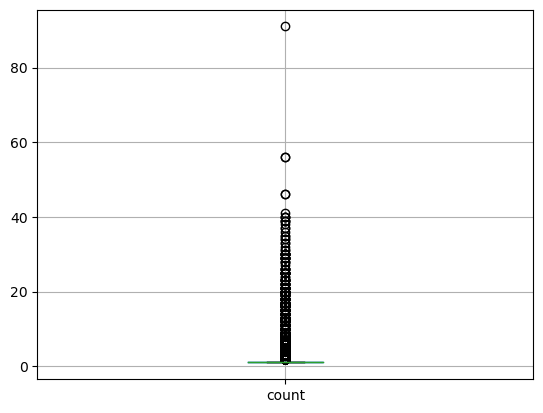

In [259]:
#построение ящика с усами
df.boxplot(column='count') 
plt.show()

In [260]:
#числовое описание данных
df['count'].describe()

count    29983.000000
mean         1.352867
std          2.148936
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         91.000000
Name: count, dtype: float64

По этим данным мы видим, что чаще всего берут 1 автомобиль, но есть те, кто берет несколько. Единичные выбросы начинаются после 15 машин, поэтому уберем их. Покупка сразу несколько машин одной модели и марки реальна, так как их могут покупать в таксопарк, для лизинга и тд. 

In [261]:
#делаем срез данных
df=df.query('count <15').reset_index(drop=True)
df

,company,brand,model,year_manufact,country_manufact,type_fuel,engine_capacity_l,transmis,type_drive,region,count,price_usd,sale_usd,segment_2013,class_2013,date
0,Mercur Auto,Audi,A3,2018-01-01,DEU,бензин,1.4,robot,FWD,Алматы,1,30581.000000,30581.000000,Легковые автомобили,c,2019-05-01
1,Mercur Auto,Audi,A3,2018-01-01,DEU,бензин,1.4,robot,FWD,Алматы,1,35087.719000,35087.719000,Легковые автомобили,c,2019-06-01
2,Mercur Auto,Audi,A3,2017-01-01,DEU,бензин,1.4,robot,FWD,Алматы,1,26608.232900,26608.232900,Легковые автомобили,c,2019-07-01
3,Mercur Auto,Audi,A4,2017-01-01,DEU,бензин,2.0,robot,4WD,Алматы,1,48343.982648,48343.982648,Легковые автомобили,d,2019-07-01
4,Mercur Auto,Audi,A5,2017-01-01,DEU,бензин,2.0,robot,4WD,Алматы,1,52760.736196,52760.736196,Легковые автомобили,s,2019-06-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29791,Allur Auto,ANKAI,HFF6850HGQ4,2018-01-01,KAZ,газовый,4.9,mechanic,2WD,Астана,1,77335.596016,77335.596016,Коммерческие автомобили,автобусы,2019-07-01
29792,Allur Auto,ANKAI,HFF6850HGQ4,2018-01-01,KAZ,газовый,4.9,mechanic,2WD,Астана,1,77335.596016,77335.596016,Коммерческие автомобили,автобусы,2019-07-01
29793,Allur Auto,ANKAI,HFF6850HGQ4,2018-01-01,KAZ,газовый,4.9,mechanic,2WD,Астана,1,77335.596016,77335.596016,Коммерческие автомобили,автобусы,2019-07-01
29794,Allur Auto,ANKAI,HFF6850HGQ4,2018-01-01,KAZ,газовый,4.9,mechanic,2WD,Астана,1,77335.596016,77335.596016,Коммерческие автомобили,автобусы,2019-07-01


Проверим столбец price_usd

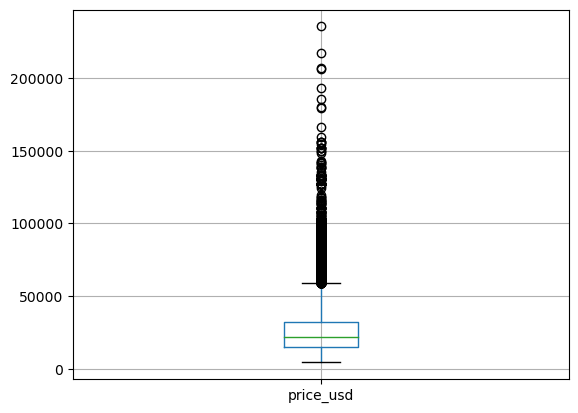

In [262]:
#построение ящика с усами
df.boxplot(column='price_usd') 
plt.show()

По ящику с усами видно, что единичные выбросы начинаются после 125 000, поэтому уберем их.

In [263]:
#делаем срез данных и делаем округление значений
df=df.query('price_usd<125000').reset_index(drop=True)
df['price_usd']=df['price_usd'].round(1)
df.head()

,company,brand,model,year_manufact,country_manufact,type_fuel,engine_capacity_l,transmis,type_drive,region,count,price_usd,sale_usd,segment_2013,class_2013,date
0,Mercur Auto,Audi,A3,2018-01-01,DEU,бензин,1.4,robot,FWD,Алматы,1,30581.0,30581.000000,Легковые автомобили,c,2019-05-01
1,Mercur Auto,Audi,A3,2018-01-01,DEU,бензин,1.4,robot,FWD,Алматы,1,35087.7,35087.719000,Легковые автомобили,c,2019-06-01
2,Mercur Auto,Audi,A3,2017-01-01,DEU,бензин,1.4,robot,FWD,Алматы,1,26608.2,26608.232900,Легковые автомобили,c,2019-07-01
3,Mercur Auto,Audi,A4,2017-01-01,DEU,бензин,2.0,robot,4WD,Алматы,1,48344.0,48343.982648,Легковые автомобили,d,2019-07-01
4,Mercur Auto,Audi,A5,2017-01-01,DEU,бензин,2.0,robot,4WD,Алматы,1,52760.7,52760.736196,Легковые автомобили,s,2019-06-01


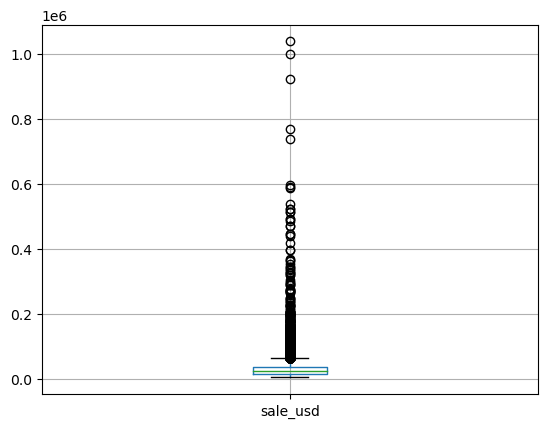

In [264]:
#построение ящика с усами
df.boxplot(column='sale_usd') 
plt.show()

Единичные выбросы начинаются после 250 000. Уберем их.

In [265]:
#делаем срез данных и делаем округление значений
df=df.query('sale_usd<250000').reset_index(drop=True)
df['sale_usd']=df['sale_usd'].round(1)
df.head()

,company,brand,model,year_manufact,country_manufact,type_fuel,engine_capacity_l,transmis,type_drive,region,count,price_usd,sale_usd,segment_2013,class_2013,date
0,Mercur Auto,Audi,A3,2018-01-01,DEU,бензин,1.4,robot,FWD,Алматы,1,30581.0,30581.0,Легковые автомобили,c,2019-05-01
1,Mercur Auto,Audi,A3,2018-01-01,DEU,бензин,1.4,robot,FWD,Алматы,1,35087.7,35087.7,Легковые автомобили,c,2019-06-01
2,Mercur Auto,Audi,A3,2017-01-01,DEU,бензин,1.4,robot,FWD,Алматы,1,26608.2,26608.2,Легковые автомобили,c,2019-07-01
3,Mercur Auto,Audi,A4,2017-01-01,DEU,бензин,2.0,robot,4WD,Алматы,1,48344.0,48344.0,Легковые автомобили,d,2019-07-01
4,Mercur Auto,Audi,A5,2017-01-01,DEU,бензин,2.0,robot,4WD,Алматы,1,52760.7,52760.7,Легковые автомобили,s,2019-06-01


Были изучены и удалены аномальные данные в 4-х столбцах.

In [266]:
#расчет удаленных данных
shape_1=df.shape[0]
shape_end=100-(shape_1*100/shape)
print('Убранное количество данных во время предобработки в %:', shape_end)

Убранное количество данных во время предобработки в %: 9.679186704815237


В данном разделе были удалены ненужные столбцы, изменены типы данных, убраны неявные дубликаты, обработаны значения и убраны выбросы. Всего мы убрали 9.7% данных во время пред обработки, что допустимо. Теперь данные готовы к дальнейшему анализу.

## 3 Исследовательский анализ данных
<a id="analiz"></a> 

### 3.1 Определение временного периода для дальнейшего анализа
<a id="time"></a> 

Изучим за какой период 2019 года у нас есть данные.

In [267]:
#определение периода
min_d=df['date'].min()
print(min_d)
max_d=df['date'].max()
max_d

2019-01-01 00:00:00


Timestamp('2019-09-01 00:00:00')

В итоге получается, что у нас есть данные с января по сентябрь 2019 года.

### 3.2 Изучение продаж
<a id="sale"></a> 

Построим график для изучения продаж в денежном и натуральном выражении.

In [268]:
#создание сводной таблицы
sale=df.pivot_table(index='date', values=['count','sale_usd'], aggfunc='sum').reset_index()
sale

,date,count,sale_usd
0,2019-01-01,2883,67760183.9
1,2019-02-01,3620,84844691.0
2,2019-03-01,3657,81994719.9
3,2019-04-01,3781,91110352.6
4,2019-05-01,4404,115830930.3
5,2019-06-01,4489,122419468.7
6,2019-07-01,4092,110664945.1
7,2019-08-01,4496,112336901.3
8,2019-09-01,4403,111775256.9


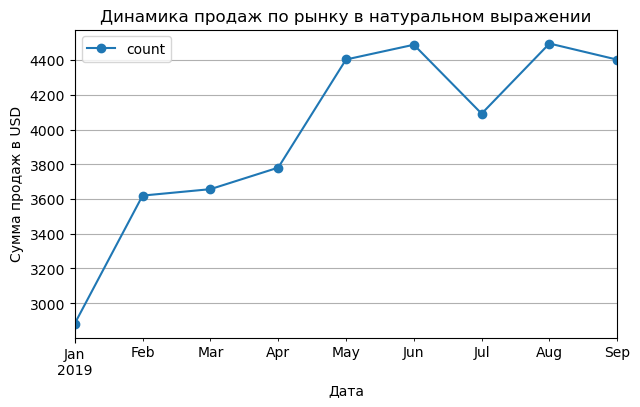

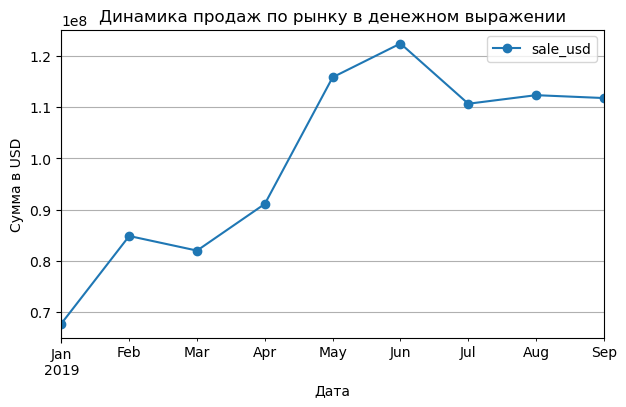

In [269]:
#построение графиков
sale.plot(x='date', y='count', grid=True, style='-o' , xlabel='Дата', figsize=(7,4),
          ylabel='Сумма продаж в USD', title='Динамика продаж по рынку в натуральном выражении')
sale.plot(x='date', y='sale_usd', grid=True, style='-o',xlabel='Дата', figsize=(7,4),
          ylabel='Сумма в USD', title='Динамика продаж по рынку в денежном выражении')
plt.show()

По данным графикам мы видим, что с января по сентябрь продажи машин в количественном и денежном выражении выросли. В мае, июне и августе было больше всего продано машин в количественном выражении, но в денежном выражении больше продаж в мае и июне.

### 3.2 Изучение продаж по категориям
<a id="cat"></a>

#### 3.2.1 Вид топлива
<a id="fuel"></a>

In [270]:
#создание сводной таблицы
fuel=df.pivot_table(index='date',columns='type_fuel', values='sale_usd', aggfunc='sum').reset_index()
fuel

type_fuel,date,бензин,газовый,гибрид,дизель,электрический
0,2019-01-01,66256346.4,0.0,65201.2,1438636.3,0.0
1,2019-02-01,83046482.6,0.0,112628.0,1685580.4,0.0
2,2019-03-01,80828244.1,0.0,0.0,1166475.8,0.0
3,2019-04-01,88566933.9,0.0,214425.5,2328993.2,0.0
4,2019-05-01,112866454.7,0.0,65004.7,2851197.3,48273.6
5,2019-06-01,119700343.7,0.0,283583.7,2337826.5,97714.8
6,2019-07-01,101811931.0,5413492.0,255774.6,3183747.5,0.0
7,2019-08-01,110270887.6,0.0,175824.3,1890189.4,0.0
8,2019-09-01,109883074.7,0.0,214000.9,1678181.3,0.0


In [271]:
#создание сводной таблицы
fuel_cnt=df.pivot_table(index='date',columns='type_fuel', values='count', aggfunc='sum').reset_index()
fuel_cnt

type_fuel,date,бензин,газовый,гибрид,дизель,электрический
0,2019-01-01,2843,0,1,39,0
1,2019-02-01,3572,0,1,47,0
2,2019-03-01,3621,0,0,36,0
3,2019-04-01,3701,0,3,77,0
4,2019-05-01,4330,0,1,72,1
5,2019-06-01,4426,0,3,57,3
6,2019-07-01,3919,70,3,100,0
7,2019-08-01,4443,0,2,51,0
8,2019-09-01,4335,0,3,65,0


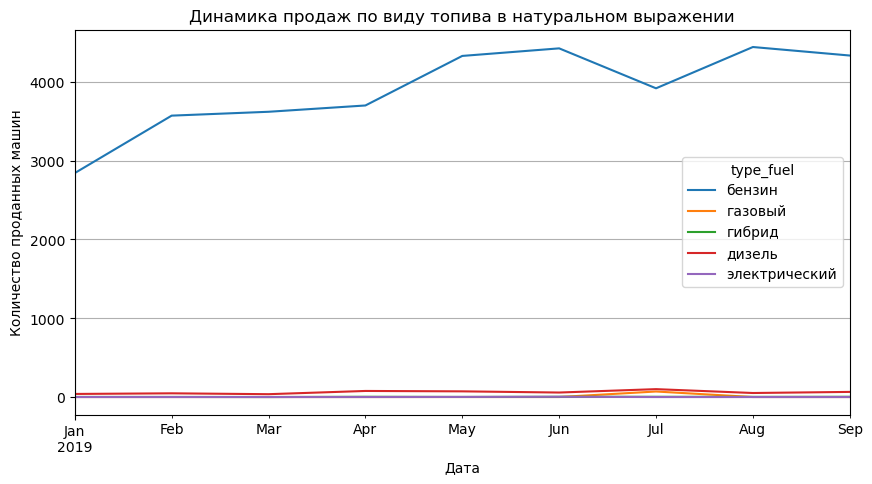

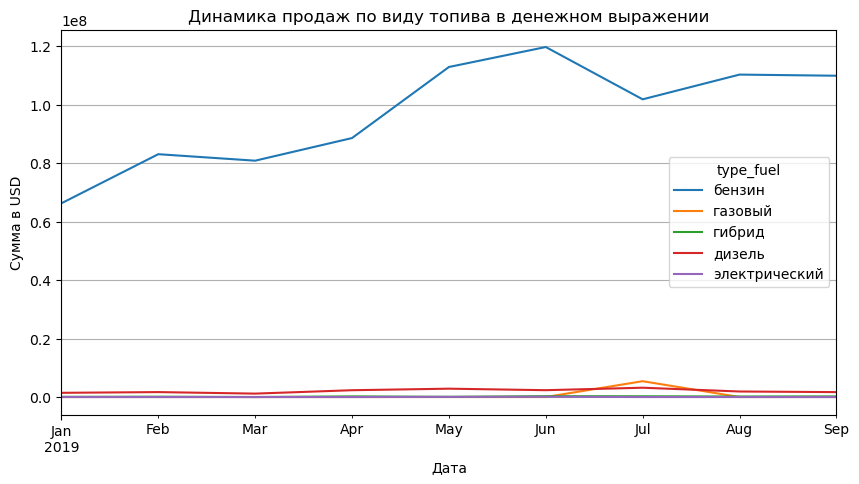

In [272]:
#построение графиков
fuel_cnt.plot(x='date', grid=True,figsize=(10,5),xlabel='Дата', 
          ylabel='Количество проданных машин', title='Динамика продаж по виду топива в натуральном выражении')
fuel.plot(x='date', grid=True, figsize=(10,5),xlabel='Дата', 
          ylabel='Сумма в USD', title='Динамика продаж по виду топива в денежном выражении')
plt.show()

По данным графикам мы видим, что в Казахстане чаще всего покупают машины на бензине. Скорее всего это связано с тем, что бензиновые двигателиболее практичные и запчасти на такие машины дешевле в эксплуатации. 

#### 3.2.2 Сегмент
<a id="seg"></a>

In [273]:
#создание сводной таблицы
segment_cat=df.pivot_table(index='date',columns='segment_2013', values='sale_usd', aggfunc='sum')
segment_cat

segment_2013,Внедорожники,Коммерческие автомобили,Легковые автомобили,Минивэны,Пикапы
date,,,,,
2019-01-01,37497873.3,4134067.2,23156747.3,443631.1,2527865.0
2019-02-01,45580701.2,6272566.5,29352196.3,253269.6,3385957.4
2019-03-01,41532851.8,6800169.6,31069096.4,42376.4,2550225.7
2019-04-01,48653609.2,7827956.8,30562095.9,218552.1,3848138.6
2019-05-01,57738701.4,8436181.4,46083136.0,725688.9,2847222.6
2019-06-01,66314036.4,6894502.4,44189103.2,370525.2,4651301.5
2019-07-01,58627734.1,13139668.4,35884538.2,142262.6,2870741.8
2019-08-01,67186341.8,6934846.2,35349965.8,15180.9,2850566.6
2019-09-01,67946946.7,6550427.7,35470719.7,113694.0,1693468.8


In [274]:
#создание сводной таблицы
segment_cat_cnt=df.pivot_table(index='date',columns='segment_2013', values='count', aggfunc='sum')
segment_cat_cnt

segment_2013,Внедорожники,Коммерческие автомобили,Легковые автомобили,Минивэны,Пикапы
date,,,,,
2019-01-01,1045,217,1531,9,81
2019-02-01,1348,312,1854,6,100
2019-03-01,1413,342,1829,1,72
2019-04-01,1523,397,1746,5,110
2019-05-01,1707,394,2203,17,83
2019-06-01,1928,347,2067,8,139
2019-07-01,1779,443,1777,6,87
2019-08-01,2214,375,1818,1,88
2019-09-01,2035,372,1936,4,56


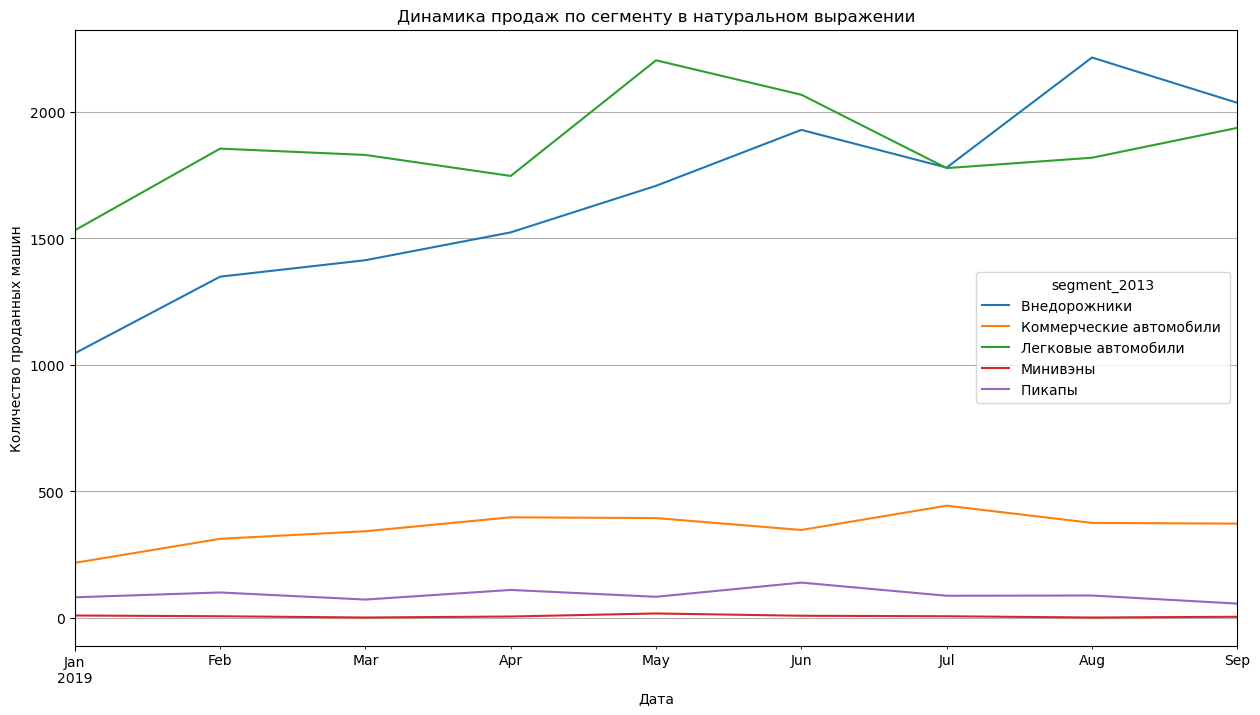

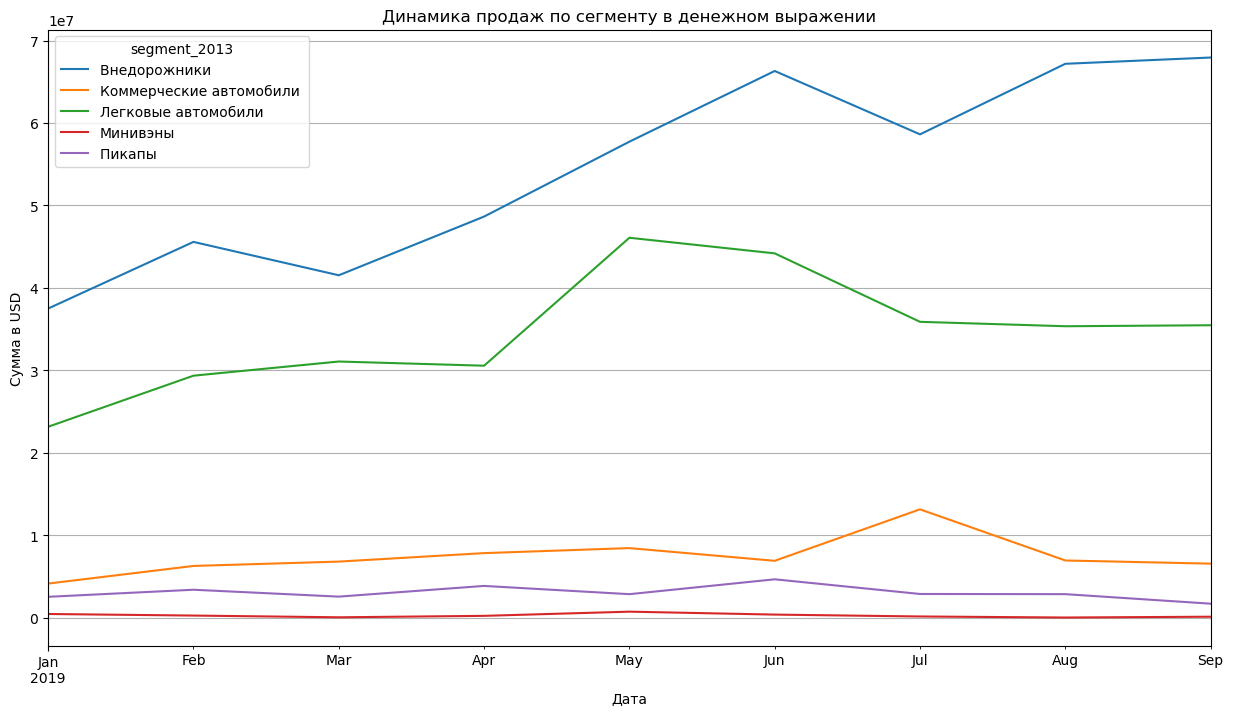

In [275]:
#построение графиков
segment_cat_cnt.plot( grid=True,figsize=(15,8),xlabel='Дата', 
          ylabel='Количество проданных машин', title='Динамика продаж по сегменту в натуральном выражении')
segment_cat.plot(grid=True, figsize=(15,8), xlabel='Дата', 
          ylabel='Сумма в USD', title='Динамика продаж по сегменту в денежном выражении')
plt.show()

По данным графикам вы видим, что чаще всего приобретают внедорожники и легковые автомобили. Виден рост прадаж машин-внедорожников с января по сентябрь. Легковые автомобили с мая меньше стали приобретать.

#### 3.2.3 Класс
<a id="class"></a>

In [276]:
#создание сводной таблицы
class_cat=df.pivot_table(index='date',columns='class_2013', values='sale_usd', aggfunc='sum')
class_cat

class_2013,a,b,c,d,e,f,j,m,pick-ups,s,автобусы,грузовики
date,,,,,,,,,,,,
2019-01-01,521518.9,11393506.3,3527246.0,412777.1,7242552.9,59146.1,37497873.3,636953.8,2527865.0,0.0,195487.0,3745257.5
2019-02-01,387237.1,12600254.4,6320786.4,220706.3,9560060.8,263151.3,45580701.2,962874.9,3385957.4,0.0,205001.1,5357960.1
2019-03-01,391029.1,12138295.5,7928790.8,362689.2,9763462.2,383163.7,41532851.8,570408.9,2550225.7,101665.9,0.0,6272137.1
2019-04-01,123602.2,13514458.8,6249880.0,468781.6,10099820.3,105553.0,48653609.2,998957.2,3848138.6,0.0,67749.0,6979802.7
2019-05-01,35390.9,14478029.8,7976554.8,337814.5,23136003.1,119342.9,57738701.4,2017632.0,2847222.6,0.0,100569.9,7043668.4
2019-06-01,0.0,11627986.8,8694819.0,413686.7,23068836.1,331013.9,66314036.4,1076520.5,4651301.5,52760.7,409529.6,5778977.5
2019-07-01,0.0,10562225.0,7780764.5,737592.3,16240104.3,563852.1,58627734.1,805236.3,2870741.8,0.0,5766245.1,6710449.6
2019-08-01,0.0,11424279.0,7079783.8,362577.0,16017851.9,368972.3,67186341.8,1079992.5,2850566.6,96501.8,0.0,5870034.6
2019-09-01,21800.0,12238297.0,8098682.0,386611.4,14520768.6,204560.7,67946946.7,791246.6,1693468.8,0.0,89973.7,5782901.4


In [277]:
#создание сводной таблицы
class_cat_cnt=df.pivot_table(index='date',columns='class_2013', values='count', aggfunc='sum')
class_cat_cnt

class_2013,a,b,c,d,e,f,j,m,pick-ups,s,автобусы,грузовики
date,,,,,,,,,,,,
2019-01-01,58,1045,190,13,224,1,1045,17,81,0,3,206
2019-02-01,43,1163,338,7,300,3,1348,35,100,0,3,280
2019-03-01,41,1056,408,11,308,4,1413,23,72,1,0,320
2019-04-01,13,1096,328,13,295,1,1523,38,110,0,1,363
2019-05-01,2,1122,429,11,638,1,1707,59,83,0,1,351
2019-06-01,0,941,467,16,638,4,1928,38,139,1,4,313
2019-07-01,0,869,416,24,462,6,1779,39,87,0,74,336
2019-08-01,0,949,390,13,461,4,2214,48,88,1,0,328
2019-09-01,2,1024,453,14,441,2,2035,41,56,0,1,334


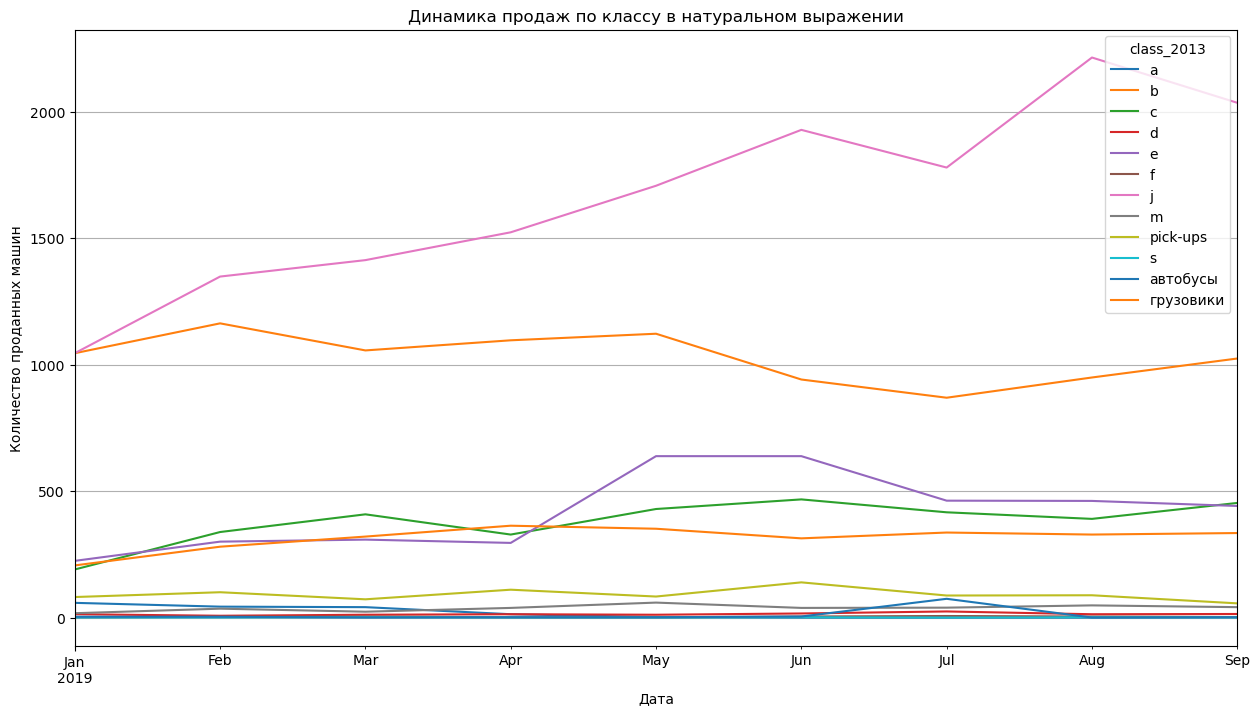

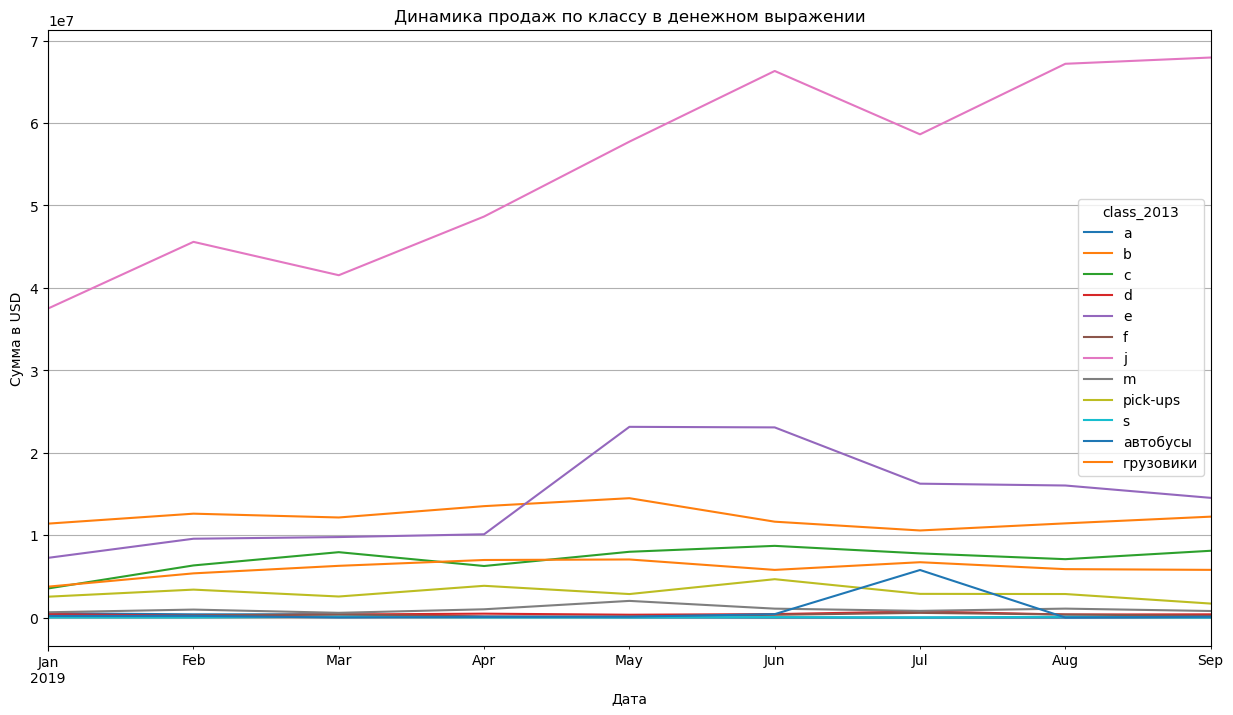

In [278]:
#построение графиков
class_cat_cnt.plot(grid=True,figsize=(15,8),xlabel='Дата', 
          ylabel='Количество проданных машин', title='Динамика продаж по классу в натуральном выражении')
class_cat.plot(grid=True, figsize=(15,8), xlabel='Дата', 
          ylabel='Сумма в USD', title='Динамика продаж по классу в денежном выражении')
plt.show()

По количеству чаще всего приобретают машины класса J(внедорожники) и B(небольшие городские автомобили). С январь по сентябрь идет рост количества продаж автомобилей класса J, а продажи машин класса В стали снижаться. В денежном выражении видим одного лидера по сумме продаж - класс J.

#### 3.2.4 Коробка передач
<a id="transmis"></a>

In [279]:
#создание сводной таблицы
transmis_cat=df.pivot_table(index='date',columns='transmis', values='sale_usd', aggfunc='sum')
transmis_cat

transmis,automatic,mechanic,robot
date,,,
2019-01-01,49542209.4,15206282.4,3011692.1
2019-02-01,62398105.4,20018512.3,2428073.3
2019-03-01,57659227.9,20808668.2,3526823.8
2019-04-01,64600998.5,22683524.5,3825829.6
2019-05-01,90646483.2,22132457.6,3051989.5
2019-06-01,97295724.0,20745848.5,4377896.2
2019-07-01,84331059.4,24935694.6,1398191.1
2019-08-01,85409775.1,22623962.9,4303163.3
2019-09-01,90701013.8,16870534.9,4203708.2


In [280]:
#создание сводной таблицы
transmis_cat_cnt=df.pivot_table(index='date',columns='transmis', values='count', aggfunc='sum')
transmis_cat_cnt

transmis,automatic,mechanic,robot
date,,,
2019-01-01,1662,1153,68
2019-02-01,2160,1409,51
2019-03-01,2127,1438,92
2019-04-01,2143,1515,123
2019-05-01,2845,1454,105
2019-06-01,3040,1359,90
2019-07-01,2709,1348,35
2019-08-01,2869,1532,95
2019-09-01,3110,1181,112


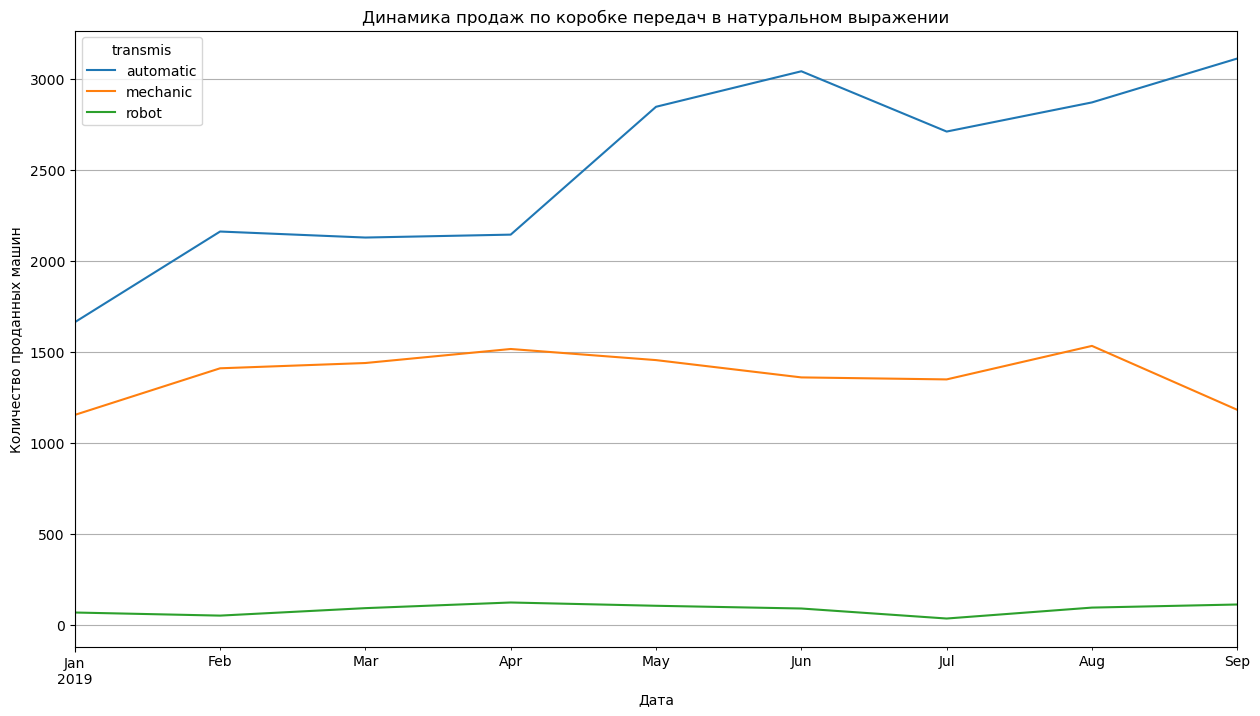

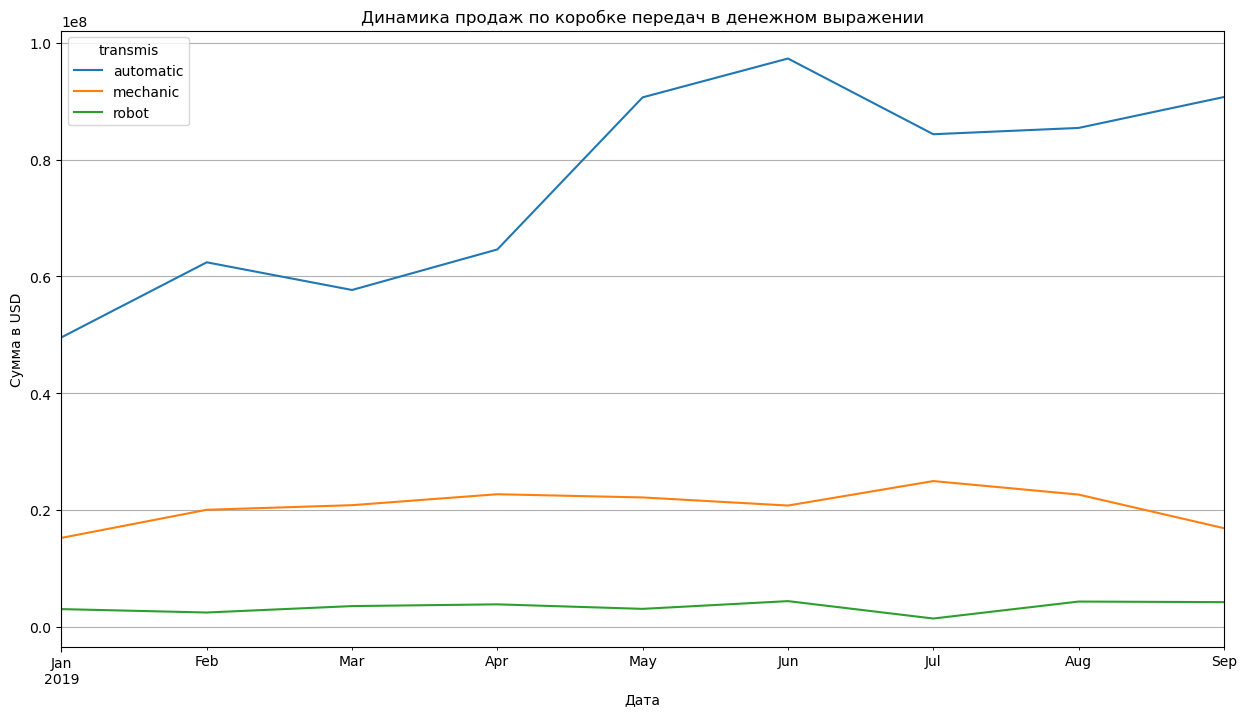

In [281]:
#построение графиков
transmis_cat_cnt.plot(grid=True,figsize=(15,8),xlabel='Дата', 
          ylabel='Количество проданных машин', title='Динамика продаж по коробке передач в натуральном выражении')
transmis_cat.plot(grid=True, figsize=(15,8), xlabel='Дата', 
          ylabel='Сумма в USD', title='Динамика продаж по коробке передач в денежном выражении')
plt.show()

По этим графикам видим, что чаще всего приобретают машины с коробкой передач - автомат. За весь период наблюдается у автомата рост в количественном и денежном выражении. Коробка передач- механика идет на втором месте по продажам, но их продажи в количественном и денежном выражении за весь период держатся в одном диапазоне, примерно. 

#### 3.2.5 Тип привода
<a id="drive"></a>

In [282]:
#создание сводной таблицы
t_drive_cat=df.pivot_table(index='date',columns='type_drive', values='sale_usd', aggfunc='sum')
t_drive_cat

type_drive,2WD,4WD,FWD,RWD
date,,,,
2019-01-01,5224510.7,38526068.5,21070680.5,2938924.2
2019-02-01,9355838.4,45504115.2,25545907.9,4438829.5
2019-03-01,11266776.3,39715759.3,26391762.6,4620421.7
2019-04-01,15224379.9,46693334.2,24670548.8,4522089.7
2019-05-01,21990537.7,51526494.1,36833881.1,5480017.4
2019-06-01,16546319.2,64328489.4,37259931.9,4284728.2
2019-07-01,18904072.9,57877628.8,29863149.2,4020094.2
2019-08-01,13608943.4,63315722.3,31231293.2,4180942.4
2019-09-01,14239820.2,62952040.3,30586761.7,3996634.7


In [283]:
#создание сводной таблицы
t_drive_cat_cnt=df.pivot_table(index='date',columns='type_drive', values='count', aggfunc='sum')
t_drive_cat_cnt

type_drive,2WD,4WD,FWD,RWD
date,,,,
2019-01-01,256,1049,1433,145
2019-02-01,462,1271,1678,209
2019-03-01,566,1237,1630,224
2019-04-01,870,1358,1336,217
2019-05-01,1116,1365,1665,258
2019-06-01,849,1715,1704,221
2019-07-01,777,1650,1465,200
2019-08-01,727,1947,1607,215
2019-09-01,748,1775,1654,226


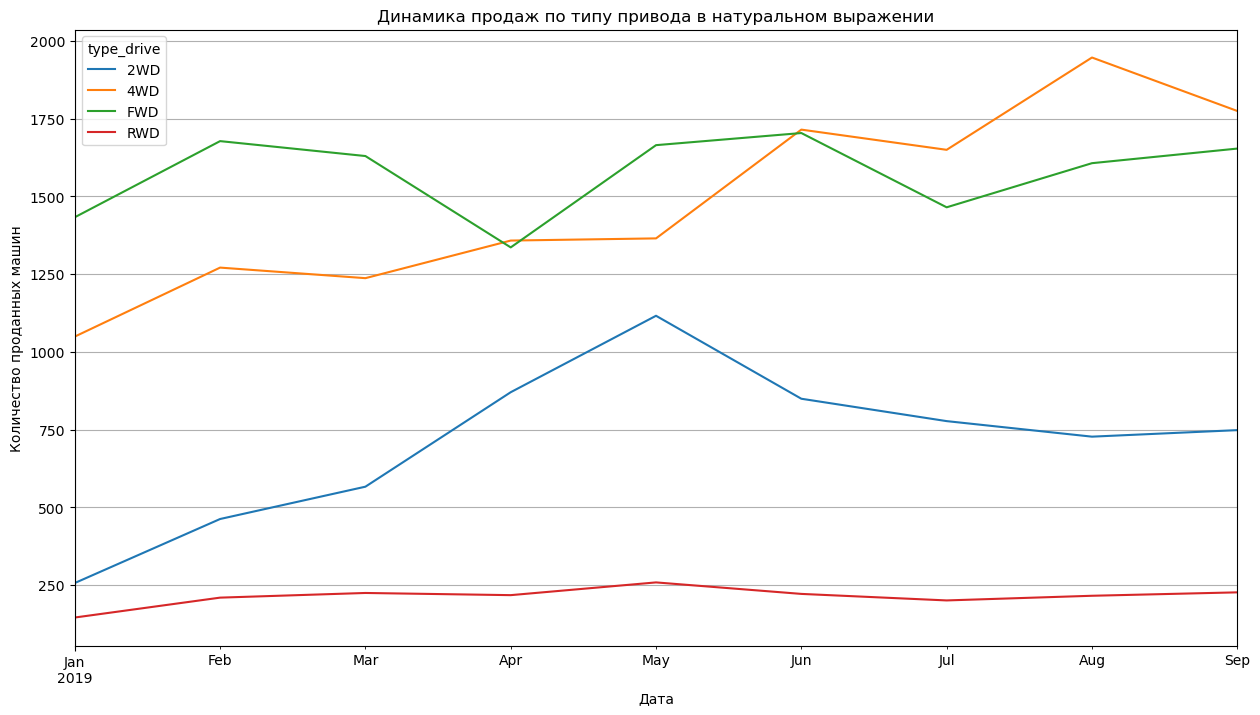

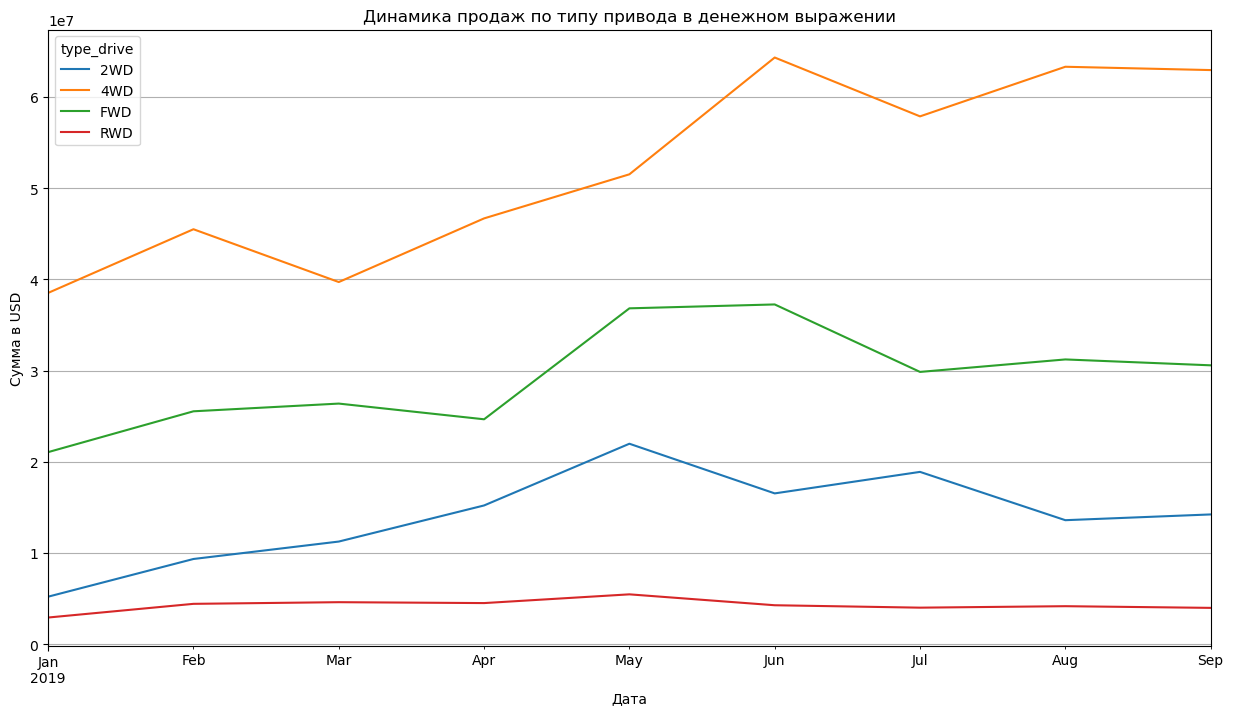

In [284]:
#построение графиков
t_drive_cat_cnt.plot(grid=True,figsize=(15,8),xlabel='Дата', 
          ylabel='Количество проданных машин', title='Динамика продаж по типу привода в натуральном выражении')
t_drive_cat.plot(grid=True, figsize=(15,8), xlabel='Дата', 
          ylabel='Сумма в USD', title='Динамика продаж по типу привода в денежном выражении')
plt.show()

По этим графикам видно, чаще всего приобирают машины с полным приводом (4WD), за весь период наблюдается рост показателей в денежном и количественном выражении. Данный привод имеет популярность, так как он установливается на внедорожники.
На втором месте по продажам машины с передним приводом (FWD).

#### 3.2.6 Страна производитель
<a id="country"></a>

In [285]:
#создание сводной таблицы
country_cat=df.pivot_table(index='date',columns='country_manufact', values='sale_usd', aggfunc='sum')
country_cat

country_manufact,AUT,BLR,DEU,HUN,JPN,KAZ,KOR,RUS,SWE,THA,TUR,UK,USA,UZB,VNM
date,,,,,,,,,,,,,,,
2019-01-01,0.0,0.0,1869685.9,0.0,25539739.6,14603875.1,0.0,15564508.4,0.0,2619736.4,1559967.1,406944.6,1535267.5,3994542.9,65916.4
2019-02-01,0.0,0.0,2071881.8,0.0,25306700.4,26800129.1,20034.2,18805371.7,0.0,3408987.4,2353165.5,578410.3,1186527.0,4313483.6,0.0
2019-03-01,0.0,0.0,1966168.6,0.0,16197200.9,28570555.3,0.0,24305726.2,217242.4,2861339.8,2989076.4,921362.2,1372822.5,2593225.6,0.0
2019-04-01,0.0,0.0,1916733.1,0.0,27414402.6,27099645.4,93000.9,25178550.3,214844.0,4247179.1,2706971.6,292327.8,1128725.2,817972.6,0.0
2019-05-01,0.0,0.0,2563197.5,25946.5,32221147.4,33391654.0,95285.4,39282415.8,0.0,3460298.3,2207001.1,1108977.4,1423822.9,51184.0,0.0
2019-06-01,0.0,0.0,2743532.8,0.0,33196429.0,31579385.3,91644.8,42394584.3,380137.5,5098753.6,4169600.2,584178.7,2130356.7,50865.8,0.0
2019-07-01,0.0,0.0,2020744.7,0.0,29001944.3,37317004.5,0.0,33909682.6,432861.1,2898286.0,3556350.0,285328.4,1222269.9,20473.6,0.0
2019-08-01,0.0,0.0,2991805.5,0.0,28342569.9,32338503.0,0.0,38930645.1,114837.3,3313101.5,3788764.3,1113330.7,1391162.8,12181.2,0.0
2019-09-01,0.0,0.0,1801742.1,28150.0,33936244.0,30169901.5,79613.0,38486169.5,73614.8,2149035.6,2741413.4,489283.0,1820090.0,0.0,0.0


In [286]:
#создание сводной таблицы
country_cat_cnt=df.pivot_table(index='date',columns='country_manufact', values='count', aggfunc='sum')
country_cat_cnt

country_manufact,AUT,BLR,DEU,HUN,JPN,KAZ,KOR,RUS,SWE,THA,TUR,UK,USA,UZB,VNM
date,,,,,,,,,,,,,,,
2019-01-01,0,0,38,0,463,1064,0,738,0,69,75,9,22,404,1
2019-02-01,0,0,37,0,454,1636,1,832,0,97,112,12,16,423,0
2019-03-01,0,0,33,0,323,1718,0,1074,3,76,136,20,20,254,0
2019-04-01,0,0,35,0,511,1722,2,1163,3,116,123,9,16,81,0
2019-05-01,0,0,41,1,585,2010,2,1522,0,94,104,18,22,5,0
2019-06-01,0,0,45,0,559,1887,2,1609,6,139,188,14,35,5,0
2019-07-01,0,0,32,0,504,1971,0,1302,6,85,159,10,21,2,0
2019-08-01,0,0,51,0,504,1939,0,1686,2,94,184,11,24,1,0
2019-09-01,0,0,31,1,596,1809,2,1725,1,63,132,7,36,0,0


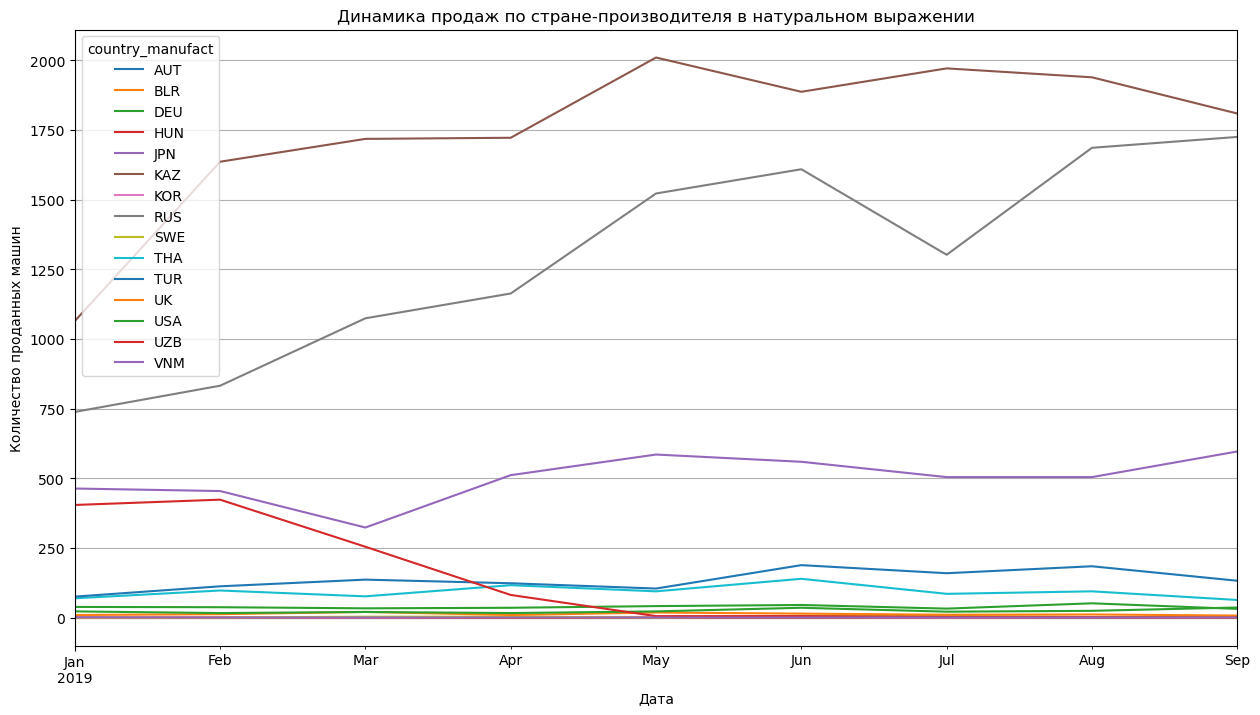

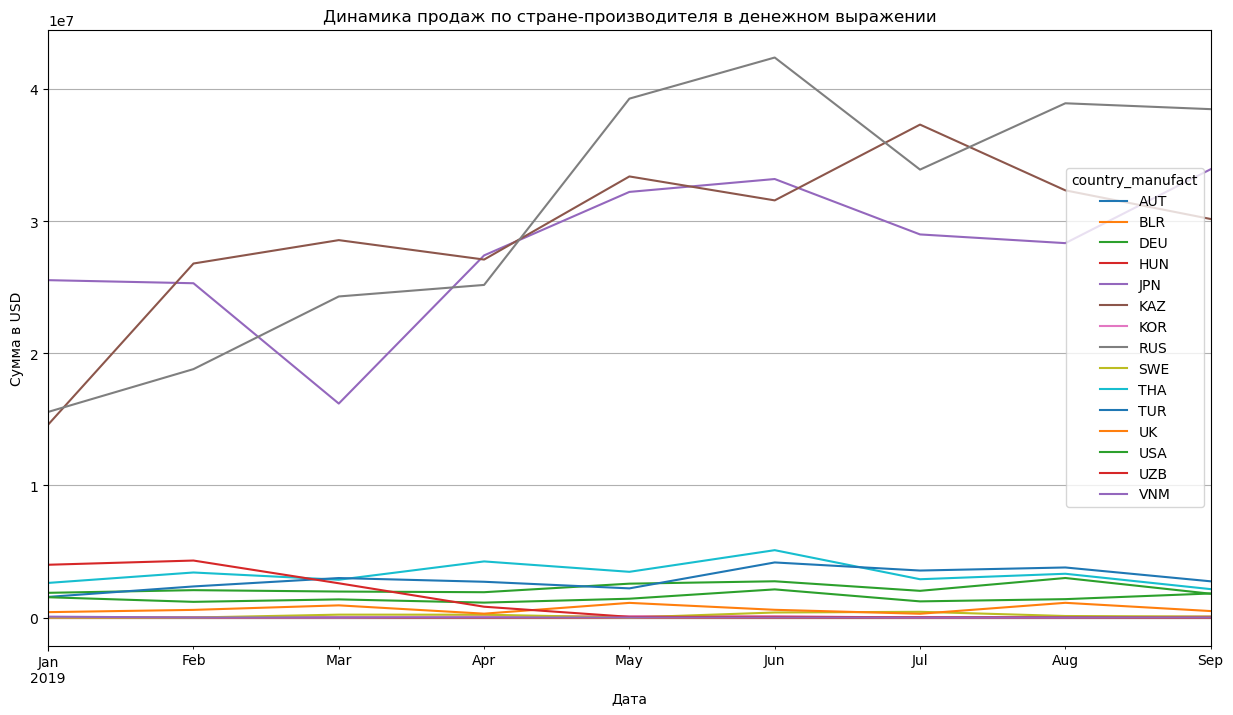

In [287]:
#построение графиков
country_cat_cnt.plot(grid=True,figsize=(15,8),xlabel='Дата', 
          ylabel='Количество проданных машин', title='Динамика продаж по стране-производителя в натуральном выражении')
country_cat.plot(grid=True, figsize=(15,8), xlabel='Дата', 
          ylabel='Сумма в USD', title='Динамика продаж по стране-производителя в денежном выражении')
plt.show()

В количественном и денежном выражении за весь период виден рост продаж машин, произведенных в Казахстане и России(они являются лидерами продаж). В денежном выражении появляется еще один лидер и это машины, произведенные в Японии. Японские машины покупают меньше, чем Казахстанские и Российские, но из-за того, что они стоят дороже, то по продажам в денежном выражении они попадают в топ 3. 

### 3.3 Топ 10 марок авто
<a id="top"></a>

In [288]:
#создание сводной таблицы
top_cnt=df.pivot_table(index='brand',values='count',aggfunc='sum').sort_values(by='count',ascending =False)
top_cnt_10=top_cnt.query('count>720')
top_cnt_10

,count
brand,
Toyota,9374
Lada,6012
Hyundai,5702
GAZ,2111
Ravon,1725
Nissan,1558
Kia,1336
UAZ,1054
Jac,998


In [289]:
#создание сводной таблицы
top=df.pivot_table(index='brand',values='sale_usd',aggfunc='sum').sort_values(by='sale_usd',ascending =False)
top_10=top.query('sale_usd > 15743751')
top_10

,sale_usd
brand,
Toyota,383875174.1
Hyundai,124743956.0
Lada,61505315.5
GAZ,40420604.0
Lexus,35681715.1
Nissan,35633273.6
Kia,27507700.0
Subaru,17311554.3
Ravon,17130340.7


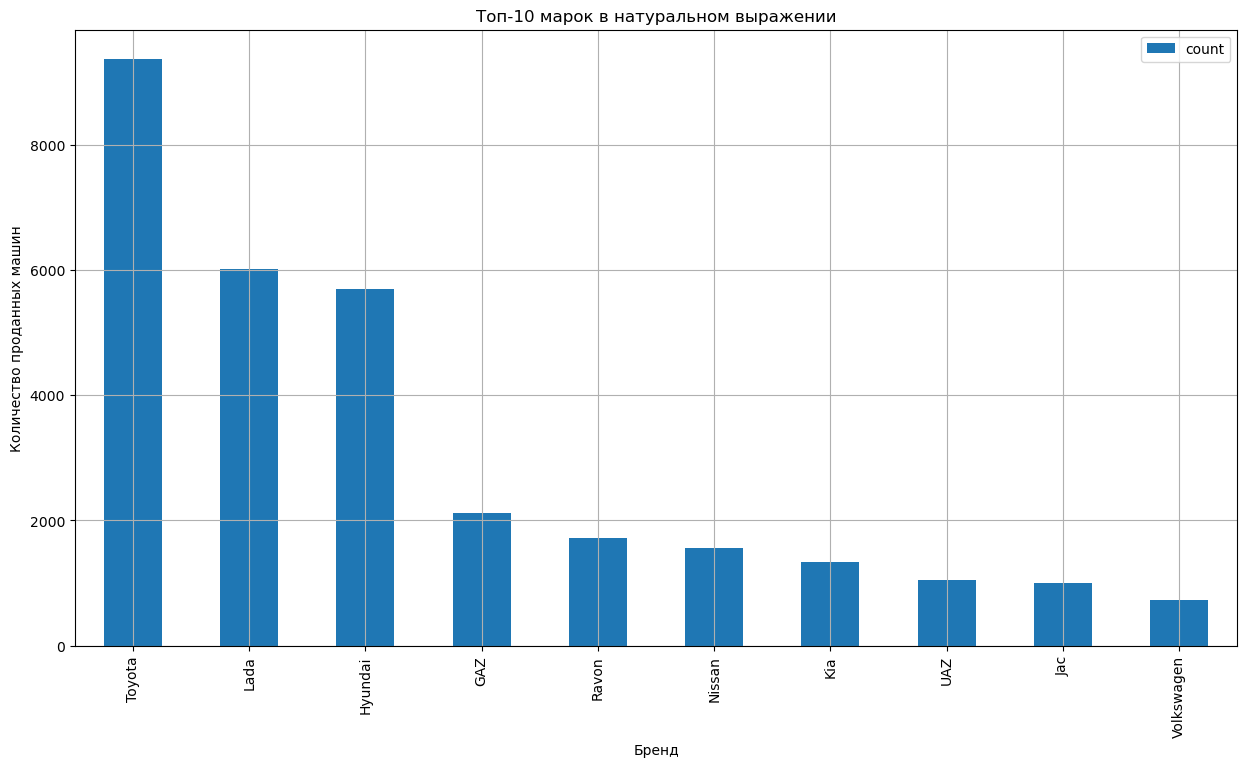

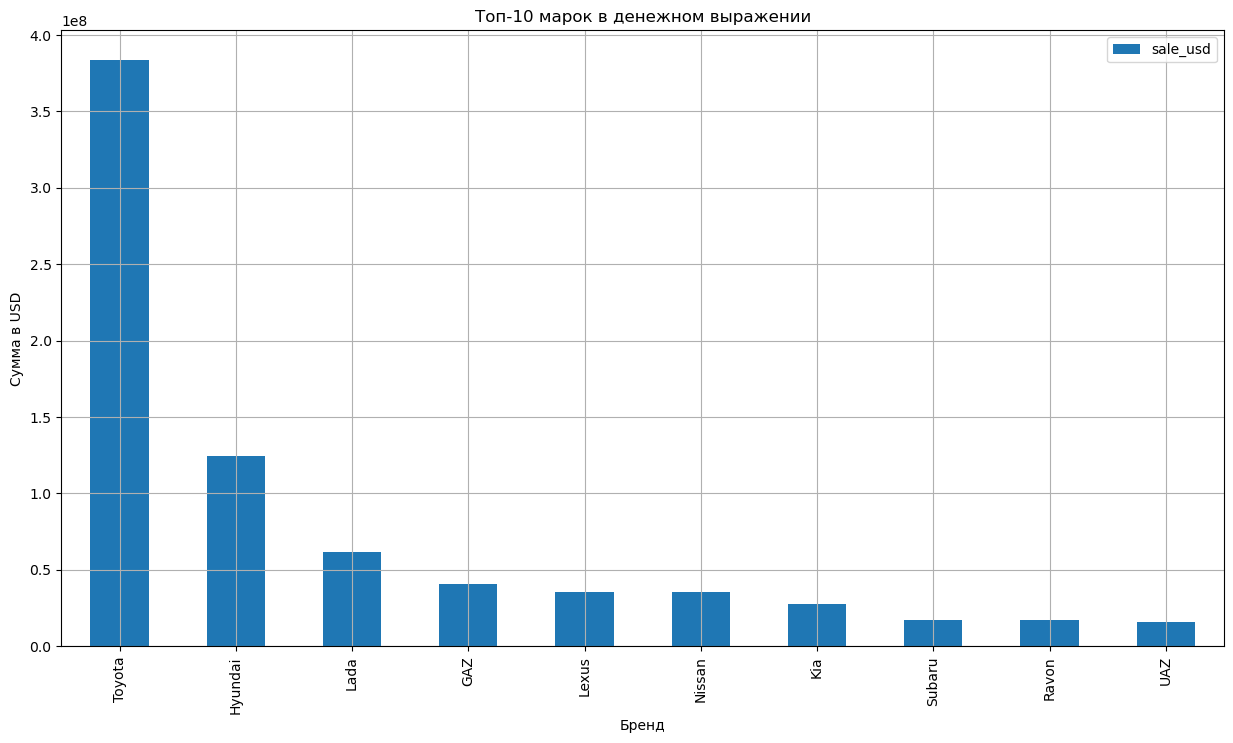

In [290]:
#построение графиков
top_cnt_10.plot(kind='bar',grid=True,figsize=(15,8),xlabel='Бренд', 
          ylabel='Количество проданных машин', title='Топ-10 марок в натуральном выражении')
top_10.plot(kind='bar',grid=True, figsize=(15,8), xlabel='Бренд', 
          ylabel='Сумма в USD', title='Топ-10 марок в денежном выражении')
plt.show()

По данным графикам видно, что больше всего в количественном выражении продаются Toyota, Lada и Hyundai. В денежном выражении лидеры такие же, только Hyundai поменялись местами с Lada, скорее всего из-за того, что машины марки Hyundai стоят дороже, чем Lada.

### 3.4 Анализ продаж всех марок
<a id="brand"></a>

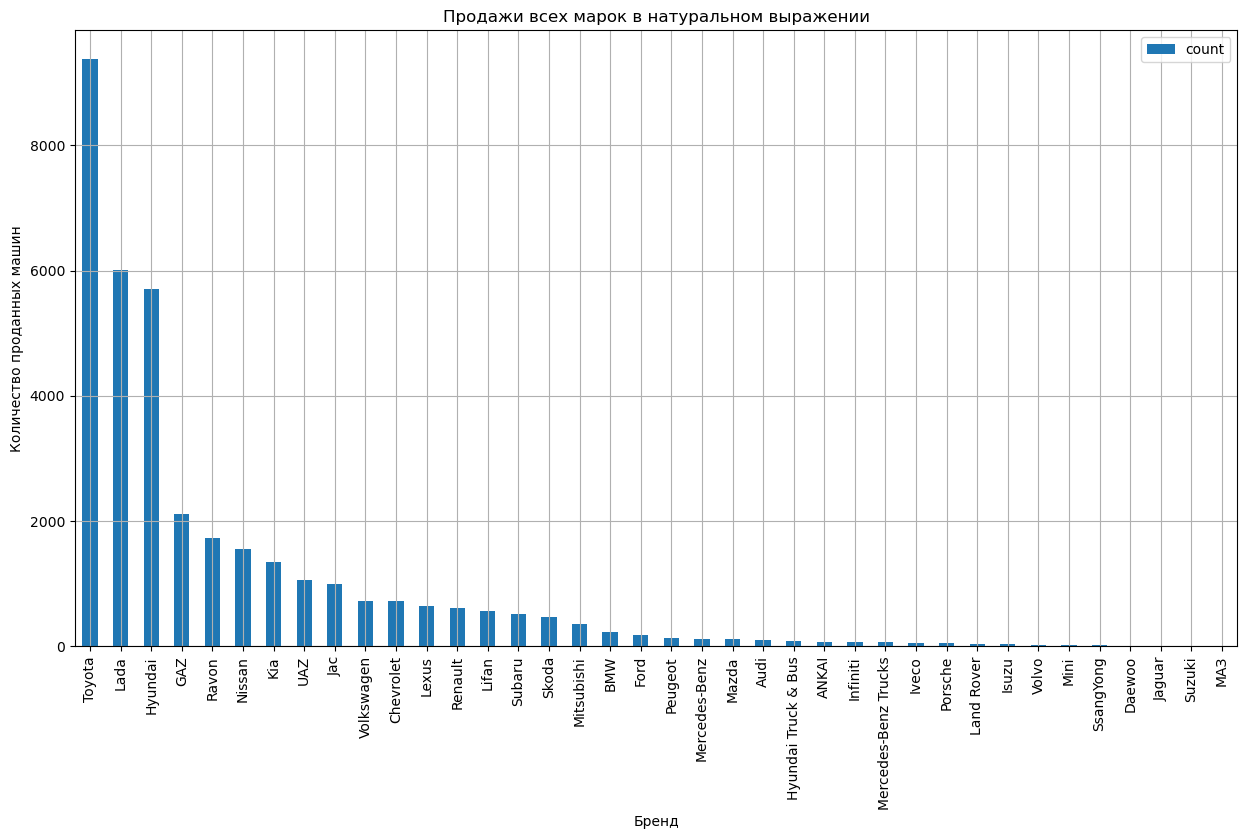

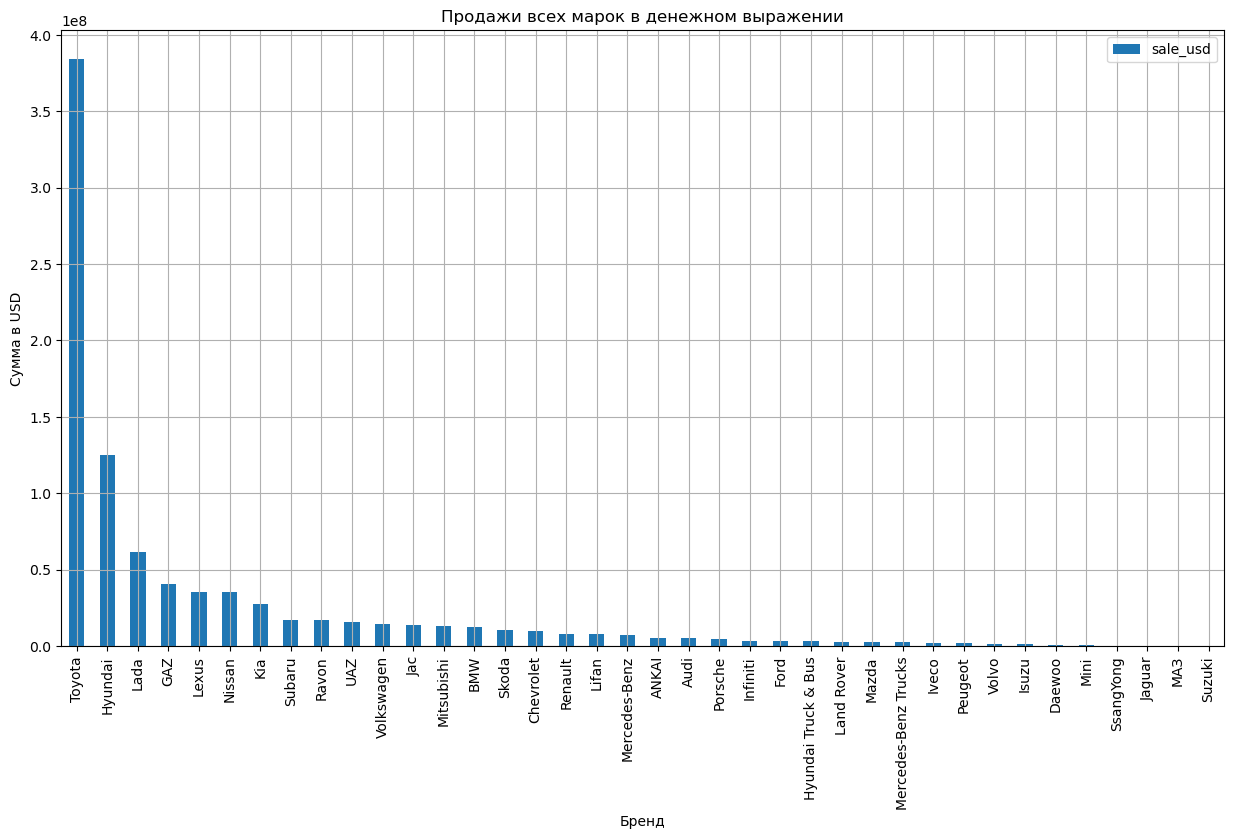

In [291]:
#построение графиков
top_cnt.plot(kind='bar',grid=True,figsize=(15,8),xlabel='Бренд', 
          ylabel='Количество проданных машин', title='Продажи всех марок в натуральном выражении')
top.plot(kind='bar',grid=True, figsize=(15,8), xlabel='Бренд', 
          ylabel='Сумма в USD', title='Продажи всех марок в денежном выражении')
plt.show()

По данным графикам мы видим, что реже всего в количественном выражении приобретают такие марки как Land Rover, Isuzu, Volvo, Mini, SsangYong, Jaguar, МАЗ и Suzuki. 

### 3.5 Анализ продаж по регионам
<a id="region"></a>

In [292]:
#создание сводной таблицы
region=df.pivot_table(index='region',values='sale_usd',aggfunc='sum').sort_values(by='sale_usd',ascending=False)
region.head()

,sale_usd
region,
Алматы,278032305.8
Астана,203214191.6
Атырау,54123821.0
Костанай,50794886.4
Шымкент,49684924.4


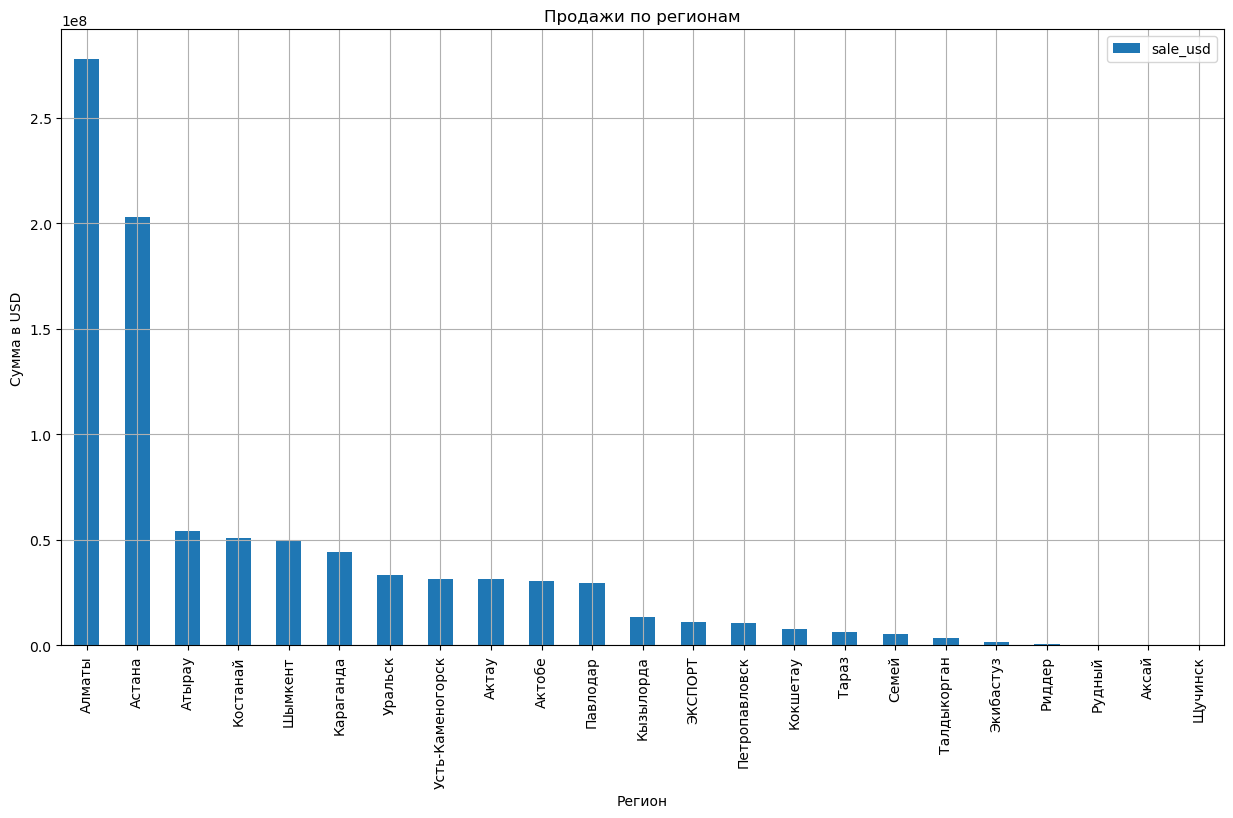

In [293]:
#построение графика
region.plot(kind='bar',grid=True,figsize=(15,8),xlabel='Регион', 
          ylabel='Сумма в USD', title='Продажи по регионам')
plt.show()

По данному графику мы видим, что больше всего продаж происходит в Алмате и Астане, так как это самые большие города в данной стране. В Алмате проживает 2 175 096 человек, а в Астане 1 367 085 человек. 

### 3.6 Анализ продаж по автоцентрам
<a id="company"></a>

In [294]:
#создание сводной таблицы
company=df.pivot_table(index='company',values='sale_usd',aggfunc='sum').sort_values(by='sale_usd',ascending=False)
company.head()

,sale_usd
company,
Toyota Motor Kazakhstan,419556889.2
Astana Motors,126503610.6
БИПЭК АВТО,107896638.5
Вираж,58116993.5
Nissan Manufacturing RUS,39188796.1


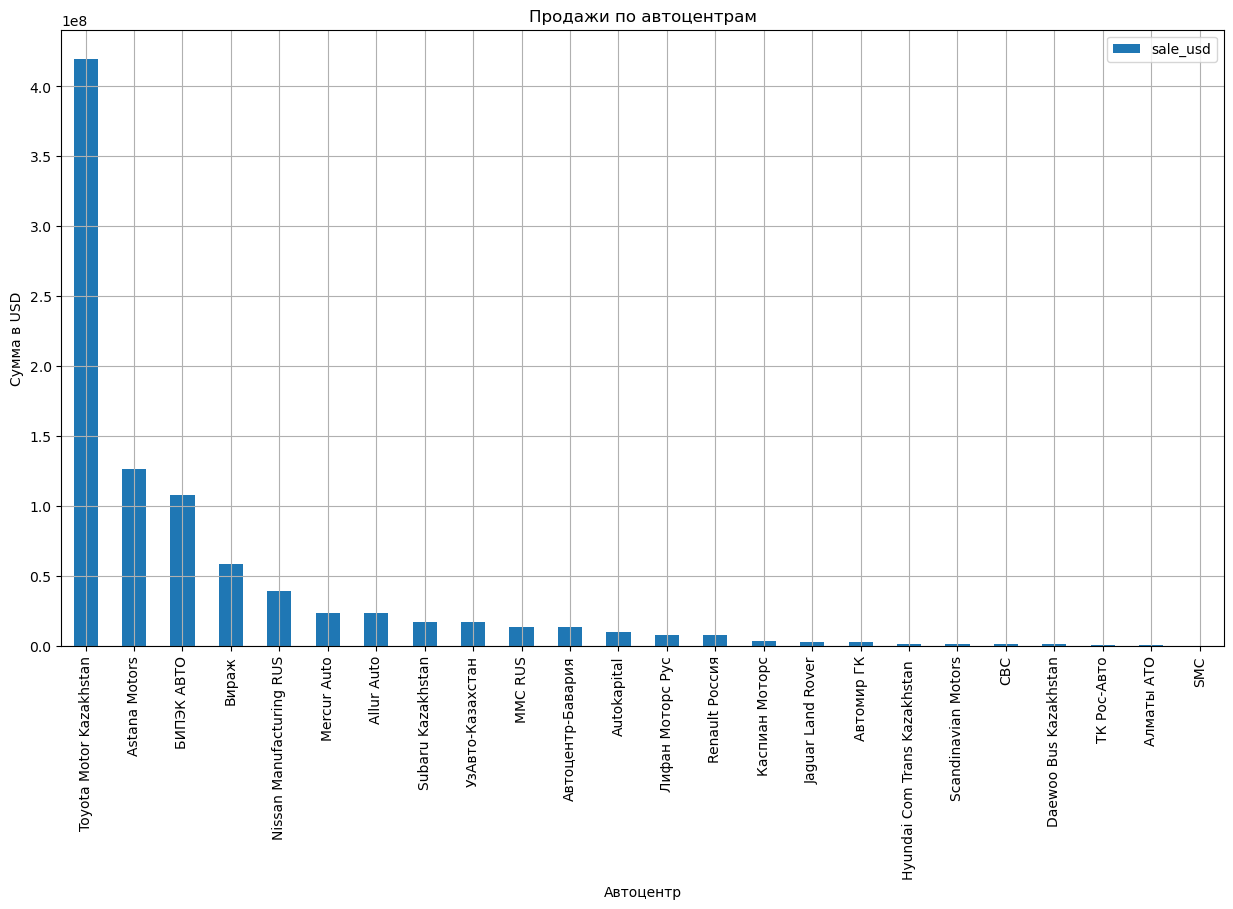

In [295]:
#построение графика
company.plot(kind='bar',grid=True,figsize=(15,8),xlabel='Автоцентр', 
          ylabel='Сумма в USD', title='Продажи по автоцентрам')
plt.show()

По данному графику мы видим, что больше всего продаж автомобилей происходит в таких автоцентрах как:
- Toyota Motor Kazakhstan
- Astana Motors
- БИПЭК АВТО

В данном разделе мы выяснили, где и какие машины чаще всего приобретают в Казахстане. Чаще всего приобретают машины в Алмате, Астане и Атырау в автоцентре Toyota Motor Kazakhstan, Astana Motors, БИПЭК АВТО.
Самые распространенные параметры машин, которые покупают:
- Вид топлива: бензин;
- Внедорожник или легковая машина;
- Класс J или B;
- Распространенный тип коробки передач- автомат, но механика тоже пользуется спросом;
- Передний или полный привод;
- Страна-производитель машины Казахстан, Россия или Япония.

## 4 Анализ Меркур Авто
<a id="mercur"></a>

### 4.1 Анализ прибыли
<a id="income"></a>

Проведем анализ общей прибыли компании, прибыли по брендам, среднюю стоимость продаж и среднюю стоимость в разбивке по маркам за 9 месяцев.

In [296]:
#срез данных для анализа компании Меркур авто
mercur=df.query('company== "Mercur Auto"')

In [297]:
#расчет прибыли
income=mercur['sale_usd'].sum()
print('Общая прибыль в USD равна',income)

Общая прибыль в USD равна 23754479.5


In [298]:
#расчет средней стоимости продаж
income_mean=(mercur['sale_usd'].mean()).round()
print('Средняя стоимость продаж в USD равна',income_mean)

Средняя стоимость продаж в USD равна 30971.0


Теперь посмотрим на продажи по брендам в этой компании.

In [299]:
#создание ссводной таблицы, переименование столбцов и сортировка
income_brand=mercur.pivot_table(index='brand',values='sale_usd',aggfunc=['sum','mean'])
income_brand.columns=['income','average_cost']
income_brand=income_brand.sort_values(by='income',ascending=False)
income_brand

,income,average_cost
brand,,
Volkswagen,14219483.3,22751.173280
Audi,5164723.8,54943.870213
Porsche,4370272.4,91047.341667


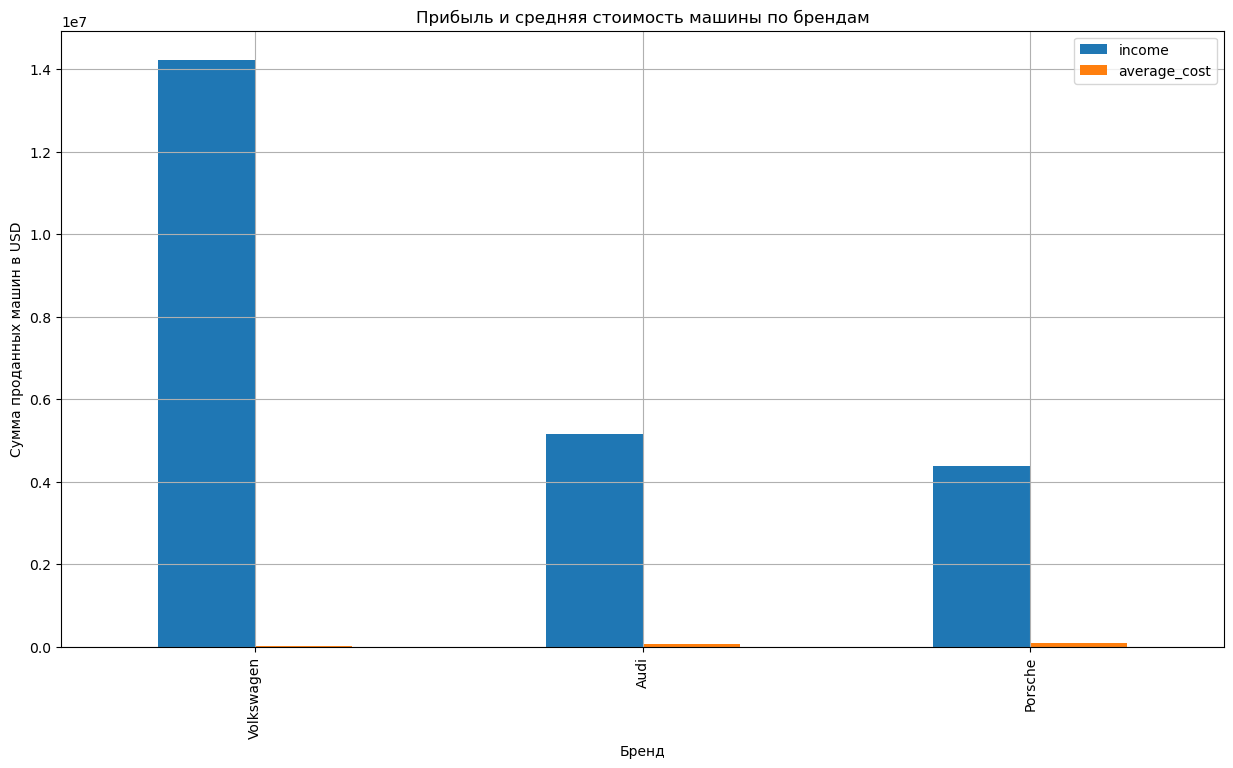

In [300]:
#создание графика
income_brand.plot(kind='bar',grid=True,figsize=(15,8),xlabel='Бренд', 
          ylabel='Сумма проданных машин в USD', title='Прибыль и средняя стоимость машины по брендам')
plt.show()

За 9 месяцев Меркур Авто продал машины на 23 754 479 долларов, средняя стоимость машины равна 30 971 долларов. 
А по графику мы видим, что чаще всего продаются машины Volkswagen, но у этого бренда самая низкая средняя стоимость авто. Дороже всего стоят машины марки Porsche.

#### 4.1.1 Анализ прибыли по каждому месяцу
<a id="income_month"></a>

In [301]:
#создание сводной таблицы
month_income=mercur.pivot_table(index='date',values='sale_usd',aggfunc=['sum','mean'])
month_income.columns=['income','average_cost']
month_income

,income,average_cost
date,,
2019-01-01,1951227.9,34232.068421
2019-02-01,1249566.2,59503.152381
2019-03-01,2126745.3,32719.158462
2019-04-01,3293735.4,32611.241584
2019-05-01,3389934.8,38089.155056
2019-06-01,3256076.3,39229.834940
2019-07-01,1339459.2,60884.509091
2019-08-01,2277538.0,29967.605263
2019-09-01,4870196.4,19249.788142


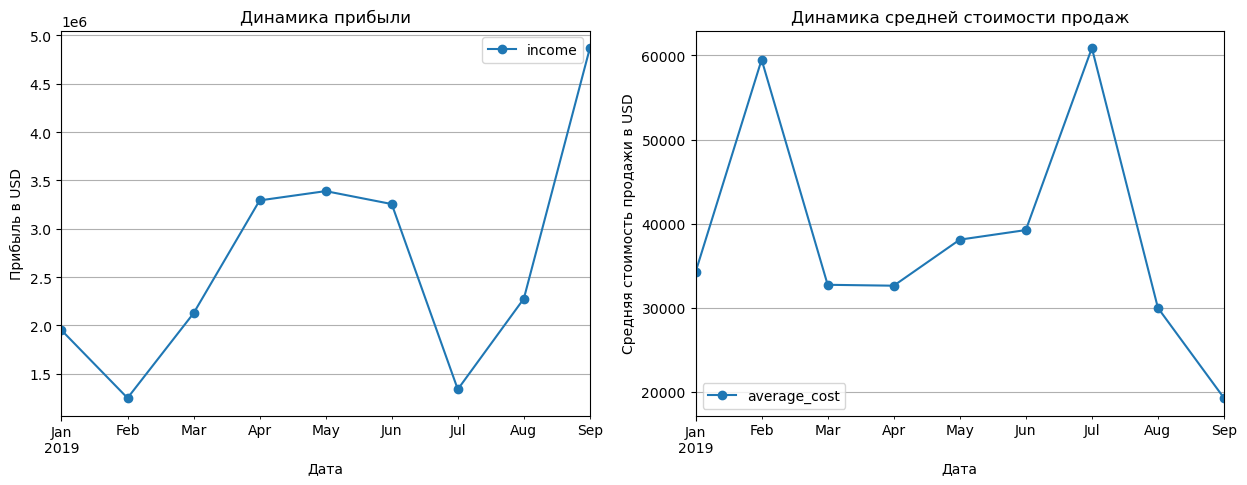

In [302]:
#создание графиков
fig,axis = plt.subplots(1,2, figsize=(15,5))
month_income.plot(y='income',grid=True, style='o-', xlabel='Дата', 
          ylabel='Прибыль в USD', title='Динамика прибыли', ax=axis[0])
month_income.plot(y='average_cost',grid=True, style='o-', xlabel='Дата', 
          ylabel='Средняя стоимость продажи в USD', title='Динамика средней стоимости продаж', ax=axis[1])
plt.show()

По данным графика мы видим, что общая прибыль компании с февраля по июнь выросла, но в июле был большой спад, после которого продажи вновь начали расти. Средняя стоимость чека в феврале упала, но до июля начала расти, после наблюдается большой спад. Все этого говорит о том, что с июля стали больше покупать машин, но не самых дорогих, поэтому общая прибыль выросла, а сумма среднего чека снизилась.

Теперь посмотрим динамику продаж по брендам в данной компании.

In [303]:
#создание сводной таблицы
month_income_brand_sum=mercur.pivot_table(index='date',columns='brand',values='sale_usd',aggfunc='sum')
month_income_brand_sum

brand,Audi,Porsche,Volkswagen
date,,,
2019-01-01,689924.1,145281.1,1116022.7
2019-02-01,858705.6,356988.1,33872.5
2019-03-01,570077.0,293340.6,1263327.7
2019-04-01,418282.4,183230.3,2692222.7
2019-05-01,189765.0,844181.2,2355988.6
2019-06-01,569892.9,788043.1,1898140.3
2019-07-01,445641.0,635913.8,257904.4
2019-08-01,667301.0,655893.8,954343.2
2019-09-01,755134.8,467400.4,3647661.2


In [304]:
#создание сводной таблицы
month_income_brand_mean=mercur.pivot_table(index='date',columns='brand',values='sale_usd',aggfunc='mean')
month_income_brand_mean

brand,Audi,Porsche,Volkswagen
date,,,
2019-01-01,45994.940000,72640.550000,27900.567500
2019-02-01,53669.100000,89247.025000,33872.500000
2019-03-01,81439.571429,97780.200000,22969.594545
2019-04-01,59754.628571,91615.150000,29263.290217
2019-05-01,47441.250000,93797.911111,30999.850000
2019-06-01,56989.290000,87560.344444,29658.442188
2019-07-01,49515.666667,90844.828571,42984.066667
2019-08-01,55608.416667,93699.114286,16742.863158
2019-09-01,53938.200000,93480.080000,15588.295726


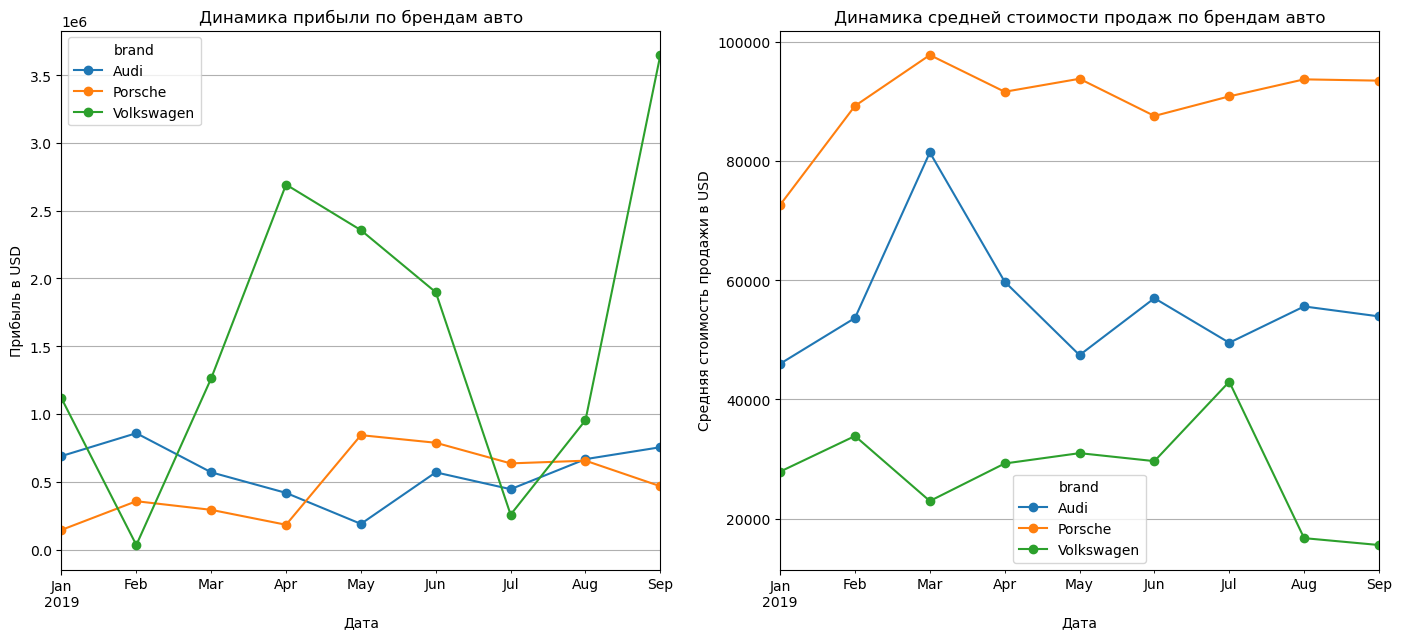

In [305]:
#создание графиков
fig,axis = plt.subplots(1,2, figsize=(17,7))
month_income_brand_sum.plot(grid=True, style='o-', xlabel='Дата', 
          ylabel='Прибыль в USD', title='Динамика прибыли по брендам авто', ax=axis[0])
month_income_brand_mean.plot(grid=True, style='o-', xlabel='Дата', 
          ylabel='Средняя стоимость продажи в USD', title='Динамика средней стоимости продаж по брендам авто', ax=axis[1])
plt.show()

По графику с прибылью по брендам видно, что каждый месяц покупают машины всех представленных брендов, но больше всего денег приносит продажи автомобилей марки Volkswagen. С февраля по апрель мы видим рост продаж по данной марке, потом до июля идет спад, а после продажи опять увеличились. 
По графику с динамикой средней стоимости продаж видно, что дороже всего марка Porcshe, потом идет Audi, а меньше всего стоят машины у Volkswagen.

### 4.2 Анализ автомобильного рынка
<a id="market"></a>

Для начала расчитаем емкость рынка в натуральном выражении

In [306]:
#расчет емкости рынка
market_volume=df['count'].sum()
print('Емкость автомобильного рынка в Казахстане в количественном выражении равна',market_volume)

Емкость автомобильного рынка в Казахстане в количественном выражении равна 35825


In [307]:
#расчет емкости рынка
market_volume_money=df['sale_usd'].sum()
print('Емкость автомобильного рынка в Казахстане в денежном выражении(USD) равна',market_volume_money)

Емкость автомобильного рынка в Казахстане в денежном выражении(USD) равна 898737449.7


Теперь посмотрим емкость сегментов рынка.

In [308]:
#создание сводной таблицы
brand_cnt=df.pivot_table(index='brand',values='count',aggfunc='sum').sort_values(by='count',ascending =False)
brand_cnt.head(10)

,count
brand,
Toyota,9374
Lada,6012
Hyundai,5702
GAZ,2111
Ravon,1725
Nissan,1558
Kia,1336
UAZ,1054
Jac,998


In [309]:
#создание сводной таблицы
class_cnt=df.pivot_table(index='class_2013',values='count',aggfunc='sum').sort_values(by='count',ascending =False)
class_cnt.head()

,count
class_2013,
j,14992
b,9265
e,3767
c,3419
грузовики,2831


Мы выяснили, что за 9 месяцев во всем Казахстане продали 35 825 машин за 898 737 449 долларов. Больше всего продали машин марки Toyota, Lada и Hyundai. Топ- 3 класса:
- J
- B
- E

### 4.3 Анализ доли рынка 
<a id="share"></a>

Сначала рассчитаем долю Меркур Авто в денежном и количественном выражении.

In [310]:
#расчет доли рынка в количественном выражении и округление результата
share=((mercur['count'].sum())/market_volume*100).round(1)
print('Доля рынка Меркур Авто в количественном выражении равна',share, '%')

Доля рынка Меркур Авто в количественном выражении равна 2.4 %


In [311]:
#расчет доли рынка в денежном выражении и округление результата
share_money=((mercur['sale_usd'].sum())/market_volume_money*100).round(1)
print('Доля рынка Меркур Авто в денежном выражении(USD) равна',share_money, '%')

Доля рынка Меркур Авто в денежном выражении(USD) равна 2.6 %


Теперь расчитаем долю рынка дилера по маркам и классу автомобилей.

In [312]:
#создание сводной таблицы для расчета доли марок авто
share_brand=mercur.pivot_table(index='brand',values='count',aggfunc='sum').sort_values(by='count',ascending=False)
share_brand['share_%']=share_brand['count']/brand_cnt['count']*100
share_brand

,count,share_%
brand,,
Volkswagen,721,100.0
Audi,97,100.0
Porsche,48,100.0


In [313]:
#содание сводной таблицы для расчета доли класса авто
share_class=mercur.pivot_table(index='class_2013',values='count',aggfunc='sum')
share_class['share_%']=(share_class['count']/class_cnt['count']*100).round(1)
share_class=share_class.sort_values(by='share_%',ascending=False)
share_class

,count,share_%
class_2013,,
s,2,66.7
f,6,23.1
d,14,11.5
b,524,5.7
m,12,3.6
c,81,2.4
e,51,1.4
j,169,1.1
pick-ups,7,0.9


Данный анализ показал, что Меркур Авто занимает 2.4% во всем авторынке Казахстана по количеству проданных машин и 2.6% по прибыли от продажи машин. При этом Меркур Авто является единственным продавцом машин марки Volkswagen, Audi, Porsche. 
По классу автомобилей Меркур Авто занимает 66.7% по продаже спортивных автомобилей, 23% по продаже представительских автомобилей и 11.5% по продаже полноразмерных автомобилей. 

### 4.4 Анализ конкурентов
<a id="com"></a>

Изучим, какие есть лидеры рынка

In [314]:
#вывод компаний лидеров в денежном выражении
company.head(10)

,sale_usd
company,
Toyota Motor Kazakhstan,419556889.2
Astana Motors,126503610.6
БИПЭК АВТО,107896638.5
Вираж,58116993.5
Nissan Manufacturing RUS,39188796.1
Mercur Auto,23754479.5
Allur Auto,23478314.9
Subaru Kazakhstan,17311554.3
УзАвто-Казахстан,17130340.7


In [315]:
#создание сводной таблицы
company=df.pivot_table(index='company',values='count',aggfunc='sum').sort_values(by='count',ascending=False)
company.head(10)

,count
company,
Toyota Motor Kazakhstan,10014
БИПЭК АВТО,8349
Astana Motors,5743
Вираж,3358
УзАвто-Казахстан,1725
Nissan Manufacturing RUS,1620
Allur Auto,1259
Mercur Auto,866
Лифан Моторс Рус,566


В количественном и денежном выражении топ-3 лидера рынка в Казахстане:
- Toyota Motor Kazakhstan
- БИПЭК АВТО
- Astana Motors

#### 4.4.1 Ближайшие конкуренты Меркур авто по региону
<a id="regi"></a>

Из проделанного анализа мы уже знаем, что Меркур Авто является единственным продавцом Audi,Volkswagen и Porsche, поэтому проанализируем какие есть конкуренты по регионам.

In [316]:
#вывод уникальных значений регионов
mercur['region'].unique()

array(['Алматы', 'Костанай', 'Атырау', 'Астана', 'Актобе', 'Караганда',
       'Уральск'], dtype=object)

Меркур Авто находится в 7 регионах, поэтому проанализируем конкурентов в каждом регионе.

In [317]:
#делаем срез данных по региону и строим сводную таблицу
almati=df.query('region =="Алматы"')
almati_top=almati.pivot_table(index='company',values=['count','sale_usd'],aggfunc='sum').sort_values(by='count',ascending=False)
almati_top=almati_top.query('count > 457')
almati_top.head(10)

,count,sale_usd
company,,
Toyota Motor Kazakhstan,3484,145132184.1
Astana Motors,1815,39420049.7
БИПЭК АВТО,862,13289311.9
Nissan Manufacturing RUS,619,15768475.3
Вираж,570,9971554.4


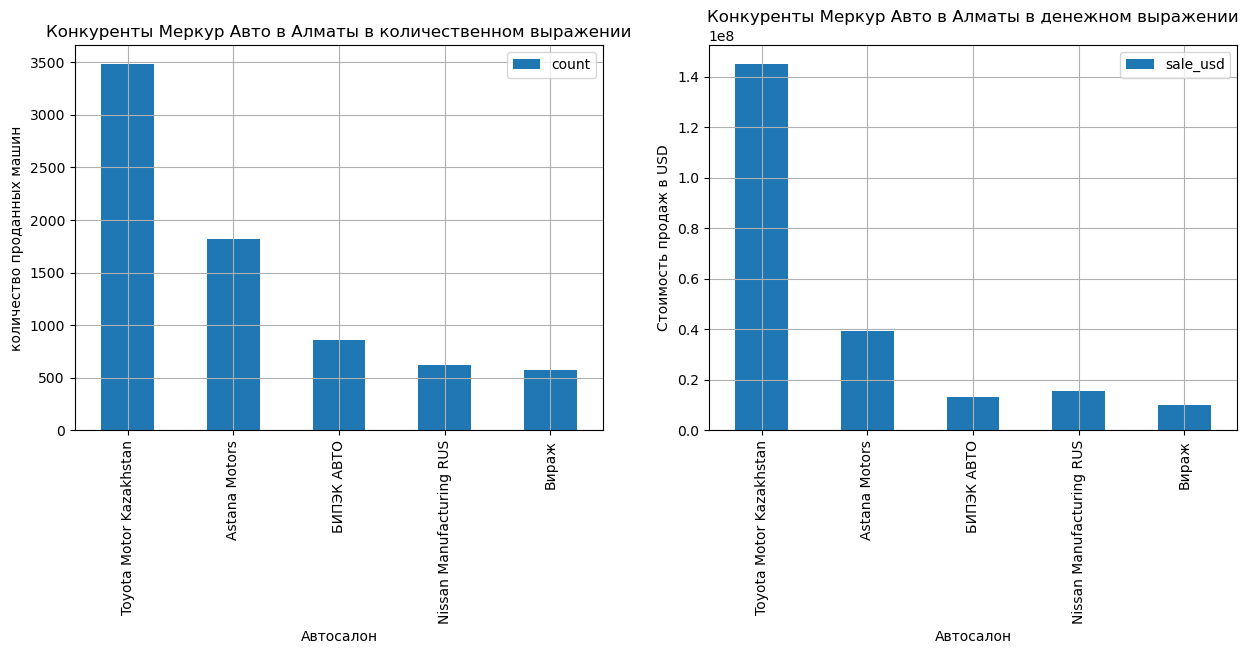

In [318]:
#создание графиков
fig,axis = plt.subplots(1,2, figsize=(15,5))
almati_top.plot(y='count',grid=True, kind='bar', xlabel='Автосалон', 
          ylabel='количество проданных машин', title='Конкуренты Меркур Авто в Алматы в количественном выражении', ax=axis[0])
almati_top.plot(y='sale_usd',grid=True, kind='bar', xlabel='Автосалон', 
          ylabel='Стоимость продаж в USD', title='Конкуренты Меркур Авто в Алматы в денежном выражении', ax=axis[1])
plt.show()

В Алматы дилер имеет 5 конкурентов. В количественном и денежном выражении они опережают Меркур Авто.
Посмотрим какие бренды авто продают эти конкуренты.

In [319]:
#делаем срез данных по компаниями, а затем создаем сводную таблицу 
almati_brand=almati.query('company ==["Toyota Motor Kazakhstan" ,"Astana Motors","БИПЭК АВТО","Nissan Manufacturing RUS","Вираж"]')
almati_brand_top=(almati_brand.pivot_table(index='brand',values=['count','sale_usd'],aggfunc='sum')
                  .sort_values(by='count',ascending=False))
almati_brand_top=almati_brand_top.query('count >338')
almati_brand_top

,count,sale_usd
brand,,
Toyota,3247,131424051.3
Hyundai,1787,38321442.7
Nissan,572,12977539.7
Lada,457,4826800.0
GAZ,339,6404970.8


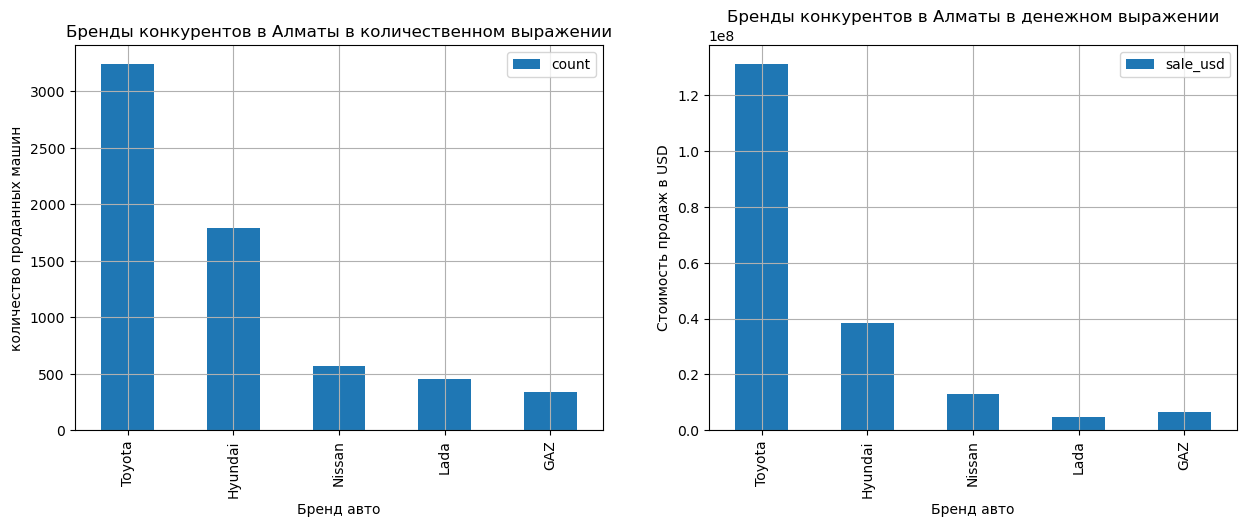

In [320]:
#создание графиков
fig,axis = plt.subplots(1,2, figsize=(15,5))
almati_brand_top.plot(y='count',grid=True, kind='bar', xlabel='Бренд авто', 
          ylabel='количество проданных машин', title='Бренды конкурентов в Алматы в количественном выражении', ax=axis[0])
almati_brand_top.plot(y='sale_usd',grid=True, kind='bar', xlabel='Бренд авто', 
          ylabel='Стоимость продаж в USD', title='Бренды конкурентов в Алматы в денежном выражении', ax=axis[1])
plt.show()

По данным графикам видно, что в Алмате чаще всего приобретают машины марки :
- Toyota
- Hyundai
- Nissan
- Lada
- GAZ	

In [321]:
#делаем срез данных по региону и строим сводную таблицу
kost=df.query('region =="Костанай"')
kost_top=kost.pivot_table(index='company',values=['count','sale_usd'],aggfunc='sum').sort_values(by='count',ascending=False)
kost_top=kost_top.query('count >90')
kost_top

,count,sale_usd
company,,
БИПЭК АВТО,517,6366864.7
Toyota Motor Kazakhstan,387,17077288.1
Astana Motors,302,6766967.7
УзАвто-Казахстан,206,2045313.7
Вираж,202,3469393.5
Allur Auto,196,3476455.2
Nissan Manufacturing RUS,105,2476534.3
Лифан Моторс Рус,99,1387878.0


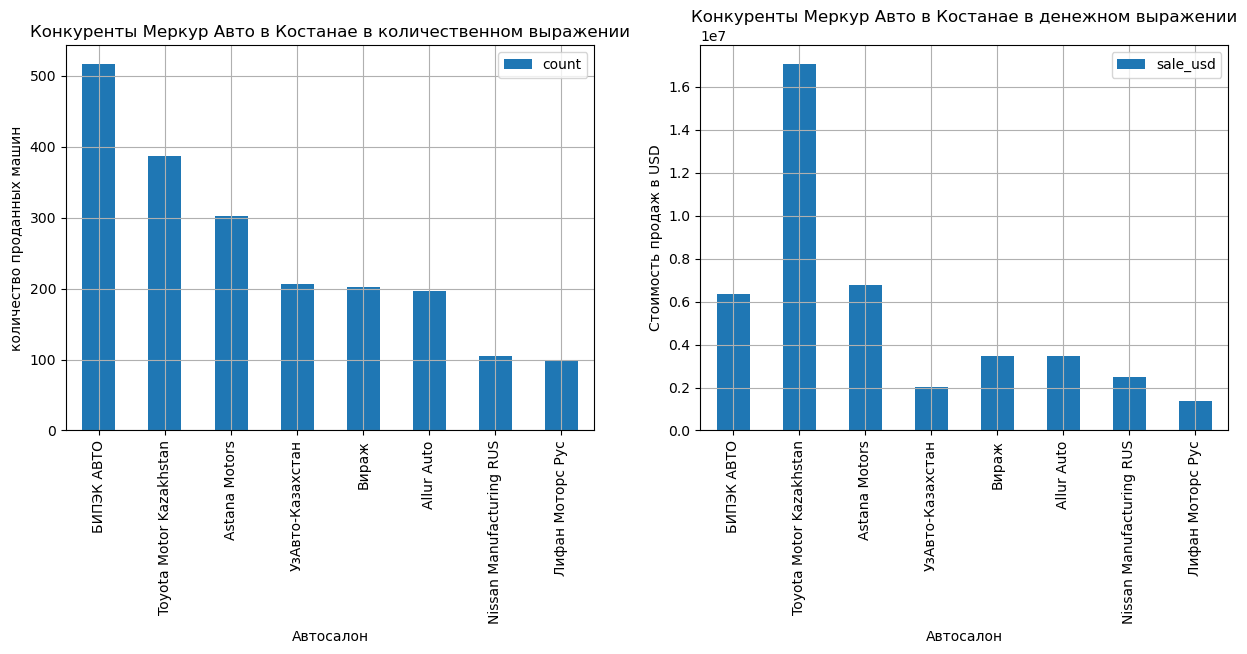

In [322]:
#создание графиков
fig,axis = plt.subplots(1,2, figsize=(15,5))
kost_top.plot(y='count',grid=True, kind='bar', xlabel='Автосалон', 
          ylabel='количество проданных машин', title='Конкуренты Меркур Авто в Костанае в количественном выражении', ax=axis[0])
kost_top.plot(y='sale_usd',grid=True, kind='bar', xlabel='Автосалон', 
          ylabel='Стоимость продаж в USD', title='Конкуренты Меркур Авто в Костанае в денежном выражении', ax=axis[1])
plt.show()

В Костанае 8 конкурентов, опережающих Меркур Авто по продажам:
- БИПЭК АВТО	
- Toyota Motor Kazakhstan
- Astana Motors
- УзАвто-Казахстан
- Вираж
- Allur Auto
- Nissan Manufacturing RUS
- Лифан Моторс Рус	

Теперь посмотрим какие марки чаще всего продаются в этом регионе.

In [323]:
#делаем срез данных по компаниями, а затем создаем сводную таблицу 
kost_brand=kost.query('company ==["Toyota Motor Kazakhstan" ,"Astana Motors","БИПЭК АВТО","Nissan Manufacturing RUS","Вираж","УзАвто-Казахстан","Allur Auto","Лифан Моторс Рус"]')
kost_brand_top=(kost_brand.pivot_table(index='brand',values=['count','sale_usd'],aggfunc='sum')
                  .sort_values(by='count',ascending=False))
kost_brand_top=kost_brand_top.query('count >165')
kost_brand_top

,count,sale_usd
brand,,
Lada,406,4270700.0
Toyota,379,16624824.1
Hyundai,302,6766967.7
Ravon,206,2045313.7
Jac,166,2357166.2


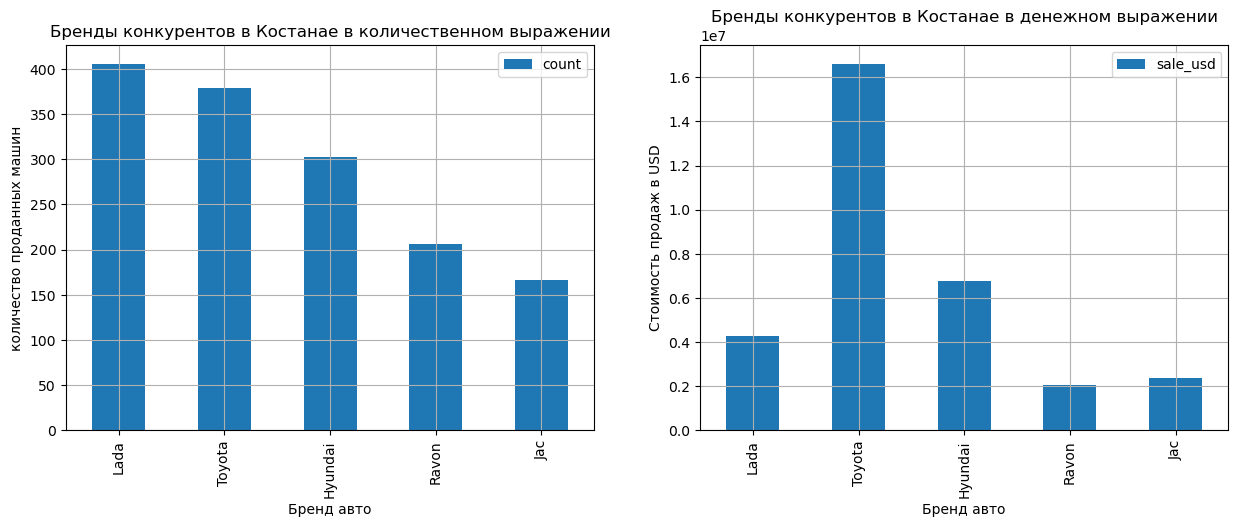

In [324]:
#создание графиков
fig,axis = plt.subplots(1,2, figsize=(15,5))
kost_brand_top.plot(y='count',grid=True, kind='bar', xlabel='Бренд авто', 
          ylabel='количество проданных машин', title='Бренды конкурентов в Костанае в количественном выражении', ax=axis[0])
kost_brand_top.plot(y='sale_usd',grid=True, kind='bar', xlabel='Бренд авто', 
          ylabel='Стоимость продаж в USD', title='Бренды конкурентов в Костанае в денежном выражении', ax=axis[1])
plt.show()

По графикам видно, что чаще всего в Костанае приобретают :
- Lada
- Toyota
- Hyundai
- Ravon
- Jac.

In [325]:
#делаем срез данных по региону и строим сводную таблицу
at=df.query('region =="Атырау"')
at_top=at.pivot_table(index='company',values=['count','sale_usd'],aggfunc='sum').sort_values(by='count',ascending=False)
at_top=at_top.query('count >110')
at_top

,count,sale_usd
company,,
БИПЭК АВТО,595,7723729.4
Toyota Motor Kazakhstan,576,23665752.6
Вираж,354,6251111.0
Astana Motors,286,6451983.7
УзАвто-Казахстан,180,1755544.8


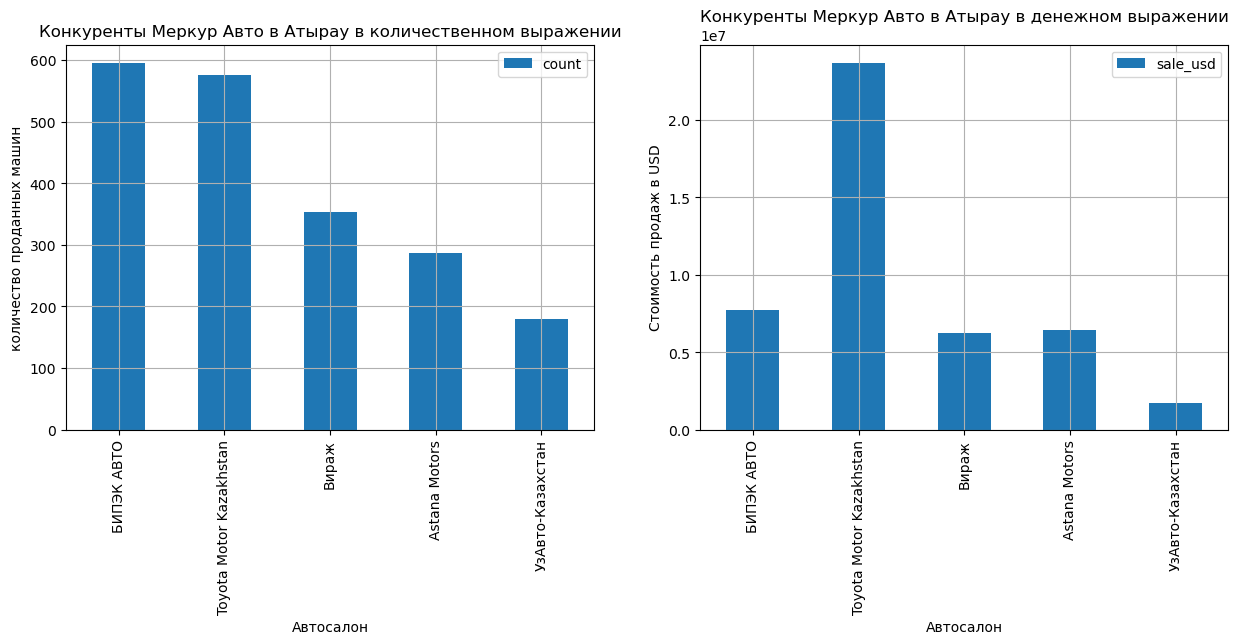

In [326]:
#создание графиков
fig,axis = plt.subplots(1,2, figsize=(15,5))
at_top.plot(y='count',grid=True, kind='bar', xlabel='Автосалон', 
          ylabel='количество проданных машин', title='Конкуренты Меркур Авто в Атырау в количественном выражении', ax=axis[0])
at_top.plot(y='sale_usd',grid=True, kind='bar', xlabel='Автосалон', 
          ylabel='Стоимость продаж в USD', title='Конкуренты Меркур Авто в Атырау в денежном выражении', ax=axis[1])
plt.show()

В Атырау 5 компаний конкурентов с большими продажами за весь период и это:
- БИПЭК АВТО	
- Toyota Motor Kazakhstan
- Вираж
- Astana Motors
- УзАвто-Казахстан

In [327]:
#делаем срез данных по компаниями, а затем создаем сводную таблицу 
at_brand=kost.query('company ==["Toyota Motor Kazakhstan" ,"Astana Motors","БИПЭК АВТО","Вираж","УзАвто-Казахстан"]')
at_brand_top=(at_brand.pivot_table(index='brand',values=['count','sale_usd'],aggfunc='sum')
                  .sort_values(by='count',ascending=False))
at_brand_top=kost_brand_top.query('count >104')
at_brand_top

,count,sale_usd
brand,,
Lada,406,4270700.0
Toyota,379,16624824.1
Hyundai,302,6766967.7
Ravon,206,2045313.7
Jac,166,2357166.2


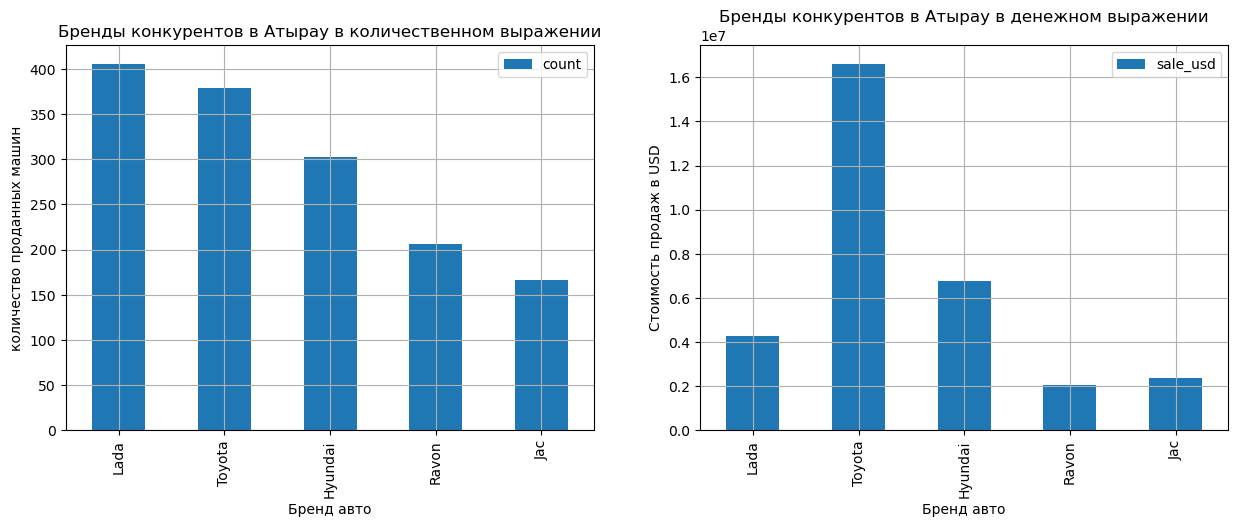

In [328]:
#создание графиков
fig,axis = plt.subplots(1,2, figsize=(15,5))
at_brand_top.plot(y='count',grid=True, kind='bar', xlabel='Бренд авто', 
          ylabel='количество проданных машин', title='Бренды конкурентов в Атырау в количественном выражении', ax=axis[0])
at_brand_top.plot(y='sale_usd',grid=True, kind='bar', xlabel='Бренд авто', 
          ylabel='Стоимость продаж в USD', title='Бренды конкурентов в Атырау в денежном выражении', ax=axis[1])
plt.show()

В Атырау чаще всего приобретают машины марки:
- Lada
- Toyota
- Hyundai
- Ravon
- Jac

In [329]:
#делаем срез данных по региону и строим сводную таблицу
astana=df.query('region =="Астана"')
astana_top=astana.pivot_table(index='company',values=['count','sale_usd'],aggfunc='sum').sort_values(by='count',ascending=False)
astana_top=astana_top.query('count > 92')
astana_top

,count,sale_usd
company,,
Toyota Motor Kazakhstan,2624,107577643.5
Astana Motors,1476,32910816.4
БИПЭК АВТО,1080,15510588.3
Allur Auto,407,10584193.9
Вираж,396,6799444.2
Nissan Manufacturing RUS,302,7383532.9
Subaru Kazakhstan,127,4313352.6
Лифан Моторс Рус,119,1632665.7
MMC RUS,107,3773440.4


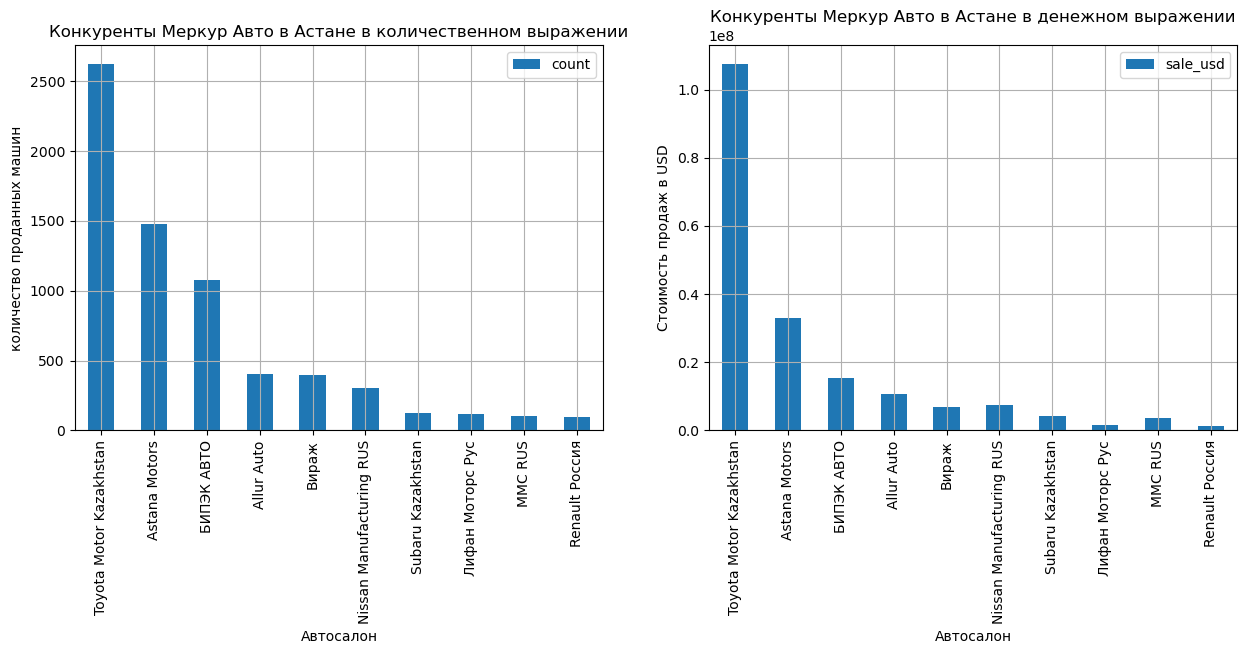

In [330]:
#создание графиков
fig,axis = plt.subplots(1,2, figsize=(15,5))
astana_top.plot(y='count',grid=True, kind='bar', xlabel='Автосалон', 
          ylabel='количество проданных машин', title='Конкуренты Меркур Авто в Астане в количественном выражении', ax=axis[0])
astana_top.plot(y='sale_usd',grid=True, kind='bar', xlabel='Автосалон', 
          ylabel='Стоимость продаж в USD', title='Конкуренты Меркур Авто в Астане в денежном выражении', ax=axis[1])
plt.show()

В Астане 10 конкурентов, чьи продажи превышают Меркур Авто:
- Toyota Motor Kazakhstan
- Astana Motors
- БИПЭК АВТО
- Allur Auto
- Вираж
- Nissan Manufacturing RUS	
- Subaru Kazakhstan
- Лифан Моторс Рус
- MMC RUS
- Renault Россия

In [331]:
#делаем срез данных по компаниями, а затем создаем сводную таблицу 
astana_brand=astana.query('company ==["Toyota Motor Kazakhstan" ,"Astana Motors","БИПЭК АВТО","Nissan Manufacturing RUS","Вираж","Subaru Kazakhstan","Allur Auto","Лифан Моторс Рус","MMC RUS","Renault Россия"]')
astana_brand_top=(astana_brand.pivot_table(index='brand',values=['count','sale_usd'],aggfunc='sum')
                  .sort_values(by='count',ascending=False))
astana_brand_top=astana_brand_top.query('count >285')
astana_brand_top

,count,sale_usd
brand,,
Toyota,2359,93425442.0
Hyundai,1472,32753027.6
Lada,632,6547000.0
Kia,301,6015400.0
Nissan,287,6618946.0


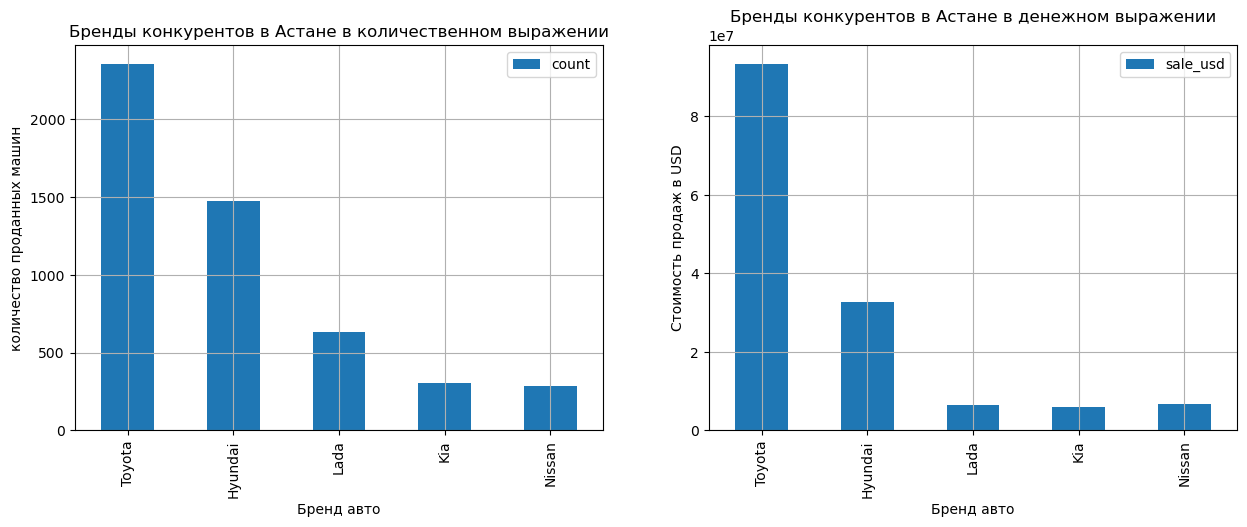

In [332]:
#создание графиков
fig,axis = plt.subplots(1,2, figsize=(15,5))
astana_brand_top.plot(y='count',grid=True, kind='bar', xlabel='Бренд авто', 
          ylabel='количество проданных машин', title='Бренды конкурентов в Астане в количественном выражении', ax=axis[0])
astana_brand_top.plot(y='sale_usd',grid=True, kind='bar', xlabel='Бренд авто', 
          ylabel='Стоимость продаж в USD', title='Бренды конкурентов в Астане в денежном выражении', ax=axis[1])
plt.show()

В Астане чаще всего приобретают автомобили марки:
- Toyota
- Hyundai	
- Lada
- Kia
- Nissan

In [333]:
#делаем срез данных по региону и строим сводную таблицу
actob=df.query('region =="Актобе"')
actob_top=actob.pivot_table(index='company',values=['count','sale_usd'],aggfunc='sum').sort_values(by='count',ascending=False)
actob_top=actob_top.query('count >1')
actob_top

,count,sale_usd
company,,
БИПЭК АВТО,488,5588576.5
Toyota Motor Kazakhstan,324,14027370.0
Вираж,176,3076936.5
Astana Motors,141,3114588.0
Nissan Manufacturing RUS,88,1940343.7
УзАвто-Казахстан,80,798431.4
Subaru Kazakhstan,30,951108.7
Allur Auto,27,387942.7
MMC RUS,17,576527.4


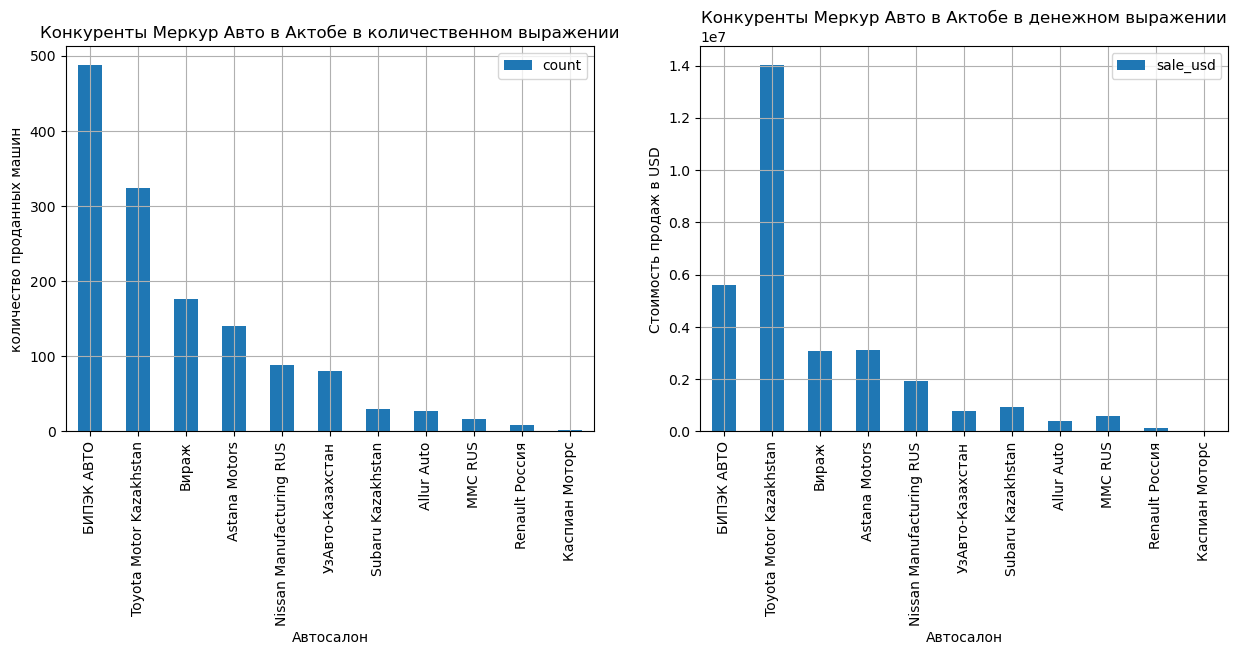

In [334]:
#создание графиков
fig,axis = plt.subplots(1,2, figsize=(15,5))
actob_top.plot(y='count',grid=True, kind='bar', xlabel='Автосалон', 
          ylabel='количество проданных машин', title='Конкуренты Меркур Авто в Актобе в количественном выражении', ax=axis[0])
actob_top.plot(y='sale_usd',grid=True, kind='bar', xlabel='Автосалон', 
          ylabel='Стоимость продаж в USD', title='Конкуренты Меркур Авто в Актобе в денежном выражении', ax=axis[1])
plt.show()

В Актобе у Меркур Авто 11 конкурентов по продажам:
- БИПЭК АВТО
- Toyota Motor Kazakhstan
- Вираж	
- Astana Motors
- Nissan Manufacturing RUS
- УзАвто-Казахстан
- Subaru Kazakhstan
- Allur Auto	
- MMC RUS
- Renault Россия
- Каспиан Моторс

In [335]:
#затем создаем сводную таблицу 
actob_brand_top=(actob.pivot_table(index='brand',values=['count','sale_usd'],aggfunc='sum')
                  .sort_values(by='count',ascending=False))
actob_brand_top=actob_brand_top.query('count >87')
actob_brand_top

,count,sale_usd
brand,,
Lada,374,3680500.0
Toyota,297,12531386.7
Hyundai,141,3114588.0
GAZ,133,2473738.8
Nissan,88,1940343.7


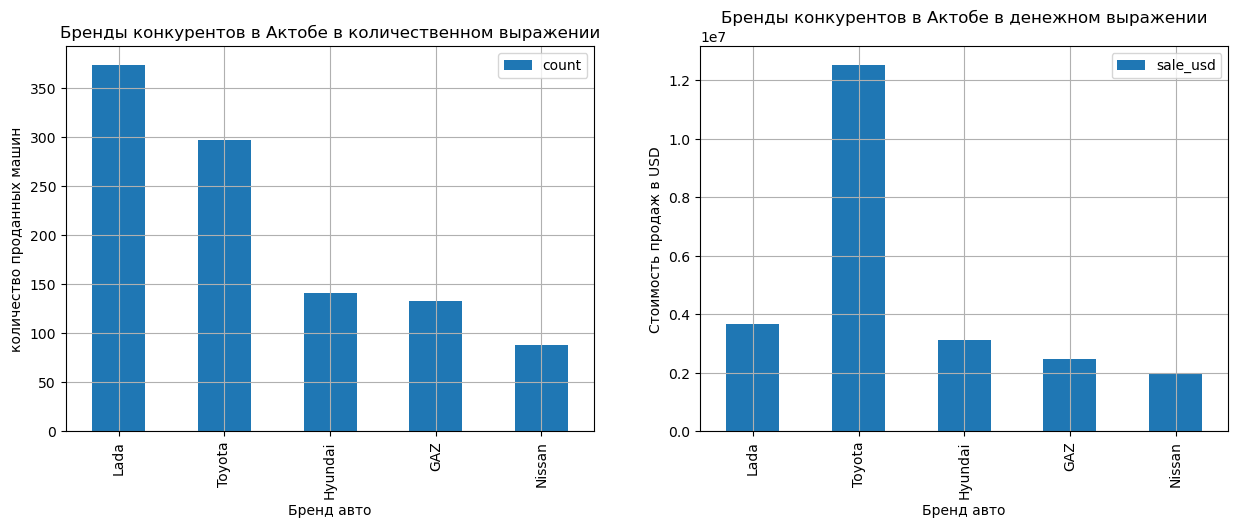

In [336]:
#создание графиков
fig,axis = plt.subplots(1,2, figsize=(15,5))
actob_brand_top.plot(y='count',grid=True, kind='bar', xlabel='Бренд авто', 
          ylabel='количество проданных машин', title='Бренды конкурентов в Актобе в количественном выражении', ax=axis[0])
actob_brand_top.plot(y='sale_usd',grid=True, kind='bar', xlabel='Бренд авто', 
          ylabel='Стоимость продаж в USD', title='Бренды конкурентов в Актобе в денежном выражении', ax=axis[1])
plt.show()

В Актобе чаще всего приобретают машины марки:
- Lada
- Toyota
- Hyundai
- GAZ
- Nissan

In [337]:
#делаем срез данных по региону и строим сводную таблицу
karag=df.query('region == "Караганда"')
karag_top=karag.pivot_table(index='company',values=['count','sale_usd'],aggfunc='sum').sort_values(by='count',ascending=False)
karag_top=karag_top.query('count > 83')
karag_top

,count,sale_usd
company,,
БИПЭК АВТО,510,6301776.4
Toyota Motor Kazakhstan,400,17401390.9
Вираж,247,4300369.8
Astana Motors,223,5017392.6
Nissan Manufacturing RUS,163,3494143.3
Renault Россия,98,1299644.2


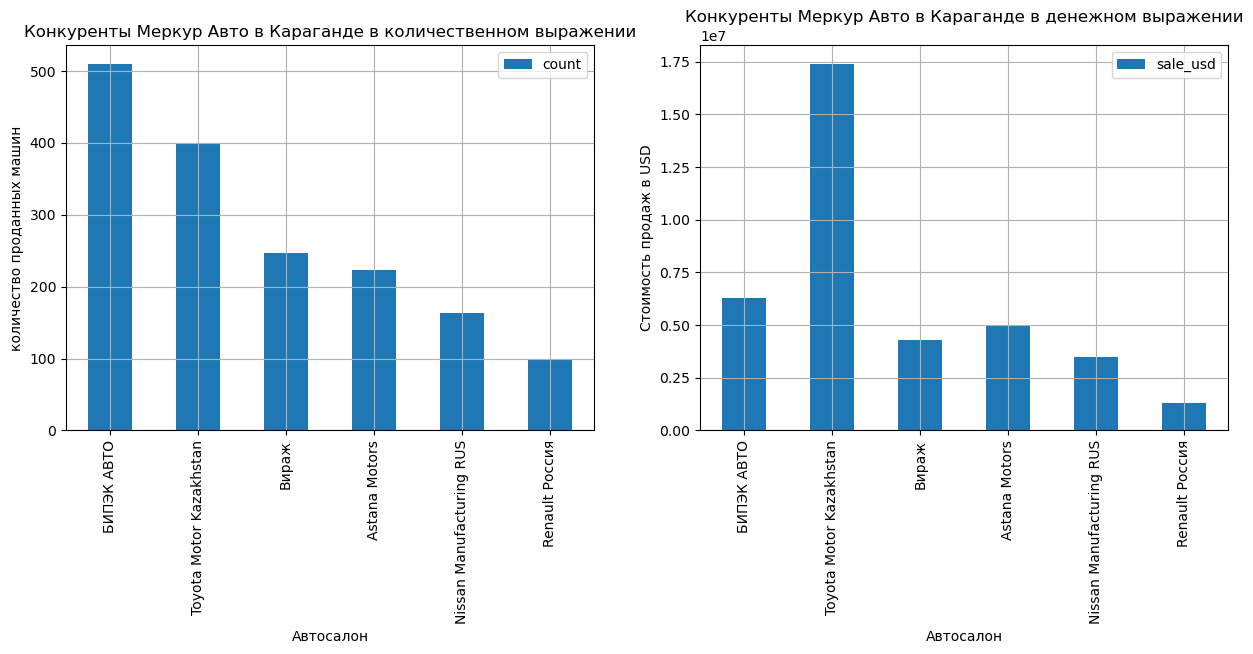

In [338]:
#создание графиков
fig,axis = plt.subplots(1,2, figsize=(15,5))
karag_top.plot(y='count',grid=True, kind='bar', xlabel='Автосалон', ylabel='количество проданных машин', 
               title='Конкуренты Меркур Авто в Караганде в количественном выражении', ax=axis[0])
karag_top.plot(y='sale_usd',grid=True, kind='bar', xlabel='Автосалон', 
          ylabel='Стоимость продаж в USD', title='Конкуренты Меркур Авто в Караганде в денежном выражении', ax=axis[1])
plt.show()

В Караганде 6 конкурентов:
- БИПЭК АВТО
- Toyota Motor Kazakhstan
- Вираж
- Astana Motors	
- Nissan Manufacturing RUS
- Renault Россия

In [339]:
#делаем срез данных по компаниями, а затем создаем сводную таблицу 
karag_brand=karag.query('company ==["Toyota Motor Kazakhstan" ,"Astana Motors","БИПЭК АВТО","Nissan Manufacturing RUS","Вираж","Renault Россия"]')
karag_brand_top=(karag_brand.pivot_table(index='brand',values=['count','sale_usd'],aggfunc='sum')
                  .sort_values(by='count',ascending=False))
karag_brand_top=karag_brand_top.query('count >157')
karag_brand_top

,count,sale_usd
brand,,
Lada,385,3990400.0
Toyota,381,16271469.3
Hyundai,222,4977423.5
Nissan,163,3494143.3
GAZ,158,3001385.7


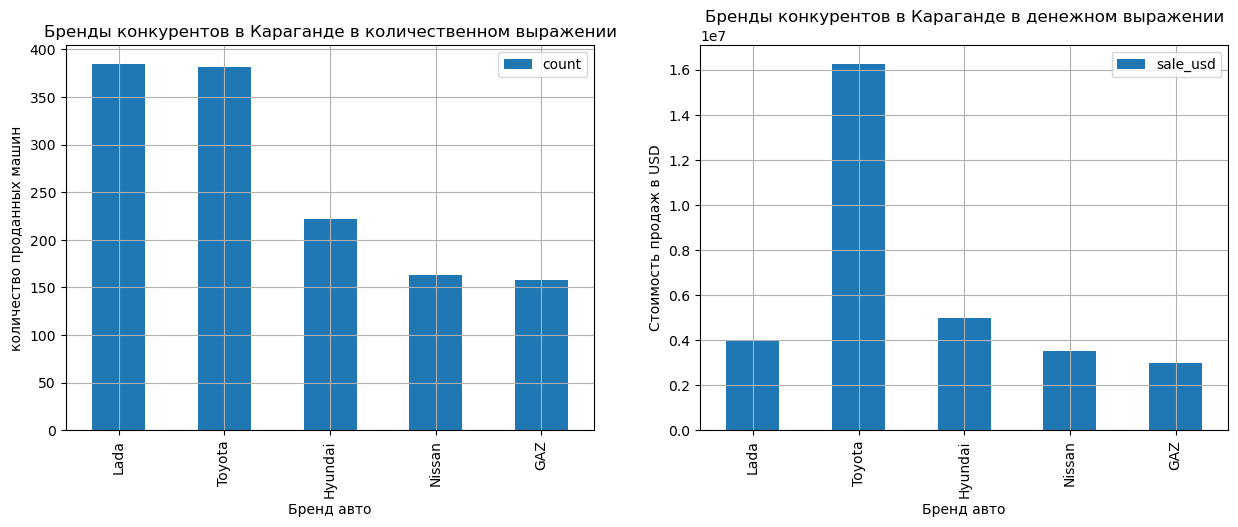

In [340]:
#создание графиков
fig,axis = plt.subplots(1,2, figsize=(15,5))
karag_brand_top.plot(y='count',grid=True, kind='bar', xlabel='Бренд авто', 
          ylabel='количество проданных машин', title='Бренды конкурентов в Караганде в количественном выражении', ax=axis[0])
karag_brand_top.plot(y='sale_usd',grid=True, kind='bar', xlabel='Бренд авто', 
          ylabel='Стоимость продаж в USD', title='Бренды конкурентов в Караганде в денежном выражении', ax=axis[1])
plt.show()

В Караганде чаще всего приобретают машины марки:
- Lada	
- Toyota
- Hyundai	
- Nissan
- GAZ	

In [341]:
#делаем срез данных по региону и строим сводную таблицу
ural=df.query('region == "Уральск"')
ural_top=ural.pivot_table(index='company',values=['count','sale_usd'],aggfunc='sum').sort_values(by='count',ascending=False)
ural_top=ural_top.query('count >33')
ural_top

,count,sale_usd
company,,
БИПЭК АВТО,522,6332068.3
Toyota Motor Kazakhstan,302,12447136.1
Вираж,205,3574596.8
Astana Motors,199,4600784.7
Renault Россия,119,1531598.5
Nissan Manufacturing RUS,40,1007630.8
УзАвто-Казахстан,37,358459.6


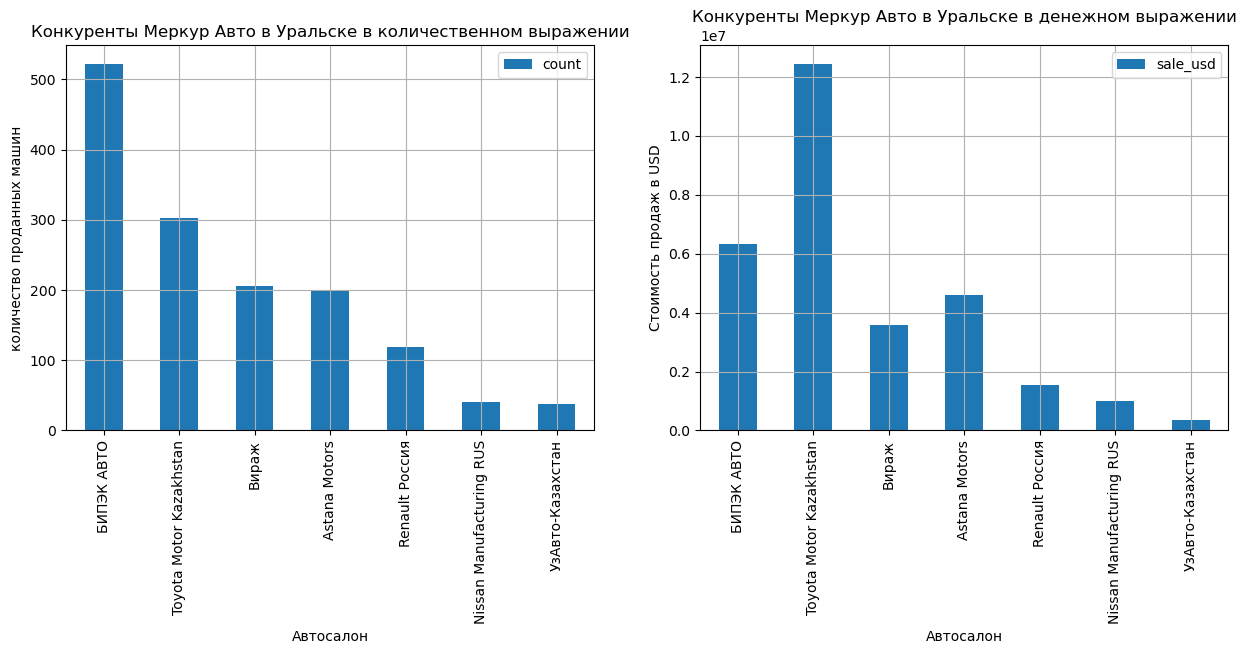

In [342]:
#создание графиков
fig,axis = plt.subplots(1,2, figsize=(15,5))
ural_top.plot(y='count',grid=True, kind='bar', xlabel='Автосалон', 
          ylabel='количество проданных машин', title='Конкуренты Меркур Авто в Уральске в количественном выражении', ax=axis[0])
ural_top.plot(y='sale_usd',grid=True, kind='bar', xlabel='Автосалон', 
          ylabel='Стоимость продаж в USD', title='Конкуренты Меркур Авто в Уральске в денежном выражении', ax=axis[1])
plt.show()

В Уральске 7 конкурентов:
- БИПЭК АВТО
- Toyota Motor Kazakhstan
- Вираж
- Astana Motors
- Renault Россия
- Nissan Manufacturing RUS
- УзАвто-Казахстан

In [343]:
#делаем срез данных по компаниями, а затем создаем сводную таблицу 
ural_brand=ural.query('company ==["Toyota Motor Kazakhstan" ,"Astana Motors","БИПЭК АВТО","Nissan Manufacturing RUS","Вираж","УзАвто-Казахстан","Renault Россия	"]')
ural_brand_top=(ural_brand.pivot_table(index='brand',values=['count','sale_usd'],aggfunc='sum')
                  .sort_values(by='count',ascending=False))
ural_brand_top=ural_brand_top.query('count >65')
ural_brand_top

,count,sale_usd
brand,,
Lada,414,4062715.5
Toyota,295,12059258.8
Hyundai,197,4521520.9
GAZ,143,2728230.9
Kia,66,1465700.0


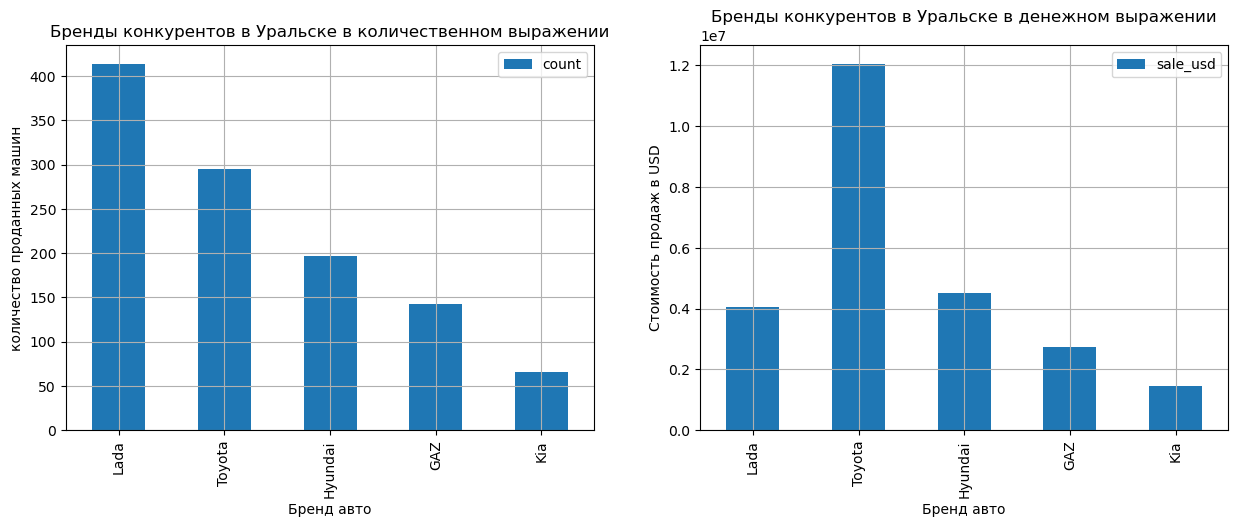

In [344]:
#создание графиков
fig,axis = plt.subplots(1,2, figsize=(15,5))
ural_brand_top.plot(y='count',grid=True, kind='bar', xlabel='Бренд авто', 
          ylabel='количество проданных машин', title='Бренды конкурентов в Уральске в количественном выражении', ax=axis[0])
ural_brand_top.plot(y='sale_usd',grid=True, kind='bar', xlabel='Бренд авто', 
          ylabel='Стоимость продаж в USD', title='Бренды конкурентов в Уральске в денежном выражении', ax=axis[1])
plt.show()

Часто продаваемы марки автомобилей в Уральске:
- Lada
- Toyota
- Hyundai
- GAZ
- Kia	

По всем регионам, где есть магазины Меркур Авто, можно выделить 5 главных конкурентов по продажам:
- Тoyota Motor Kazakhstan 
- Astana Motors
- БИПЭК АВТО
- Nissan Manufacturing RUS
- Вираж

А чаще всего приобретают машины марки :
- Lada
- Toyota
- Hyundai

#### 4.4.2 Ближайшие конкуренты Меркур авто по классу автомобиля
<a id="cl"></a>

In [345]:
#вывод уникальных значений класса
mercur['class_2013'].unique()

['c', 'd', 's', 'e', 'j', 'f', 'pick-ups', 'm', 'b']
Categories (12, object): ['a', 'b', 'c', 'd', ..., 'pick-ups', 's', 'автобусы', 'грузовики']

In [346]:
#делаем срез данных по главным конкурентам 
rival=df.query('company == ["Toyota Motor Kazakhstan" ,"Astana Motors","БИПЭК АВТО","Nissan Manufacturing RUS","Вираж","Mercur Auto"]')

In [347]:
#делаем срез данных по классам, которые представлены в Меркур Авто
rival_class=rival.query('class_2013 ==["c", "d", "s", "e", "j", "f", "pick-ups", "m", "b"]')
rival_class.head()

,company,brand,model,year_manufact,country_manufact,type_fuel,engine_capacity_l,transmis,type_drive,region,count,price_usd,sale_usd,segment_2013,class_2013,date
0,Mercur Auto,Audi,A3,2018-01-01,DEU,бензин,1.4,robot,FWD,Алматы,1,30581.0,30581.0,Легковые автомобили,c,2019-05-01
1,Mercur Auto,Audi,A3,2018-01-01,DEU,бензин,1.4,robot,FWD,Алматы,1,35087.7,35087.7,Легковые автомобили,c,2019-06-01
2,Mercur Auto,Audi,A3,2017-01-01,DEU,бензин,1.4,robot,FWD,Алматы,1,26608.2,26608.2,Легковые автомобили,c,2019-07-01
3,Mercur Auto,Audi,A4,2017-01-01,DEU,бензин,2.0,robot,4WD,Алматы,1,48344.0,48344.0,Легковые автомобили,d,2019-07-01
4,Mercur Auto,Audi,A5,2017-01-01,DEU,бензин,2.0,robot,4WD,Алматы,1,52760.7,52760.7,Легковые автомобили,s,2019-06-01


In [348]:
#создаем сводную таблицу и убираем лишние строки
rival_class_company=rival_class.pivot_table(index='class_2013',columns='company',values='count',aggfunc='sum')
rival_class_company=rival_class_company.drop(labels = ['a','автобусы','грузовики'],axis = 0)
rival_class_company

company,Astana Motors,Mercur Auto,Nissan Manufacturing RUS,Toyota Motor Kazakhstan,БИПЭК АВТО,Вираж
class_2013,,,,,,
b,1332,524,0,0,5517,0
c,1152,81,374,1103,398,0
d,0,14,16,0,31,0
e,22,51,0,3499,100,0
f,0,6,0,1,2,0
j,3188,169,1230,4658,1993,751
m,8,12,0,37,34,170
pick-ups,0,7,0,716,31,39
s,0,2,0,0,0,0


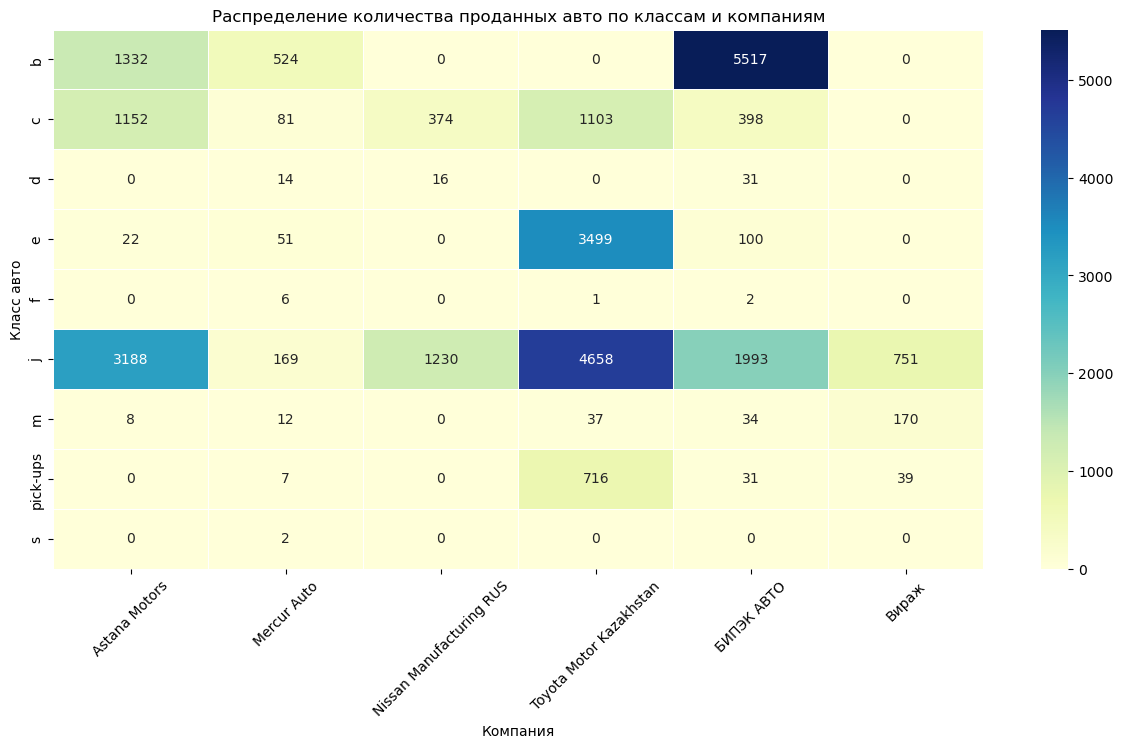

In [349]:
#делаем хитмэп карту по количеству проданных авто по классам и компаниям
plt.figure(figsize=(15,7))
sns.heatmap(rival_class_company, cmap='YlGnBu',annot=True, fmt='d', linewidths=0.5)
plt.title('Распределение количества проданных авто по классам и компаниям')
plt.xlabel('Компания')
plt.ylabel('Класс авто')
plt.xticks(rotation=45)
plt.show()

По данному графику видно, что Меркур Авто уступает своим конкурентам по всем классам, кроме класса S и F. При этом чаще всего продаются машины класса B, а Меркур Авто среди своих главных конкурентов на третьем месте по количеству продаж машин данного класса. Хорошо продаваемый класс J у всех компаний, но Меркур Авто уступает всем своим конкурентам по количеству продаж машин данного класса.

В данном разделе мы проанализировали продажи Меркур Авто и его конкурентов. 

Было выявлено, что за весь период в Казахстане было продано 35 825 машин за 898 737 449 долларов. Чаще всего покупали машины марки Lada, Toyota и Hyundai в автоцентрах Тoyota Motor Kazakhstan, Astana Motors, БИПЭК АВТО, Nissan Manufacturing RUS и Вираж, которые являются главными конкурентами Меркур Авто во всех регионах.

Автоцентр Меркур Авто за весь период продал 866 машин за 23 754 479 долларов со средним чеком в 30 971 долларов. Это значит, что доля рынка дилера занимает 2.4% по количеству проданных машин и 2.6% по прибыли от продаж. Эта компания является единственным продавцом машин марки Volkswagen, Audi и Porsche.

Общая прибыль компании с февраля по июнь выросла, но в июле был большой спад, после которого продажи вновь начали расти. Средняя стоимость чека в феврале упала, но до июля начала расти, после наблюдается большой спад. Все этого говорит о том, что с июля стали больше машин покупать машин, но не самых дорогих, поэтому общая прибыль выросла, а сумма среднего чека снизилась.
Каждый месяц покупают машины всех представленных брендов, но больше всего денег приносит продажи автомобилей марки Volkswagen. С февраля по апрель мы видим рост продаж по данной марке, потом до июля идет спад, а после продажи опять увеличились. Другие марки, на протяжении 9 месяцев, примерно одинаково, приносят прибыль. По графику с динамикой средней стоимости продаж видно, что дороже всего марка Porcshe, потом идет Audi, а меньше всего стоят машину и Volkswagen.


## 5 Вывод
<a id="all"></a> 

В данной работе мы изучили и подготовили данные для дальнейшего анализа, проанализировали авторынок Казахстана и Меркур Авто и его конкурентов.

В первой и второй части мы ознакомились с таблицей, изменили названия столбцов на змеиный регистр, изменили типы данных, где это было нужно, удалили неявные дубликаты и аномальные значений, удалены ненужные столбцы.

В третьей части проанализировали автомобильный рынок Казахстана и выяснили, что чаще всего покупают машины:
- в Алмате, Астане и Атырау
- в автоцентре Toyota Motor Kazakhstan, Astana Motors и БИПЭК АВТО.

Распространенные параметры машин, которые покупают:
- Вид топлива: бензин;
- Внедорожник или легковая машина;
- Класс J или B;
- Распространенный тип коробки передач-автомат, но механика тоже пользуется спросом;
- Передний или полный привод;
- Страна-производитель машины Казахстан, Россия или Япония.

В четвертой части был проведен анализ автоцентра Меркур Авто и его конкурентов. В 2019 году с января по сентябрь было продано  35 825 машин за 898 737 449 долларов. Чаще всего приобретали машины марки Lada, Toyota и Hyundai в автоцентрах Тoyota Motor Kazakhstan, Astana Motors, БИПЭК АВТО, Nissan Manufacturing RUS и Вираж.

Автоцентр Меркур Авто продал 866 машин за 23 754 479 долларов со средним чеком в 30 971 долларов. Это значит, что доля рынка дилера занимает 2.4% по количеству проданных машин и 2.6% по прибыли от продаж. Компания является единственным продавцом машин марки:
- Volkswagen
- Audi
- Porsche.

С февраля по июнь был рост прибыли в компании, в июле был резкий спад, после которого прибыль вновь начала расти. Средний чек с марта по июль вырос, после пошел на спад. Это значит, что с июля стали больше приобретать машин недорогих, поэтому общая прибыль выросла, а средний чек снизился.

Каждый месяц у компании покупают машины всех представленных брендов, но больше всего прибыль приносят машины марки Volkswagen.
С февраля по апрель идет рост продаж марки Volkswagen, затем до июля наблюдался спад, а затем продажи вновь выросли. Другие марки за весь период сохранили свои продажи , примерно, на одном уровне. Проанализировав график с динамикой средней стоимости продаж по маркам было выявлено, что дороже всего марка Porcshe, потом идет Audi, а меньше всего стоят машины у Volkswagen.

Меркур Авто имеет автоцентры в нескольких регионах Казахстана: Алматы, Костанай, Атырау, Астана, Актобе, Караганда, Уральск. В этих регионах можно выделить 5 главных конкурентов по продажам:
- Тoyota Motor Kazakhstan 
- Astana Motors
- БИПЭК АВТО
- Nissan Manufacturing RUS
- Вираж

В этих регионах чаще всего приобретают машины марки :
- Lada
- Toyota
- Hyundai

Так же было выявлено, что Меркур Авто уступает своим конкурентам по всем классам, кроме класса S и F. При этом чаще всего продаются машины класса B, а Меркур Авто среди своих главных конкурентов на третьем месте по количеству продаж машин данного класса. Хорошо продаваемый класс J у всех компаний, но Меркур Авто уступает всем своим конкурентам по количеству продаж машин данного класса.

Для увеличения прибыли в дальнейшем рекомендуется создать отдельные автоцентры, где будут представлены машины премиум класса Porcshe. В данные автоцентры будут приходить потенциальные покупатели высшего класса, которым будет предоставлено vip обслуживание. Расширить ассортимент можно с помощью машин марки Land Rover, Lexus.

В автоцентрах, где будет представлена марка Volkswagen и Audi, стоит расширить ассортиментный ряд. Например, ввести в продажу новые марки авто такие как BMW, Renault, Hyundai, Nissan и Kia.